In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 13


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 13


store_mean_0-lag0-offset13

 family_0-lag0-offset13

 city_0-lag0-offset13

 cluster_mv36-lag0-offset13

 cluster_0-lag0-offset13

 city_mv36-lag0-offset13

 item_mean_0-lag0-offset13

 class_0-lag0-offset13

 type_0-lag0-offset13

 type_mv36-lag0-offset13

 state_mv36-lag0-offset13

 class_mv36-lag0-offset13

 state_0-lag0-offset13

 family_mv36-lag0-offset13

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset13

 y_0-lag1-offset13

 y_0-lag2-offset13

 y_0-lag3-offset13

 y_0-lag4-offset13

 y_0-lag5-offset13

 y_0-lag6-offset13

 sales_ma_224-lag0-offset13

 sales_ma_14-lag0-offset13

 sales_ma_28-lag0-offset13

 sales_ma_112-lag0-offset13

 sales_ma_7-lag0-offset13

 sales_ma_3-lag0-offset13

 sales_ma_56-lag0-offset13

 sales_week_season_ma_p7-lag1-offset13

 sales_week_season_ma_p4-lag1-offset13

 sales_week_season_ma_p13-lag1-offset13

 sales_week_season_ma_p2-lag1-offset13

 sales_week_season_ma_p3-lag1-offset13

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 40s, sys: 27 s, total: 3min 7s
Wall time: 3min 7s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S38'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset13  family_0-lag0-offset13  \
1683                    1.513672                1.821289   
1684                    1.291016                1.852539   
1685                    1.554688                1.739258   
1686                    1.582031                1.780273   
1687                    1.684570                1.749023   
1688                    1.474609                1.663086   
1689                    1.603516                1.717773   

      city_0-lag0-offset13  cluster_mv36-lag0-offset13  \
1683              1.964844                    1.652344   
1684              2.025391                    1.650391   
1685              1.891602                    1.648438   
1686              1.948242                    1.649414   
1687              1.941406                    1.654297   
1688              1.794922                    1.651367   
1689              1.867188                    1.654297   

      cluster_0-lag0-offset13  city_mv36-lag0-offset13  \
1683                 1.695312                 1.875000   
1684                 1.696289                 1.875977   
1685                 1.631836                 1.871094   
1686                 1.679688                 1.875000   
1687                 1.729492                 1.880859   
1688                 1.544922                 1.880859   
1689                 1.635742                 1.884766   

      item_mean_0-lag0-offset13  class_0-lag0-offset13  type_0-lag0-offset13  \
1683                   2.148438               1.877930              1.713867   
1684                   2.013672               1.715820              1.728516   
1685                   1.767578               1.609375              1.654297   
1686                   1.710938               1.669922              1.695312   
1687                   1.789062               1.687500              1.740234   
1688                   1.869141               1.654297              1.556641   
1689                   2.099609               1.805664              1.651367   

      type_mv36-lag0-offset13  state_mv36-lag0-offset13  \
1683                 1.661133                  1.873047   
1684                 1.661133                  1.874023   
1685                 1.658203                  1.869141   
1686                 1.660156                  1.873047   
1687                 1.665039                  1.878906   
1688                 1.662109                  1.878906   
1689                 1.665039                  1.883789   

      class_mv36-lag0-offset13  state_0-lag0-offset13  \
1683                  1.664062               1.957031   
1684                  1.661133               2.017578   
1685                  1.659180               1.890625   
1686                  1.664062               1.953125   
1687                  1.668945               1.944336   
1688                  1.671875               1.801758   
1689                  1.677734               1.870117   

      family_mv36-lag0-offset13  holiday_0-lag0-offset0  d900-lag0-offset0  \
1683                   1.718750                     1.0                1.0   
1684                   1.719727                     0.0                1.0   
1685                   1.715820                     0.0                1.0   
1686                   1.717773                     0.0                1.0   
1687                   1.722656                     0.0                1.0   
1688                   1.723633                     0.0                1.0   
1689                   1.727539                     0.0                1.0   

      wage_0-lag0-offset0  y_0-lag0-offset13  y_0-lag1-offset13  \
1683             0.733398           2.564453           2.398438   
1684             0.799805           1.791992           2.564453   
1685             0.866699           2.197266           1.791992   
1686             0.933105           1.791992           2.197266   
1687             0.000000           2.197266           1.791992 

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset13     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset13     0.0  0.0002     0.0  0.0002   
2                     city_0-lag0-offset13     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset13     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset13     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset13     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset13  0.0849  0.0837  0.0871  0.0866   
7                    class_0-lag0-offset13   0.009  0.0085  0.0083   0.009   
8                     type_0-lag0-offset13     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset13     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset13     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset13   0.008   0.008   0.008  0.0083   
12                   state_0-lag0-offset13     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset13     0.0     0.0     0.0     0.0   
14                  holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                       d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                     wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset13  0.5195  0.5059  0.5149  0.5382   
18                       y_0-lag1-offset13  0.4964  0.5195  0.5059  0.5149   
19                       y_0-lag2-offset13  0.4972  0.4964  0.5195  0.5059   
20                       y_0-lag3-offset13  0.5345  0.4972  0.4964  0.5195   
21                       y_0-lag4-offset13  0.5599  0.5345  0.4972  0.4964   
22                       y_0-lag5-offset13  0.5474  0.5599  0.5345  0.4972   
23                       y_0-lag6-offset13  0.5429  0.5474  0.5599  0.5345   
24              sales_ma_224-lag0-offset13  0.5037  0.5036  0.5035  0.5036   
25               sales_ma_14-lag0-offset13  0.5164  0.5133  0.5107  0.5096   
26               sales_ma_28-lag0-offset13  0.5029  0.5021   0.502  0.5019   
27              sales_ma_112-lag0-offset13  0.4904  0.4901  0.4899  0.4899   
28                sales_ma_7-lag0-offset13  0.5034  0.4975  0.4929  0.4903   
29                sales_ma_3-lag0-offset13   0.489  0.4925  0.4987  0.5043   
30               sales_ma_56-lag0-offset13  0.4951  0.4943  0.4939  0.4938   
31   sales_week_season_ma_p7-lag1-offset13     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag1-offset13     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag1-offset13     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag1-offset13  0.4964  0.5195  0.5059  0.5149   
35   sales_week_season_ma_p3-lag1-offset13     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1      0.0  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0824  0.0832  
7   0.0078  0.0085  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5295  0.4992  
18  0.5382  0.5295  
19  0.5149  0.5382  
20  0.5059  0.5149  
21  0.5195  0.5059  
22  0.4964  0.5195  
23  0.4972  0.4964  
24  0.5038  0.5037  
25  0.5089  0.5084  
26   0.502  0.5023  
27  0.4899  0.4897  
28  0.4888  0.4891  
29  0.5131  0.5077  
30  0.4935  0.4939  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5382  0.5295  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2467:03:26 - loss: 0.9790

     9216/316424880 [..............................] - ETA: 274:37:09 - loss: 0.5586 

    17408/316424880 [..............................] - ETA: 145:40:01 - loss: 0.4439

    24576/316424880 [..............................] - ETA: 103:21:30 - loss: 0.4091

    32768/316424880 [..............................] - ETA: 77:39:59 - loss: 0.3846 

    40960/316424880 [..............................] - ETA: 62:14:51 - loss: 0.3678

    49152/316424880 [..............................] - ETA: 51:57:54 - loss: 0.3557

    57344/316424880 [..............................] - ETA: 44:37:27 - loss: 0.3495

    65536/316424880 [..............................] - ETA: 39:07:13 - loss: 0.3435

    73728/316424880 [..............................] - ETA: 34:50:12 - loss: 0.3377

    81920/316424880 [..............................] - ETA: 31:24:24 - loss: 0.3357

    90112/316424880 [..............................] - ETA: 28:36:23 - loss: 0.3320

    98304/316424880 [..............................] - ETA: 26:16:12 - loss: 0.3293

   106496/316424880 [..............................] - ETA: 24:17:36 - loss: 0.3278

   114688/316424880 [..............................] - ETA: 22:35:58 - loss: 0.3248

   122880/316424880 [..............................] - ETA: 21:07:50 - loss: 0.3224

   131072/316424880 [..............................] - ETA: 19:50:44 - loss: 0.3217

   139264/316424880 [..............................] - ETA: 18:42:42 - loss: 0.3202

   147456/316424880 [..............................] - ETA: 17:42:15 - loss: 0.3177

   155648/316424880 [..............................] - ETA: 16:48:08 - loss: 0.3149

   163840/316424880 [..............................] - ETA: 15:59:25 - loss: 0.3127

   172032/316424880 [..............................] - ETA: 15:15:21 - loss: 0.3108

   180224/316424880 [..............................] - ETA: 14:35:16 - loss: 0.3106

   188416/316424880 [..............................] - ETA: 13:58:36 - loss: 0.3100

   196608/316424880 [..............................] - ETA: 13:25:03 - loss: 0.3095

   204800/316424880 [..............................] - ETA: 12:54:15 - loss: 0.3083

   212992/316424880 [..............................] - ETA: 12:25:46 - loss: 0.3079

   221184/316424880 [..............................] - ETA: 11:59:23 - loss: 0.3067

   229376/316424880 [..............................] - ETA: 11:34:53 - loss: 0.3063

   237568/316424880 [..............................] - ETA: 11:12:04 - loss: 0.3053

   245760/316424880 [..............................] - ETA: 10:50:50 - loss: 0.3046

   253952/316424880 [..............................] - ETA: 10:30:58 - loss: 0.3039

   262144/316424880 [..............................] - ETA: 10:12:19 - loss: 0.3036

   270336/316424880 [..............................] - ETA: 9:54:49 - loss: 0.3034 

   278528/316424880 [..............................] - ETA: 9:38:19 - loss: 0.3033

   286720/316424880 [..............................] - ETA: 9:22:46 - loss: 0.3028

   294912/316424880 [..............................] - ETA: 9:08:07 - loss: 0.3027

   303104/316424880 [..............................] - ETA: 8:54:13 - loss: 0.3019

   311296/316424880 [..............................] - ETA: 8:41:02 - loss: 0.3018

   319488/316424880 [..............................] - ETA: 8:28:32 - loss: 0.3009

   327680/316424880 [..............................] - ETA: 8:16:40 - loss: 0.3009

   335872/316424880 [..............................] - ETA: 8:05:22 - loss: 0.3001

   344064/316424880 [..............................] - ETA: 7:54:37 - loss: 0.2999

   352256/316424880 [..............................] - ETA: 7:44:22 - loss: 0.2996

   360448/316424880 [..............................] - ETA: 7:34:35 - loss: 0.2992

   368640/316424880 [..............................] - ETA: 7:25:13 - loss: 0.2988

   376832/316424880 [..............................] - ETA: 7:16:19 - loss: 0.2985

   385024/316424880 [..............................] - ETA: 7:07:45 - loss: 0.2982

   393216/316424880 [..............................] - ETA: 6:59:34 - loss: 0.2978

   401408/316424880 [..............................] - ETA: 6:51:42 - loss: 0.2972

   409600/316424880 [..............................] - ETA: 6:44:08 - loss: 0.2966

   417792/316424880 [..............................] - ETA: 6:36:53 - loss: 0.2962

   425984/316424880 [..............................] - ETA: 6:29:54 - loss: 0.2962

   434176/316424880 [..............................] - ETA: 6:23:11 - loss: 0.2960

   442368/316424880 [..............................] - ETA: 6:16:42 - loss: 0.2955

   450560/316424880 [..............................] - ETA: 6:10:29 - loss: 0.2955

   458752/316424880 [..............................] - ETA: 6:04:29 - loss: 0.2952

   466944/316424880 [..............................] - ETA: 5:58:42 - loss: 0.2948

   475136/316424880 [..............................] - ETA: 5:53:06 - loss: 0.2949

   483328/316424880 [..............................] - ETA: 5:47:41 - loss: 0.2950

   490496/316424880 [..............................] - ETA: 5:43:08 - loss: 0.2948

   498688/316424880 [..............................] - ETA: 5:38:03 - loss: 0.2949

   506880/316424880 [..............................] - ETA: 5:33:07 - loss: 0.2948

   515072/316424880 [..............................] - ETA: 5:28:22 - loss: 0.2946

   523264/316424880 [..............................] - ETA: 5:23:47 - loss: 0.2944

   531456/316424880 [..............................] - ETA: 5:19:20 - loss: 0.2940

   539648/316424880 [..............................] - ETA: 5:15:01 - loss: 0.2938

   547840/316424880 [..............................] - ETA: 5:10:50 - loss: 0.2938

   556032/316424880 [..............................] - ETA: 5:06:45 - loss: 0.2939

   564224/316424880 [..............................] - ETA: 5:02:47 - loss: 0.2937

   571392/316424880 [..............................] - ETA: 4:59:27 - loss: 0.2935

   578560/316424880 [..............................] - ETA: 4:56:11 - loss: 0.2932

   586752/316424880 [..............................] - ETA: 4:52:32 - loss: 0.2931

   594944/316424880 [..............................] - ETA: 4:48:59 - loss: 0.2928

   603136/316424880 [..............................] - ETA: 4:45:32 - loss: 0.2928

   611328/316424880 [..............................] - ETA: 4:42:10 - loss: 0.2926

   619520/316424880 [..............................] - ETA: 4:38:52 - loss: 0.2923

   627712/316424880 [..............................] - ETA: 4:35:41 - loss: 0.2921

   635904/316424880 [..............................] - ETA: 4:32:34 - loss: 0.2919

   644096/316424880 [..............................] - ETA: 4:29:33 - loss: 0.2918

   652288/316424880 [..............................] - ETA: 4:26:34 - loss: 0.2915

   660480/316424880 [..............................] - ETA: 4:23:41 - loss: 0.2914

   668672/316424880 [..............................] - ETA: 4:20:53 - loss: 0.2911

   676864/316424880 [..............................] - ETA: 4:18:08 - loss: 0.2909

   685056/316424880 [..............................] - ETA: 4:15:27 - loss: 0.2906

   693248/316424880 [..............................] - ETA: 4:12:49 - loss: 0.2904

   701440/316424880 [..............................] - ETA: 4:10:15 - loss: 0.2903

   709632/316424880 [..............................] - ETA: 4:07:46 - loss: 0.2900

   717824/316424880 [..............................] - ETA: 4:05:19 - loss: 0.2900

   726016/316424880 [..............................] - ETA: 4:02:56 - loss: 0.2899

   734208/316424880 [..............................] - ETA: 4:00:36 - loss: 0.2896

   742400/316424880 [..............................] - ETA: 3:58:19 - loss: 0.2892

   750592/316424880 [..............................] - ETA: 3:56:05 - loss: 0.2891

   758784/316424880 [..............................] - ETA: 3:53:55 - loss: 0.2891

   766976/316424880 [..............................] - ETA: 3:51:47 - loss: 0.2890

   775168/316424880 [..............................] - ETA: 3:49:41 - loss: 0.2888

   783360/316424880 [..............................] - ETA: 3:47:39 - loss: 0.2887

   791552/316424880 [..............................] - ETA: 3:45:39 - loss: 0.2889

   799744/316424880 [..............................] - ETA: 3:43:40 - loss: 0.2889

   807936/316424880 [..............................] - ETA: 3:41:44 - loss: 0.2889

   816128/316424880 [..............................] - ETA: 3:39:52 - loss: 0.2888

   824320/316424880 [..............................] - ETA: 3:38:02 - loss: 0.2888

   832512/316424880 [..............................] - ETA: 3:36:13 - loss: 0.2887

   840704/316424880 [..............................] - ETA: 3:34:26 - loss: 0.2885

   847872/316424880 [..............................] - ETA: 3:32:56 - loss: 0.2883

   855040/316424880 [..............................] - ETA: 3:31:27 - loss: 0.2882

   863232/316424880 [..............................] - ETA: 3:29:46 - loss: 0.2880

   871424/316424880 [..............................] - ETA: 3:28:07 - loss: 0.2879

   879616/316424880 [..............................] - ETA: 3:26:30 - loss: 0.2879

   887808/316424880 [..............................] - ETA: 3:24:54 - loss: 0.2878

   896000/316424880 [..............................] - ETA: 3:23:21 - loss: 0.2877

   904192/316424880 [..............................] - ETA: 3:21:49 - loss: 0.2874

   912384/316424880 [..............................] - ETA: 3:20:19 - loss: 0.2873

   920576/316424880 [..............................] - ETA: 3:18:51 - loss: 0.2869

   928768/316424880 [..............................] - ETA: 3:17:23 - loss: 0.2868

   936960/316424880 [..............................] - ETA: 3:15:58 - loss: 0.2867

   945152/316424880 [..............................] - ETA: 3:14:34 - loss: 0.2867

   953344/316424880 [..............................] - ETA: 3:13:10 - loss: 0.2867

   961536/316424880 [..............................] - ETA: 3:11:48 - loss: 0.2865

   969728/316424880 [..............................] - ETA: 3:10:28 - loss: 0.2864

   977920/316424880 [..............................] - ETA: 3:09:10 - loss: 0.2862

   986112/316424880 [..............................] - ETA: 3:07:53 - loss: 0.2860

   994304/316424880 [..............................] - ETA: 3:06:36 - loss: 0.2859

  1002496/316424880 [..............................] - ETA: 3:05:21 - loss: 0.2857

  1010688/316424880 [..............................] - ETA: 3:04:08 - loss: 0.2856

  1018880/316424880 [..............................] - ETA: 3:02:56 - loss: 0.2855

  1027072/316424880 [..............................] - ETA: 3:01:45 - loss: 0.2855

  1035264/316424880 [..............................] - ETA: 3:00:34 - loss: 0.2855

  1043456/316424880 [..............................] - ETA: 2:59:26 - loss: 0.2855

  1051648/316424880 [..............................] - ETA: 2:58:17 - loss: 0.2854

  1059840/316424880 [..............................] - ETA: 2:57:11 - loss: 0.2853

  1068032/316424880 [..............................] - ETA: 2:56:05 - loss: 0.2852

  1076224/316424880 [..............................] - ETA: 2:55:00 - loss: 0.2851

  1084416/316424880 [..............................] - ETA: 2:53:56 - loss: 0.2850

  1092608/316424880 [..............................] - ETA: 2:52:52 - loss: 0.2849

  1100800/316424880 [..............................] - ETA: 2:51:50 - loss: 0.2847

  1108992/316424880 [..............................] - ETA: 2:50:49 - loss: 0.2846

  1117184/316424880 [..............................] - ETA: 2:49:49 - loss: 0.2846

  1125376/316424880 [..............................] - ETA: 2:48:50 - loss: 0.2846

  1133568/316424880 [..............................] - ETA: 2:47:52 - loss: 0.2844

  1141760/316424880 [..............................] - ETA: 2:46:54 - loss: 0.2843

  1148928/316424880 [..............................] - ETA: 2:46:05 - loss: 0.2842

  1157120/316424880 [..............................] - ETA: 2:45:10 - loss: 0.2841

  1165312/316424880 [..............................] - ETA: 2:44:14 - loss: 0.2841

  1173504/316424880 [..............................] - ETA: 2:43:20 - loss: 0.2839

  1181696/316424880 [..............................] - ETA: 2:42:27 - loss: 0.2839

  1189888/316424880 [..............................] - ETA: 2:41:34 - loss: 0.2839

  1198080/316424880 [..............................] - ETA: 2:40:42 - loss: 0.2838

  1206272/316424880 [..............................] - ETA: 2:39:50 - loss: 0.2837

  1214464/316424880 [..............................] - ETA: 2:38:59 - loss: 0.2835

  1222656/316424880 [..............................] - ETA: 2:38:09 - loss: 0.2835

  1230848/316424880 [..............................] - ETA: 2:37:19 - loss: 0.2834

  1239040/316424880 [..............................] - ETA: 2:36:29 - loss: 0.2833

  1247232/316424880 [..............................] - ETA: 2:35:41 - loss: 0.2833

  1255424/316424880 [..............................] - ETA: 2:34:54 - loss: 0.2833

  1263616/316424880 [..............................] - ETA: 2:34:06 - loss: 0.2833

  1271808/316424880 [..............................] - ETA: 2:33:20 - loss: 0.2832

  1280000/316424880 [..............................] - ETA: 2:32:35 - loss: 0.2831

  1288192/316424880 [..............................] - ETA: 2:31:50 - loss: 0.2832

  1296384/316424880 [..............................] - ETA: 2:31:05 - loss: 0.2832

  1304576/316424880 [..............................] - ETA: 2:30:21 - loss: 0.2831

  1312768/316424880 [..............................] - ETA: 2:29:38 - loss: 0.2831

  1320960/316424880 [..............................] - ETA: 2:28:55 - loss: 0.2830

  1329152/316424880 [..............................] - ETA: 2:28:12 - loss: 0.2831

  1337344/316424880 [..............................] - ETA: 2:27:30 - loss: 0.2830

  1345536/316424880 [..............................] - ETA: 2:26:49 - loss: 0.2829

  1353728/316424880 [..............................] - ETA: 2:26:08 - loss: 0.2830

  1361920/316424880 [..............................] - ETA: 2:25:28 - loss: 0.2829

  1370112/316424880 [..............................] - ETA: 2:24:48 - loss: 0.2829

  1378304/316424880 [..............................] - ETA: 2:24:08 - loss: 0.2828

  1386496/316424880 [..............................] - ETA: 2:23:29 - loss: 0.2828

  1394688/316424880 [..............................] - ETA: 2:22:50 - loss: 0.2828

  1402880/316424880 [..............................] - ETA: 2:22:12 - loss: 0.2827

  1411072/316424880 [..............................] - ETA: 2:21:35 - loss: 0.2826

  1419264/316424880 [..............................] - ETA: 2:20:57 - loss: 0.2825

  1427456/316424880 [..............................] - ETA: 2:20:21 - loss: 0.2824

  1435648/316424880 [..............................] - ETA: 2:19:44 - loss: 0.2824

  1443840/316424880 [..............................] - ETA: 2:19:08 - loss: 0.2823

  1452032/316424880 [..............................] - ETA: 2:18:33 - loss: 0.2822

  1460224/316424880 [..............................] - ETA: 2:17:57 - loss: 0.2822

  1468416/316424880 [..............................] - ETA: 2:17:23 - loss: 0.2821

  1476608/316424880 [..............................] - ETA: 2:16:48 - loss: 0.2822

  1484800/316424880 [..............................] - ETA: 2:16:14 - loss: 0.2822

  1492992/316424880 [..............................] - ETA: 2:15:40 - loss: 0.2821

  1501184/316424880 [..............................] - ETA: 2:15:07 - loss: 0.2821

  1509376/316424880 [..............................] - ETA: 2:14:34 - loss: 0.2820

  1517568/316424880 [..............................] - ETA: 2:14:01 - loss: 0.2819

  1525760/316424880 [..............................] - ETA: 2:13:30 - loss: 0.2818

  1533952/316424880 [..............................] - ETA: 2:12:57 - loss: 0.2817

  1542144/316424880 [..............................] - ETA: 2:12:26 - loss: 0.2817

  1550336/316424880 [..............................] - ETA: 2:11:54 - loss: 0.2816

  1558528/316424880 [..............................] - ETA: 2:11:23 - loss: 0.2815

  1566720/316424880 [..............................] - ETA: 2:10:53 - loss: 0.2814

  1574912/316424880 [..............................] - ETA: 2:10:22 - loss: 0.2814

  1583104/316424880 [..............................] - ETA: 2:09:52 - loss: 0.2812

  1591296/316424880 [..............................] - ETA: 2:09:23 - loss: 0.2812

  1599488/316424880 [..............................] - ETA: 2:08:53 - loss: 0.2811

  1606656/316424880 [..............................] - ETA: 2:08:28 - loss: 0.2810

  1614848/316424880 [..............................] - ETA: 2:08:00 - loss: 0.2810

  1623040/316424880 [..............................] - ETA: 2:07:31 - loss: 0.2810

  1631232/316424880 [..............................] - ETA: 2:07:03 - loss: 0.2809

  1639424/316424880 [..............................] - ETA: 2:06:35 - loss: 0.2809

  1646592/316424880 [..............................] - ETA: 2:06:12 - loss: 0.2810

  1654784/316424880 [..............................] - ETA: 2:05:44 - loss: 0.2809

  1662976/316424880 [..............................] - ETA: 2:05:17 - loss: 0.2808

  1671168/316424880 [..............................] - ETA: 2:04:50 - loss: 0.2808

  1679360/316424880 [..............................] - ETA: 2:04:23 - loss: 0.2808

  1687552/316424880 [..............................] - ETA: 2:03:57 - loss: 0.2807

  1695744/316424880 [..............................] - ETA: 2:03:31 - loss: 0.2807

  1703936/316424880 [..............................] - ETA: 2:03:05 - loss: 0.2806

  1712128/316424880 [..............................] - ETA: 2:02:39 - loss: 0.2806

  1720320/316424880 [..............................] - ETA: 2:02:14 - loss: 0.2805

  1728512/316424880 [..............................] - ETA: 2:01:49 - loss: 0.2805

  1736704/316424880 [..............................] - ETA: 2:01:24 - loss: 0.2804

  1744896/316424880 [..............................] - ETA: 2:01:00 - loss: 0.2804

  1752064/316424880 [..............................] - ETA: 2:00:39 - loss: 0.2803

  1760256/316424880 [..............................] - ETA: 2:00:15 - loss: 0.2803

  1768448/316424880 [..............................] - ETA: 1:59:51 - loss: 0.2802

  1776640/316424880 [..............................] - ETA: 1:59:27 - loss: 0.2803

  1784832/316424880 [..............................] - ETA: 1:59:04 - loss: 0.2803

  1793024/316424880 [..............................] - ETA: 1:58:41 - loss: 0.2803

  1801216/316424880 [..............................] - ETA: 1:58:18 - loss: 0.2803

  1809408/316424880 [..............................] - ETA: 1:57:55 - loss: 0.2803

  1817600/316424880 [..............................] - ETA: 1:57:33 - loss: 0.2803

  1825792/316424880 [..............................] - ETA: 1:57:10 - loss: 0.2802

  1833984/316424880 [..............................] - ETA: 1:56:48 - loss: 0.2801

  1841152/316424880 [..............................] - ETA: 1:56:29 - loss: 0.2801

  1849344/316424880 [..............................] - ETA: 1:56:07 - loss: 0.2801

  1857536/316424880 [..............................] - ETA: 1:55:45 - loss: 0.2800

  1865728/316424880 [..............................] - ETA: 1:55:24 - loss: 0.2800

  1873920/316424880 [..............................] - ETA: 1:55:02 - loss: 0.2800

  1882112/316424880 [..............................] - ETA: 1:54:41 - loss: 0.2800

  1890304/316424880 [..............................] - ETA: 1:54:20 - loss: 0.2799

  1898496/316424880 [..............................] - ETA: 1:53:59 - loss: 0.2799

  1906688/316424880 [..............................] - ETA: 1:53:39 - loss: 0.2799

  1914880/316424880 [..............................] - ETA: 1:53:19 - loss: 0.2799

  1923072/316424880 [..............................] - ETA: 1:52:58 - loss: 0.2799

  1931264/316424880 [..............................] - ETA: 1:52:38 - loss: 0.2799

  1939456/316424880 [..............................] - ETA: 1:52:18 - loss: 0.2799

  1947648/316424880 [..............................] - ETA: 1:51:59 - loss: 0.2799

  1955840/316424880 [..............................] - ETA: 1:51:39 - loss: 0.2799

  1964032/316424880 [..............................] - ETA: 1:51:20 - loss: 0.2799

  1972224/316424880 [..............................] - ETA: 1:51:00 - loss: 0.2799

  1980416/316424880 [..............................] - ETA: 1:50:41 - loss: 0.2799

  1988608/316424880 [..............................] - ETA: 1:50:22 - loss: 0.2800

  1995776/316424880 [..............................] - ETA: 1:50:06 - loss: 0.2798

  2003968/316424880 [..............................] - ETA: 1:49:48 - loss: 0.2798

  2012160/316424880 [..............................] - ETA: 1:49:29 - loss: 0.2798

  2019328/316424880 [..............................] - ETA: 1:49:14 - loss: 0.2798

  2027520/316424880 [..............................] - ETA: 1:48:55 - loss: 0.2798

  2034688/316424880 [..............................] - ETA: 1:48:40 - loss: 0.2797

  2042880/316424880 [..............................] - ETA: 1:48:22 - loss: 0.2797

  2051072/316424880 [..............................] - ETA: 1:48:04 - loss: 0.2796

  2059264/316424880 [..............................] - ETA: 1:47:47 - loss: 0.2795

  2067456/316424880 [..............................] - ETA: 1:47:29 - loss: 0.2794

  2075648/316424880 [..............................] - ETA: 1:47:12 - loss: 0.2794

  2083840/316424880 [..............................] - ETA: 1:46:55 - loss: 0.2793

  2092032/316424880 [..............................] - ETA: 1:46:38 - loss: 0.2792

  2100224/316424880 [..............................] - ETA: 1:46:21 - loss: 0.2793

  2107392/316424880 [..............................] - ETA: 1:46:06 - loss: 0.2793

  2115584/316424880 [..............................] - ETA: 1:45:49 - loss: 0.2793

  2123776/316424880 [..............................] - ETA: 1:45:33 - loss: 0.2792

  2130944/316424880 [..............................] - ETA: 1:45:19 - loss: 0.2792

  2139136/316424880 [..............................] - ETA: 1:45:02 - loss: 0.2791

  2147328/316424880 [..............................] - ETA: 1:44:45 - loss: 0.2791

  2155520/316424880 [..............................] - ETA: 1:44:29 - loss: 0.2791

  2163712/316424880 [..............................] - ETA: 1:44:13 - loss: 0.2791

  2171904/316424880 [..............................] - ETA: 1:43:57 - loss: 0.2792

  2180096/316424880 [..............................] - ETA: 1:43:41 - loss: 0.2792

  2188288/316424880 [..............................] - ETA: 1:43:26 - loss: 0.2791

  2196480/316424880 [..............................] - ETA: 1:43:10 - loss: 0.2791

  2204672/316424880 [..............................] - ETA: 1:42:55 - loss: 0.2791

  2212864/316424880 [..............................] - ETA: 1:42:39 - loss: 0.2791

  2221056/316424880 [..............................] - ETA: 1:42:24 - loss: 0.2791

  2229248/316424880 [..............................] - ETA: 1:42:09 - loss: 0.2791

  2237440/316424880 [..............................] - ETA: 1:41:54 - loss: 0.2790

  2245632/316424880 [..............................] - ETA: 1:41:39 - loss: 0.2791

  2253824/316424880 [..............................] - ETA: 1:41:24 - loss: 0.2790

  2262016/316424880 [..............................] - ETA: 1:41:09 - loss: 0.2790

  2270208/316424880 [..............................] - ETA: 1:40:54 - loss: 0.2790

  2278400/316424880 [..............................] - ETA: 1:40:39 - loss: 0.2790

  2286592/316424880 [..............................] - ETA: 1:40:25 - loss: 0.2790

  2294784/316424880 [..............................] - ETA: 1:40:10 - loss: 0.2789

  2301952/316424880 [..............................] - ETA: 1:39:58 - loss: 0.2789

  2310144/316424880 [..............................] - ETA: 1:39:44 - loss: 0.2789

  2318336/316424880 [..............................] - ETA: 1:39:30 - loss: 0.2789

  2326528/316424880 [..............................] - ETA: 1:39:16 - loss: 0.2788

  2334720/316424880 [..............................] - ETA: 1:39:03 - loss: 0.2788

  2342912/316424880 [..............................] - ETA: 1:38:49 - loss: 0.2788

  2351104/316424880 [..............................] - ETA: 1:38:36 - loss: 0.2788

  2359296/316424880 [..............................] - ETA: 1:38:22 - loss: 0.2787

  2367488/316424880 [..............................] - ETA: 1:38:08 - loss: 0.2788

  2375680/316424880 [..............................] - ETA: 1:37:55 - loss: 0.2787

  2383872/316424880 [..............................] - ETA: 1:37:41 - loss: 0.2787

  2392064/316424880 [..............................] - ETA: 1:37:28 - loss: 0.2787

  2400256/316424880 [..............................] - ETA: 1:37:15 - loss: 0.2787

  2408448/316424880 [..............................] - ETA: 1:37:02 - loss: 0.2786

  2416640/316424880 [..............................] - ETA: 1:36:50 - loss: 0.2786

  2424832/316424880 [..............................] - ETA: 1:36:37 - loss: 0.2786

  2433024/316424880 [..............................] - ETA: 1:36:24 - loss: 0.2786

  2441216/316424880 [..............................] - ETA: 1:36:12 - loss: 0.2785

  2449408/316424880 [..............................] - ETA: 1:35:59 - loss: 0.2785

  2457600/316424880 [..............................] - ETA: 1:35:46 - loss: 0.2786

  2465792/316424880 [..............................] - ETA: 1:35:34 - loss: 0.2785

  2473984/316424880 [..............................] - ETA: 1:35:21 - loss: 0.2785

  2482176/316424880 [..............................] - ETA: 1:35:09 - loss: 0.2786

  2490368/316424880 [..............................] - ETA: 1:34:57 - loss: 0.2786

  2498560/316424880 [..............................] - ETA: 1:34:45 - loss: 0.2786

  2506752/316424880 [..............................] - ETA: 1:34:33 - loss: 0.2786

  2514944/316424880 [..............................] - ETA: 1:34:21 - loss: 0.2786

  2523136/316424880 [..............................] - ETA: 1:34:09 - loss: 0.2786

  2531328/316424880 [..............................] - ETA: 1:33:57 - loss: 0.2786

  2539520/316424880 [..............................] - ETA: 1:33:46 - loss: 0.2786

  2547712/316424880 [..............................] - ETA: 1:33:34 - loss: 0.2785

  2555904/316424880 [..............................] - ETA: 1:33:23 - loss: 0.2785

  2564096/316424880 [..............................] - ETA: 1:33:11 - loss: 0.2784

  2572288/316424880 [..............................] - ETA: 1:33:00 - loss: 0.2784

  2580480/316424880 [..............................] - ETA: 1:32:49 - loss: 0.2784

  2588672/316424880 [..............................] - ETA: 1:32:38 - loss: 0.2784

  2596864/316424880 [..............................] - ETA: 1:32:26 - loss: 0.2784

  2605056/316424880 [..............................] - ETA: 1:32:15 - loss: 0.2783

  2613248/316424880 [..............................] - ETA: 1:32:04 - loss: 0.2783

  2621440/316424880 [..............................] - ETA: 1:31:53 - loss: 0.2783

  2628608/316424880 [..............................] - ETA: 1:31:44 - loss: 0.2782

  2636800/316424880 [..............................] - ETA: 1:31:33 - loss: 0.2782

  2644992/316424880 [..............................] - ETA: 1:31:23 - loss: 0.2782

  2653184/316424880 [..............................] - ETA: 1:31:12 - loss: 0.2782

  2661376/316424880 [..............................] - ETA: 1:31:02 - loss: 0.2781

  2669568/316424880 [..............................] - ETA: 1:30:51 - loss: 0.2781

  2677760/316424880 [..............................] - ETA: 1:30:40 - loss: 0.2781

  2685952/316424880 [..............................] - ETA: 1:30:30 - loss: 0.2781

  2693120/316424880 [..............................] - ETA: 1:30:22 - loss: 0.2781

  2701312/316424880 [..............................] - ETA: 1:30:11 - loss: 0.2781

  2709504/316424880 [..............................] - ETA: 1:30:01 - loss: 0.2780

  2717696/316424880 [..............................] - ETA: 1:29:51 - loss: 0.2780

  2725888/316424880 [..............................] - ETA: 1:29:41 - loss: 0.2779

  2734080/316424880 [..............................] - ETA: 1:29:31 - loss: 0.2779

  2742272/316424880 [..............................] - ETA: 1:29:21 - loss: 0.2778

  2750464/316424880 [..............................] - ETA: 1:29:11 - loss: 0.2778

  2758656/316424880 [..............................] - ETA: 1:29:01 - loss: 0.2778

  2766848/316424880 [..............................] - ETA: 1:28:51 - loss: 0.2778

  2775040/316424880 [..............................] - ETA: 1:28:41 - loss: 0.2778

  2783232/316424880 [..............................] - ETA: 1:28:31 - loss: 0.2778

  2791424/316424880 [..............................] - ETA: 1:28:21 - loss: 0.2778

  2799616/316424880 [..............................] - ETA: 1:28:12 - loss: 0.2778

  2807808/316424880 [..............................] - ETA: 1:28:02 - loss: 0.2778

  2816000/316424880 [..............................] - ETA: 1:27:53 - loss: 0.2778

  2824192/316424880 [..............................] - ETA: 1:27:43 - loss: 0.2779

  2832384/316424880 [..............................] - ETA: 1:27:33 - loss: 0.2778

  2840576/316424880 [..............................] - ETA: 1:27:24 - loss: 0.2778

  2848768/316424880 [..............................] - ETA: 1:27:15 - loss: 0.2778

  2856960/316424880 [..............................] - ETA: 1:27:05 - loss: 0.2778

  2865152/316424880 [..............................] - ETA: 1:26:56 - loss: 0.2777

  2873344/316424880 [..............................] - ETA: 1:26:47 - loss: 0.2777

  2880512/316424880 [..............................] - ETA: 1:26:40 - loss: 0.2777

  2888704/316424880 [..............................] - ETA: 1:26:31 - loss: 0.2776

  2896896/316424880 [..............................] - ETA: 1:26:22 - loss: 0.2776

  2905088/316424880 [..............................] - ETA: 1:26:13 - loss: 0.2776

  2913280/316424880 [..............................] - ETA: 1:26:04 - loss: 0.2776

  2921472/316424880 [..............................] - ETA: 1:25:55 - loss: 0.2776

  2929664/316424880 [..............................] - ETA: 1:25:46 - loss: 0.2776

  2937856/316424880 [..............................] - ETA: 1:25:38 - loss: 0.2776

  2946048/316424880 [..............................] - ETA: 1:25:29 - loss: 0.2776

  2954240/316424880 [..............................] - ETA: 1:25:20 - loss: 0.2776

  2961408/316424880 [..............................] - ETA: 1:25:13 - loss: 0.2776

  2968576/316424880 [..............................] - ETA: 1:25:06 - loss: 0.2775

  2976768/316424880 [..............................] - ETA: 1:24:58 - loss: 0.2775

  2984960/316424880 [..............................] - ETA: 1:24:50 - loss: 0.2775

  2993152/316424880 [..............................] - ETA: 1:24:41 - loss: 0.2775

  3001344/316424880 [..............................] - ETA: 1:24:33 - loss: 0.2775

  3009536/316424880 [..............................] - ETA: 1:24:25 - loss: 0.2775

  3017728/316424880 [..............................] - ETA: 1:24:16 - loss: 0.2775

  3025920/316424880 [..............................] - ETA: 1:24:08 - loss: 0.2774

  3034112/316424880 [..............................] - ETA: 1:24:00 - loss: 0.2774

  3042304/316424880 [..............................] - ETA: 1:23:52 - loss: 0.2774

  3050496/316424880 [..............................] - ETA: 1:23:44 - loss: 0.2774

  3058688/316424880 [..............................] - ETA: 1:23:36 - loss: 0.2773

  3066880/316424880 [..............................] - ETA: 1:23:28 - loss: 0.2773

  3075072/316424880 [..............................] - ETA: 1:23:20 - loss: 0.2773

  3083264/316424880 [..............................] - ETA: 1:23:12 - loss: 0.2773

  3091456/316424880 [..............................] - ETA: 1:23:04 - loss: 0.2772

  3099648/316424880 [..............................] - ETA: 1:22:57 - loss: 0.2772

  3107840/316424880 [..............................] - ETA: 1:22:49 - loss: 0.2772

  3116032/316424880 [..............................] - ETA: 1:22:41 - loss: 0.2772

  3124224/316424880 [..............................] - ETA: 1:22:33 - loss: 0.2772

  3132416/316424880 [..............................] - ETA: 1:22:26 - loss: 0.2771

  3140608/316424880 [..............................] - ETA: 1:22:18 - loss: 0.2771

  3148800/316424880 [..............................] - ETA: 1:22:11 - loss: 0.2771

  3156992/316424880 [..............................] - ETA: 1:22:03 - loss: 0.2771

  3165184/316424880 [..............................] - ETA: 1:21:56 - loss: 0.2771

  3173376/316424880 [..............................] - ETA: 1:21:48 - loss: 0.2771

  3181568/316424880 [..............................] - ETA: 1:21:41 - loss: 0.2770

  3189760/316424880 [..............................] - ETA: 1:21:34 - loss: 0.2770

  3197952/316424880 [..............................] - ETA: 1:21:26 - loss: 0.2770

  3206144/316424880 [..............................] - ETA: 1:21:19 - loss: 0.2769

  3214336/316424880 [..............................] - ETA: 1:21:11 - loss: 0.2769

  3222528/316424880 [..............................] - ETA: 1:21:04 - loss: 0.2769

  3230720/316424880 [..............................] - ETA: 1:20:57 - loss: 0.2769

  3238912/316424880 [..............................] - ETA: 1:20:49 - loss: 0.2768

  3247104/316424880 [..............................] - ETA: 1:20:42 - loss: 0.2768

  3255296/316424880 [..............................] - ETA: 1:20:35 - loss: 0.2768

  3263488/316424880 [..............................] - ETA: 1:20:28 - loss: 0.2767

  3271680/316424880 [..............................] - ETA: 1:20:21 - loss: 0.2767

  3279872/316424880 [..............................] - ETA: 1:20:14 - loss: 0.2766

  3287040/316424880 [..............................] - ETA: 1:20:08 - loss: 0.2766

  3295232/316424880 [..............................] - ETA: 1:20:01 - loss: 0.2766

  3303424/316424880 [..............................] - ETA: 1:19:55 - loss: 0.2766

  3310592/316424880 [..............................] - ETA: 1:19:49 - loss: 0.2766

  3318784/316424880 [..............................] - ETA: 1:19:42 - loss: 0.2765

  3326976/316424880 [..............................] - ETA: 1:19:35 - loss: 0.2765

  3335168/316424880 [..............................] - ETA: 1:19:29 - loss: 0.2765

  3343360/316424880 [..............................] - ETA: 1:19:22 - loss: 0.2765

  3351552/316424880 [..............................] - ETA: 1:19:15 - loss: 0.2764

  3359744/316424880 [..............................] - ETA: 1:19:08 - loss: 0.2765

  3367936/316424880 [..............................] - ETA: 1:19:02 - loss: 0.2765

  3376128/316424880 [..............................] - ETA: 1:18:55 - loss: 0.2765

  3384320/316424880 [..............................] - ETA: 1:18:48 - loss: 0.2764

  3392512/316424880 [..............................] - ETA: 1:18:41 - loss: 0.2764

  3400704/316424880 [..............................] - ETA: 1:18:35 - loss: 0.2764

  3408896/316424880 [..............................] - ETA: 1:18:28 - loss: 0.2764

  3417088/316424880 [..............................] - ETA: 1:18:22 - loss: 0.2764

  3425280/316424880 [..............................] - ETA: 1:18:15 - loss: 0.2764

  3433472/316424880 [..............................] - ETA: 1:18:09 - loss: 0.2763

  3441664/316424880 [..............................] - ETA: 1:18:02 - loss: 0.2763

  3449856/316424880 [..............................] - ETA: 1:17:56 - loss: 0.2763

  3458048/316424880 [..............................] - ETA: 1:17:50 - loss: 0.2763

  3466240/316424880 [..............................] - ETA: 1:17:43 - loss: 0.2763

  3474432/316424880 [..............................] - ETA: 1:17:37 - loss: 0.2763

  3482624/316424880 [..............................] - ETA: 1:17:31 - loss: 0.2762

  3490816/316424880 [..............................] - ETA: 1:17:25 - loss: 0.2762

  3499008/316424880 [..............................] - ETA: 1:17:18 - loss: 0.2761

  3507200/316424880 [..............................] - ETA: 1:17:12 - loss: 0.2761

  3515392/316424880 [..............................] - ETA: 1:17:06 - loss: 0.2761

  3523584/316424880 [..............................] - ETA: 1:17:00 - loss: 0.2761

  3531776/316424880 [..............................] - ETA: 1:16:54 - loss: 0.2761

  3539968/316424880 [..............................] - ETA: 1:16:48 - loss: 0.2761

  3547136/316424880 [..............................] - ETA: 1:16:43 - loss: 0.2760

  3555328/316424880 [..............................] - ETA: 1:16:37 - loss: 0.2760

  3563520/316424880 [..............................] - ETA: 1:16:31 - loss: 0.2760

  3571712/316424880 [..............................] - ETA: 1:16:25 - loss: 0.2760

  3579904/316424880 [..............................] - ETA: 1:16:19 - loss: 0.2760

  3588096/316424880 [..............................] - ETA: 1:16:14 - loss: 0.2760

  3596288/316424880 [..............................] - ETA: 1:16:08 - loss: 0.2760

  3604480/316424880 [..............................] - ETA: 1:16:02 - loss: 0.2760

  3612672/316424880 [..............................] - ETA: 1:15:56 - loss: 0.2760

  3620864/316424880 [..............................] - ETA: 1:15:50 - loss: 0.2759

  3629056/316424880 [..............................] - ETA: 1:15:45 - loss: 0.2760

  3637248/316424880 [..............................] - ETA: 1:15:39 - loss: 0.2760

  3645440/316424880 [..............................] - ETA: 1:15:33 - loss: 0.2759

  3653632/316424880 [..............................] - ETA: 1:15:28 - loss: 0.2760

  3661824/316424880 [..............................] - ETA: 1:15:22 - loss: 0.2759

  3670016/316424880 [..............................] - ETA: 1:15:16 - loss: 0.2759

  3678208/316424880 [..............................] - ETA: 1:15:11 - loss: 0.2759

  3686400/316424880 [..............................] - ETA: 1:15:05 - loss: 0.2759

  3694592/316424880 [..............................] - ETA: 1:14:59 - loss: 0.2759

  3702784/316424880 [..............................] - ETA: 1:14:54 - loss: 0.2759

  3710976/316424880 [..............................] - ETA: 1:14:49 - loss: 0.2759

  3719168/316424880 [..............................] - ETA: 1:14:43 - loss: 0.2759

  3727360/316424880 [..............................] - ETA: 1:14:38 - loss: 0.2759

  3735552/316424880 [..............................] - ETA: 1:14:32 - loss: 0.2759

  3743744/316424880 [..............................] - ETA: 1:14:27 - loss: 0.2758

  3751936/316424880 [..............................] - ETA: 1:14:22 - loss: 0.2759

  3760128/316424880 [..............................] - ETA: 1:14:17 - loss: 0.2758

  3768320/316424880 [..............................] - ETA: 1:14:12 - loss: 0.2758

  3776512/316424880 [..............................] - ETA: 1:14:06 - loss: 0.2758

  3784704/316424880 [..............................] - ETA: 1:14:01 - loss: 0.2758

  3792896/316424880 [..............................] - ETA: 1:13:56 - loss: 0.2757

  3801088/316424880 [..............................] - ETA: 1:13:51 - loss: 0.2757

  3809280/316424880 [..............................] - ETA: 1:13:45 - loss: 0.2757

  3817472/316424880 [..............................] - ETA: 1:13:40 - loss: 0.2756

  3825664/316424880 [..............................] - ETA: 1:13:35 - loss: 0.2756

  3833856/316424880 [..............................] - ETA: 1:13:30 - loss: 0.2756

  3842048/316424880 [..............................] - ETA: 1:13:24 - loss: 0.2756

  3850240/316424880 [..............................] - ETA: 1:13:19 - loss: 0.2756

  3858432/316424880 [..............................] - ETA: 1:13:14 - loss: 0.2755

  3866624/316424880 [..............................] - ETA: 1:13:09 - loss: 0.2755

  3874816/316424880 [..............................] - ETA: 1:13:04 - loss: 0.2755

  3883008/316424880 [..............................] - ETA: 1:12:59 - loss: 0.2755

  3891200/316424880 [..............................] - ETA: 1:12:54 - loss: 0.2754

  3899392/316424880 [..............................] - ETA: 1:12:49 - loss: 0.2754

  3907584/316424880 [..............................] - ETA: 1:12:44 - loss: 0.2755

  3915776/316424880 [..............................] - ETA: 1:12:39 - loss: 0.2755

  3923968/316424880 [..............................] - ETA: 1:12:34 - loss: 0.2754

  3932160/316424880 [..............................] - ETA: 1:12:29 - loss: 0.2755

  3940352/316424880 [..............................] - ETA: 1:12:24 - loss: 0.2755

  3948544/316424880 [..............................] - ETA: 1:12:19 - loss: 0.2755

  3956736/316424880 [..............................] - ETA: 1:12:14 - loss: 0.2755

  3964928/316424880 [..............................] - ETA: 1:12:10 - loss: 0.2755

  3973120/316424880 [..............................] - ETA: 1:12:04 - loss: 0.2755

  3981312/316424880 [..............................] - ETA: 1:12:00 - loss: 0.2755

  3988480/316424880 [..............................] - ETA: 1:11:56 - loss: 0.2755

  3996672/316424880 [..............................] - ETA: 1:11:51 - loss: 0.2755

  4004864/316424880 [..............................] - ETA: 1:11:46 - loss: 0.2756

  4013056/316424880 [..............................] - ETA: 1:11:41 - loss: 0.2756

  4021248/316424880 [..............................] - ETA: 1:11:36 - loss: 0.2756

  4029440/316424880 [..............................] - ETA: 1:11:32 - loss: 0.2756

  4037632/316424880 [..............................] - ETA: 1:11:27 - loss: 0.2756

  4045824/316424880 [..............................] - ETA: 1:11:22 - loss: 0.2756

  4054016/316424880 [..............................] - ETA: 1:11:18 - loss: 0.2756

  4062208/316424880 [..............................] - ETA: 1:11:13 - loss: 0.2755

  4070400/316424880 [..............................] - ETA: 1:11:09 - loss: 0.2755

  4078592/316424880 [..............................] - ETA: 1:11:04 - loss: 0.2755

  4086784/316424880 [..............................] - ETA: 1:11:00 - loss: 0.2755

  4094976/316424880 [..............................] - ETA: 1:10:55 - loss: 0.2755

  4103168/316424880 [..............................] - ETA: 1:10:51 - loss: 0.2754

  4111360/316424880 [..............................] - ETA: 1:10:46 - loss: 0.2754

  4119552/316424880 [..............................] - ETA: 1:10:42 - loss: 0.2754

  4127744/316424880 [..............................] - ETA: 1:10:37 - loss: 0.2754

  4135936/316424880 [..............................] - ETA: 1:10:33 - loss: 0.2754

  4143104/316424880 [..............................] - ETA: 1:10:29 - loss: 0.2754

  4151296/316424880 [..............................] - ETA: 1:10:25 - loss: 0.2753

  4159488/316424880 [..............................] - ETA: 1:10:20 - loss: 0.2753

  4167680/316424880 [..............................] - ETA: 1:10:16 - loss: 0.2753

  4175872/316424880 [..............................] - ETA: 1:10:12 - loss: 0.2753

  4184064/316424880 [..............................] - ETA: 1:10:07 - loss: 0.2753

  4192256/316424880 [..............................] - ETA: 1:10:03 - loss: 0.2752

  4200448/316424880 [..............................] - ETA: 1:09:59 - loss: 0.2752

  4208640/316424880 [..............................] - ETA: 1:09:54 - loss: 0.2752

  4216832/316424880 [..............................] - ETA: 1:09:50 - loss: 0.2752

  4225024/316424880 [..............................] - ETA: 1:09:46 - loss: 0.2752

  4232192/316424880 [..............................] - ETA: 1:09:43 - loss: 0.2752

  4240384/316424880 [..............................] - ETA: 1:09:38 - loss: 0.2752

  4248576/316424880 [..............................] - ETA: 1:09:34 - loss: 0.2752

  4256768/316424880 [..............................] - ETA: 1:09:30 - loss: 0.2752

  4264960/316424880 [..............................] - ETA: 1:09:26 - loss: 0.2752

  4273152/316424880 [..............................] - ETA: 1:09:22 - loss: 0.2752

  4281344/316424880 [..............................] - ETA: 1:09:17 - loss: 0.2752

  4289536/316424880 [..............................] - ETA: 1:09:13 - loss: 0.2751

  4297728/316424880 [..............................] - ETA: 1:09:09 - loss: 0.2751

  4305920/316424880 [..............................] - ETA: 1:09:05 - loss: 0.2751

  4314112/316424880 [..............................] - ETA: 1:09:01 - loss: 0.2751

  4322304/316424880 [..............................] - ETA: 1:08:57 - loss: 0.2751

  4330496/316424880 [..............................] - ETA: 1:08:53 - loss: 0.2750

  4338688/316424880 [..............................] - ETA: 1:08:49 - loss: 0.2750

  4346880/316424880 [..............................] - ETA: 1:08:45 - loss: 0.2750

  4355072/316424880 [..............................] - ETA: 1:08:41 - loss: 0.2750

  4362240/316424880 [..............................] - ETA: 1:08:37 - loss: 0.2750

  4370432/316424880 [..............................] - ETA: 1:08:34 - loss: 0.2750

  4378624/316424880 [..............................] - ETA: 1:08:30 - loss: 0.2750

  4386816/316424880 [..............................] - ETA: 1:08:26 - loss: 0.2750

  4395008/316424880 [..............................] - ETA: 1:08:22 - loss: 0.2749

  4403200/316424880 [..............................] - ETA: 1:08:18 - loss: 0.2749

  4410368/316424880 [..............................] - ETA: 1:08:15 - loss: 0.2749

  4418560/316424880 [..............................] - ETA: 1:08:11 - loss: 0.2749

  4426752/316424880 [..............................] - ETA: 1:08:07 - loss: 0.2749

  4434944/316424880 [..............................] - ETA: 1:08:03 - loss: 0.2748

  4443136/316424880 [..............................] - ETA: 1:07:59 - loss: 0.2748

  4450304/316424880 [..............................] - ETA: 1:07:56 - loss: 0.2748

  4458496/316424880 [..............................] - ETA: 1:07:52 - loss: 0.2748

  4466688/316424880 [..............................] - ETA: 1:07:48 - loss: 0.2748

  4474880/316424880 [..............................] - ETA: 1:07:45 - loss: 0.2748

  4483072/316424880 [..............................] - ETA: 1:07:41 - loss: 0.2748

  4490240/316424880 [..............................] - ETA: 1:07:38 - loss: 0.2748

  4498432/316424880 [..............................] - ETA: 1:07:34 - loss: 0.2748

  4506624/316424880 [..............................] - ETA: 1:07:30 - loss: 0.2747

  4514816/316424880 [..............................] - ETA: 1:07:27 - loss: 0.2747

  4523008/316424880 [..............................] - ETA: 1:07:23 - loss: 0.2747

  4531200/316424880 [..............................] - ETA: 1:07:19 - loss: 0.2747

  4539392/316424880 [..............................] - ETA: 1:07:16 - loss: 0.2747

  4547584/316424880 [..............................] - ETA: 1:07:12 - loss: 0.2746

  4555776/316424880 [..............................] - ETA: 1:07:09 - loss: 0.2746

  4563968/316424880 [..............................] - ETA: 1:07:05 - loss: 0.2746

  4572160/316424880 [..............................] - ETA: 1:07:01 - loss: 0.2746

  4580352/316424880 [..............................] - ETA: 1:06:58 - loss: 0.2746

  4588544/316424880 [..............................] - ETA: 1:06:54 - loss: 0.2746

  4596736/316424880 [..............................] - ETA: 1:06:50 - loss: 0.2746

  4604928/316424880 [..............................] - ETA: 1:06:47 - loss: 0.2746

  4613120/316424880 [..............................] - ETA: 1:06:43 - loss: 0.2746

  4621312/316424880 [..............................] - ETA: 1:06:39 - loss: 0.2746

  4629504/316424880 [..............................] - ETA: 1:06:36 - loss: 0.2746

  4637696/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2745

  4645888/316424880 [..............................] - ETA: 1:06:29 - loss: 0.2745

  4654080/316424880 [..............................] - ETA: 1:06:25 - loss: 0.2746

  4662272/316424880 [..............................] - ETA: 1:06:22 - loss: 0.2746

  4670464/316424880 [..............................] - ETA: 1:06:18 - loss: 0.2745

  4678656/316424880 [..............................] - ETA: 1:06:15 - loss: 0.2745

  4685824/316424880 [..............................] - ETA: 1:06:12 - loss: 0.2745

  4694016/316424880 [..............................] - ETA: 1:06:09 - loss: 0.2745

  4702208/316424880 [..............................] - ETA: 1:06:05 - loss: 0.2745

  4710400/316424880 [..............................] - ETA: 1:06:02 - loss: 0.2745

  4718592/316424880 [..............................] - ETA: 1:05:58 - loss: 0.2745

  4726784/316424880 [..............................] - ETA: 1:05:55 - loss: 0.2745

  4734976/316424880 [..............................] - ETA: 1:05:51 - loss: 0.2745

  4743168/316424880 [..............................] - ETA: 1:05:48 - loss: 0.2745

  4751360/316424880 [..............................] - ETA: 1:05:44 - loss: 0.2745

  4759552/316424880 [..............................] - ETA: 1:05:41 - loss: 0.2744

  4767744/316424880 [..............................] - ETA: 1:05:38 - loss: 0.2744

  4775936/316424880 [..............................] - ETA: 1:05:34 - loss: 0.2744

  4784128/316424880 [..............................] - ETA: 1:05:31 - loss: 0.2744

  4791296/316424880 [..............................] - ETA: 1:05:28 - loss: 0.2744

  4799488/316424880 [..............................] - ETA: 1:05:25 - loss: 0.2744

  4807680/316424880 [..............................] - ETA: 1:05:22 - loss: 0.2744

  4815872/316424880 [..............................] - ETA: 1:05:19 - loss: 0.2744

  4824064/316424880 [..............................] - ETA: 1:05:15 - loss: 0.2744

  4832256/316424880 [..............................] - ETA: 1:05:12 - loss: 0.2744

  4840448/316424880 [..............................] - ETA: 1:05:09 - loss: 0.2744

  4847616/316424880 [..............................] - ETA: 1:05:06 - loss: 0.2744

  4855808/316424880 [..............................] - ETA: 1:05:03 - loss: 0.2744

  4864000/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2744

  4872192/316424880 [..............................] - ETA: 1:04:56 - loss: 0.2744

  4880384/316424880 [..............................] - ETA: 1:04:53 - loss: 0.2744

  4888576/316424880 [..............................] - ETA: 1:04:50 - loss: 0.2743

  4896768/316424880 [..............................] - ETA: 1:04:47 - loss: 0.2743

  4904960/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2743

  4913152/316424880 [..............................] - ETA: 1:04:40 - loss: 0.2743

  4921344/316424880 [..............................] - ETA: 1:04:37 - loss: 0.2743

  4929536/316424880 [..............................] - ETA: 1:04:34 - loss: 0.2743

  4937728/316424880 [..............................] - ETA: 1:04:31 - loss: 0.2743

  4945920/316424880 [..............................] - ETA: 1:04:28 - loss: 0.2743

  4954112/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2743

  4962304/316424880 [..............................] - ETA: 1:04:22 - loss: 0.2743

  4970496/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2743

  4978688/316424880 [..............................] - ETA: 1:04:16 - loss: 0.2742

  4986880/316424880 [..............................] - ETA: 1:04:13 - loss: 0.2742

  4995072/316424880 [..............................] - ETA: 1:04:09 - loss: 0.2743

  5003264/316424880 [..............................] - ETA: 1:04:06 - loss: 0.2743

  5011456/316424880 [..............................] - ETA: 1:04:03 - loss: 0.2743

  5019648/316424880 [..............................] - ETA: 1:04:00 - loss: 0.2743

  5027840/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2743

  5036032/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2743

  5044224/316424880 [..............................] - ETA: 1:03:51 - loss: 0.2742

  5052416/316424880 [..............................] - ETA: 1:03:48 - loss: 0.2742

  5060608/316424880 [..............................] - ETA: 1:03:45 - loss: 0.2743

  5068800/316424880 [..............................] - ETA: 1:03:42 - loss: 0.2742

  5076992/316424880 [..............................] - ETA: 1:03:39 - loss: 0.2742

  5085184/316424880 [..............................] - ETA: 1:03:36 - loss: 0.2742

  5093376/316424880 [..............................] - ETA: 1:03:34 - loss: 0.2742

  5101568/316424880 [..............................] - ETA: 1:03:31 - loss: 0.2742

  5109760/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2742

  5117952/316424880 [..............................] - ETA: 1:03:25 - loss: 0.2742

  5126144/316424880 [..............................] - ETA: 1:03:22 - loss: 0.2742

  5134336/316424880 [..............................] - ETA: 1:03:19 - loss: 0.2742

  5142528/316424880 [..............................] - ETA: 1:03:16 - loss: 0.2742

  5150720/316424880 [..............................] - ETA: 1:03:13 - loss: 0.2742

  5158912/316424880 [..............................] - ETA: 1:03:10 - loss: 0.2741

  5167104/316424880 [..............................] - ETA: 1:03:07 - loss: 0.2742

  5175296/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2742

  5183488/316424880 [..............................] - ETA: 1:03:01 - loss: 0.2742

  5191680/316424880 [..............................] - ETA: 1:02:58 - loss: 0.2741

  5199872/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2741

  5208064/316424880 [..............................] - ETA: 1:02:53 - loss: 0.2741

  5216256/316424880 [..............................] - ETA: 1:02:50 - loss: 0.2742

  5224448/316424880 [..............................] - ETA: 1:02:47 - loss: 0.2742

  5232640/316424880 [..............................] - ETA: 1:02:44 - loss: 0.2741

  5240832/316424880 [..............................] - ETA: 1:02:42 - loss: 0.2741

  5249024/316424880 [..............................] - ETA: 1:02:39 - loss: 0.2741

  5257216/316424880 [..............................] - ETA: 1:02:36 - loss: 0.2741

  5265408/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2741

  5273600/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2741

  5281792/316424880 [..............................] - ETA: 1:02:28 - loss: 0.2741

  5288960/316424880 [..............................] - ETA: 1:02:25 - loss: 0.2741

  5297152/316424880 [..............................] - ETA: 1:02:23 - loss: 0.2741

  5305344/316424880 [..............................] - ETA: 1:02:20 - loss: 0.2741

  5313536/316424880 [..............................] - ETA: 1:02:17 - loss: 0.2741

  5321728/316424880 [..............................] - ETA: 1:02:15 - loss: 0.2740

  5328896/316424880 [..............................] - ETA: 1:02:12 - loss: 0.2740

  5337088/316424880 [..............................] - ETA: 1:02:10 - loss: 0.2740

  5345280/316424880 [..............................] - ETA: 1:02:07 - loss: 0.2740

  5353472/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2740

  5361664/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2740

  5369856/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2739

  5378048/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2739

  5386240/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2739

  5394432/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2739

  5402624/316424880 [..............................] - ETA: 1:01:49 - loss: 0.2739

  5410816/316424880 [..............................] - ETA: 1:01:46 - loss: 0.2739

  5419008/316424880 [..............................] - ETA: 1:01:44 - loss: 0.2739

  5426176/316424880 [..............................] - ETA: 1:01:42 - loss: 0.2739

  5433344/316424880 [..............................] - ETA: 1:01:39 - loss: 0.2739

  5440512/316424880 [..............................] - ETA: 1:01:37 - loss: 0.2739

  5448704/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2739

  5456896/316424880 [..............................] - ETA: 1:01:32 - loss: 0.2739

  5465088/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2738

  5473280/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2739

  5481472/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2739

  5489664/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2739

  5497856/316424880 [..............................] - ETA: 1:01:19 - loss: 0.2739

  5506048/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2739

  5514240/316424880 [..............................] - ETA: 1:01:14 - loss: 0.2739

  5522432/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2739

  5530624/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2739

  5538816/316424880 [..............................] - ETA: 1:01:07 - loss: 0.2739

  5547008/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2739

  5555200/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2739

  5563392/316424880 [..............................] - ETA: 1:00:59 - loss: 0.2739

  5571584/316424880 [..............................] - ETA: 1:00:57 - loss: 0.2739

  5579776/316424880 [..............................] - ETA: 1:00:54 - loss: 0.2739

  5587968/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2739

  5596160/316424880 [..............................] - ETA: 1:00:49 - loss: 0.2739

  5603328/316424880 [..............................] - ETA: 1:00:47 - loss: 0.2738

  5611520/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2738

  5619712/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2738

  5627904/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2739

  5636096/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2739

  5644288/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2739

  5652480/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2738

  5658624/316424880 [..............................] - ETA: 1:00:32 - loss: 0.2738

  5666816/316424880 [..............................] - ETA: 1:00:29 - loss: 0.2738

  5675008/316424880 [..............................] - ETA: 1:00:27 - loss: 0.2738

  5683200/316424880 [..............................] - ETA: 1:00:25 - loss: 0.2738

  5691392/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2738

  5699584/316424880 [..............................] - ETA: 1:00:20 - loss: 0.2738

  5707776/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2738

  5715968/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2737

  5724160/316424880 [..............................] - ETA: 1:00:13 - loss: 0.2737

  5731328/316424880 [..............................] - ETA: 1:00:11 - loss: 0.2737

  5739520/316424880 [..............................] - ETA: 1:00:09 - loss: 0.2737

  5747712/316424880 [..............................] - ETA: 1:00:06 - loss: 0.2737

  5755904/316424880 [..............................] - ETA: 1:00:04 - loss: 0.2737

  5763072/316424880 [..............................] - ETA: 1:00:02 - loss: 0.2736

  5771264/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2737

  5779456/316424880 [..............................] - ETA: 59:58 - loss: 0.2737  

  5787648/316424880 [..............................] - ETA: 59:55 - loss: 0.2736

  5794816/316424880 [..............................] - ETA: 59:53 - loss: 0.2736

  5803008/316424880 [..............................] - ETA: 59:51 - loss: 0.2736

  5811200/316424880 [..............................] - ETA: 59:49 - loss: 0.2736

  5819392/316424880 [..............................] - ETA: 59:47 - loss: 0.2736

  5827584/316424880 [..............................] - ETA: 59:45 - loss: 0.2736

  5835776/316424880 [..............................] - ETA: 59:42 - loss: 0.2736

  5843968/316424880 [..............................] - ETA: 59:40 - loss: 0.2735

  5852160/316424880 [..............................] - ETA: 59:38 - loss: 0.2735

  5860352/316424880 [..............................] - ETA: 59:35 - loss: 0.2736

  5868544/316424880 [..............................] - ETA: 59:33 - loss: 0.2736

  5876736/316424880 [..............................] - ETA: 59:31 - loss: 0.2736

  5884928/316424880 [..............................] - ETA: 59:29 - loss: 0.2736

  5893120/316424880 [..............................] - ETA: 59:26 - loss: 0.2736

  5901312/316424880 [..............................] - ETA: 59:24 - loss: 0.2736

  5909504/316424880 [..............................] - ETA: 59:22 - loss: 0.2735

  5917696/316424880 [..............................] - ETA: 59:20 - loss: 0.2735

  5925888/316424880 [..............................] - ETA: 59:18 - loss: 0.2735

  5934080/316424880 [..............................] - ETA: 59:16 - loss: 0.2735

  5942272/316424880 [..............................] - ETA: 59:13 - loss: 0.2735

  5950464/316424880 [..............................] - ETA: 59:11 - loss: 0.2735

  5958656/316424880 [..............................] - ETA: 59:09 - loss: 0.2735

  5966848/316424880 [..............................] - ETA: 59:07 - loss: 0.2735

  5975040/316424880 [..............................] - ETA: 59:05 - loss: 0.2735

  5983232/316424880 [..............................] - ETA: 59:02 - loss: 0.2735

  5991424/316424880 [..............................] - ETA: 59:00 - loss: 0.2735

  5998592/316424880 [..............................] - ETA: 58:59 - loss: 0.2735

  6006784/316424880 [..............................] - ETA: 58:56 - loss: 0.2735

  6014976/316424880 [..............................] - ETA: 58:54 - loss: 0.2735

  6023168/316424880 [..............................] - ETA: 58:52 - loss: 0.2734

  6031360/316424880 [..............................] - ETA: 58:50 - loss: 0.2734

  6039552/316424880 [..............................] - ETA: 58:48 - loss: 0.2734

  6047744/316424880 [..............................] - ETA: 58:46 - loss: 0.2734

  6054912/316424880 [..............................] - ETA: 58:44 - loss: 0.2734

  6063104/316424880 [..............................] - ETA: 58:42 - loss: 0.2734

  6071296/316424880 [..............................] - ETA: 58:40 - loss: 0.2734

  6079488/316424880 [..............................] - ETA: 58:38 - loss: 0.2734

  6087680/316424880 [..............................] - ETA: 58:36 - loss: 0.2734

  6095872/316424880 [..............................] - ETA: 58:34 - loss: 0.2734

  6104064/316424880 [..............................] - ETA: 58:32 - loss: 0.2734

  6112256/316424880 [..............................] - ETA: 58:30 - loss: 0.2734

  6120448/316424880 [..............................] - ETA: 58:28 - loss: 0.2734

  6128640/316424880 [..............................] - ETA: 58:26 - loss: 0.2734

  6136832/316424880 [..............................] - ETA: 58:23 - loss: 0.2734

  6145024/316424880 [..............................] - ETA: 58:21 - loss: 0.2734

  6153216/316424880 [..............................] - ETA: 58:19 - loss: 0.2734

  6161408/316424880 [..............................] - ETA: 58:17 - loss: 0.2734

  6169600/316424880 [..............................] - ETA: 58:15 - loss: 0.2734

  6177792/316424880 [..............................] - ETA: 58:13 - loss: 0.2734

  6185984/316424880 [..............................] - ETA: 58:11 - loss: 0.2734

  6194176/316424880 [..............................] - ETA: 58:09 - loss: 0.2734

  6202368/316424880 [..............................] - ETA: 58:07 - loss: 0.2733

  6210560/316424880 [..............................] - ETA: 58:05 - loss: 0.2733

  6218752/316424880 [..............................] - ETA: 58:03 - loss: 0.2733

  6226944/316424880 [..............................] - ETA: 58:01 - loss: 0.2733

  6235136/316424880 [..............................] - ETA: 58:00 - loss: 0.2733

  6243328/316424880 [..............................] - ETA: 57:57 - loss: 0.2733

  6251520/316424880 [..............................] - ETA: 57:55 - loss: 0.2733

  6259712/316424880 [..............................] - ETA: 57:53 - loss: 0.2733

  6267904/316424880 [..............................] - ETA: 57:51 - loss: 0.2733

  6276096/316424880 [..............................] - ETA: 57:49 - loss: 0.2733

  6284288/316424880 [..............................] - ETA: 57:47 - loss: 0.2733

  6292480/316424880 [..............................] - ETA: 57:46 - loss: 0.2733

  6300672/316424880 [..............................] - ETA: 57:44 - loss: 0.2733

  6308864/316424880 [..............................] - ETA: 57:42 - loss: 0.2733

  6317056/316424880 [..............................] - ETA: 57:40 - loss: 0.2733

  6325248/316424880 [..............................] - ETA: 57:38 - loss: 0.2733

  6333440/316424880 [..............................] - ETA: 57:36 - loss: 0.2732

  6341632/316424880 [..............................] - ETA: 57:34 - loss: 0.2732

  6349824/316424880 [..............................] - ETA: 57:32 - loss: 0.2733

  6358016/316424880 [..............................] - ETA: 57:31 - loss: 0.2733

  6366208/316424880 [..............................] - ETA: 57:29 - loss: 0.2732

  6374400/316424880 [..............................] - ETA: 57:27 - loss: 0.2733

  6382592/316424880 [..............................] - ETA: 57:25 - loss: 0.2733

  6390784/316424880 [..............................] - ETA: 57:23 - loss: 0.2732

  6398976/316424880 [..............................] - ETA: 57:21 - loss: 0.2732

  6406144/316424880 [..............................] - ETA: 57:20 - loss: 0.2732

  6414336/316424880 [..............................] - ETA: 57:18 - loss: 0.2732

  6422528/316424880 [..............................] - ETA: 57:16 - loss: 0.2732

  6430720/316424880 [..............................] - ETA: 57:14 - loss: 0.2732

  6438912/316424880 [..............................] - ETA: 57:12 - loss: 0.2732

  6447104/316424880 [..............................] - ETA: 57:10 - loss: 0.2732

  6455296/316424880 [..............................] - ETA: 57:08 - loss: 0.2732

  6463488/316424880 [..............................] - ETA: 57:07 - loss: 0.2732

  6471680/316424880 [..............................] - ETA: 57:05 - loss: 0.2732

  6479872/316424880 [..............................] - ETA: 57:03 - loss: 0.2732

  6488064/316424880 [..............................] - ETA: 57:01 - loss: 0.2732

  6496256/316424880 [..............................] - ETA: 56:59 - loss: 0.2731

  6504448/316424880 [..............................] - ETA: 56:57 - loss: 0.2731

  6512640/316424880 [..............................] - ETA: 56:55 - loss: 0.2731

  6520832/316424880 [..............................] - ETA: 56:54 - loss: 0.2731

  6529024/316424880 [..............................] - ETA: 56:52 - loss: 0.2731

  6537216/316424880 [..............................] - ETA: 56:50 - loss: 0.2731

  6545408/316424880 [..............................] - ETA: 56:48 - loss: 0.2731

  6553600/316424880 [..............................] - ETA: 56:46 - loss: 0.2731

  6561792/316424880 [..............................] - ETA: 56:44 - loss: 0.2731

  6569984/316424880 [..............................] - ETA: 56:43 - loss: 0.2731

  6578176/316424880 [..............................] - ETA: 56:41 - loss: 0.2731

  6586368/316424880 [..............................] - ETA: 56:39 - loss: 0.2730

  6594560/316424880 [..............................] - ETA: 56:37 - loss: 0.2730

  6602752/316424880 [..............................] - ETA: 56:36 - loss: 0.2730

  6609920/316424880 [..............................] - ETA: 56:34 - loss: 0.2730

  6618112/316424880 [..............................] - ETA: 56:32 - loss: 0.2730

  6626304/316424880 [..............................] - ETA: 56:31 - loss: 0.2730

  6634496/316424880 [..............................] - ETA: 56:29 - loss: 0.2730

  6642688/316424880 [..............................] - ETA: 56:27 - loss: 0.2730

  6650880/316424880 [..............................] - ETA: 56:25 - loss: 0.2730

  6659072/316424880 [..............................] - ETA: 56:23 - loss: 0.2729

  6667264/316424880 [..............................] - ETA: 56:22 - loss: 0.2729

  6675456/316424880 [..............................] - ETA: 56:20 - loss: 0.2730

  6683648/316424880 [..............................] - ETA: 56:18 - loss: 0.2730

  6691840/316424880 [..............................] - ETA: 56:16 - loss: 0.2730

  6700032/316424880 [..............................] - ETA: 56:15 - loss: 0.2730

  6708224/316424880 [..............................] - ETA: 56:13 - loss: 0.2730

  6716416/316424880 [..............................] - ETA: 56:11 - loss: 0.2729

  6724608/316424880 [..............................] - ETA: 56:09 - loss: 0.2729

  6732800/316424880 [..............................] - ETA: 56:08 - loss: 0.2729

  6740992/316424880 [..............................] - ETA: 56:06 - loss: 0.2729

  6749184/316424880 [..............................] - ETA: 56:04 - loss: 0.2729

  6757376/316424880 [..............................] - ETA: 56:02 - loss: 0.2729

  6765568/316424880 [..............................] - ETA: 56:01 - loss: 0.2729

  6773760/316424880 [..............................] - ETA: 55:59 - loss: 0.2729

  6781952/316424880 [..............................] - ETA: 55:58 - loss: 0.2729

  6790144/316424880 [..............................] - ETA: 55:56 - loss: 0.2729

  6798336/316424880 [..............................] - ETA: 55:54 - loss: 0.2729

  6806528/316424880 [..............................] - ETA: 55:53 - loss: 0.2729

  6814720/316424880 [..............................] - ETA: 55:51 - loss: 0.2729

  6822912/316424880 [..............................] - ETA: 55:49 - loss: 0.2729

  6831104/316424880 [..............................] - ETA: 55:48 - loss: 0.2729

  6839296/316424880 [..............................] - ETA: 55:46 - loss: 0.2729

  6847488/316424880 [..............................] - ETA: 55:44 - loss: 0.2729

  6855680/316424880 [..............................] - ETA: 55:43 - loss: 0.2729

  6863872/316424880 [..............................] - ETA: 55:41 - loss: 0.2728

  6872064/316424880 [..............................] - ETA: 55:39 - loss: 0.2728

  6880256/316424880 [..............................] - ETA: 55:37 - loss: 0.2728

  6887424/316424880 [..............................] - ETA: 55:36 - loss: 0.2728

  6895616/316424880 [..............................] - ETA: 55:35 - loss: 0.2728

  6903808/316424880 [..............................] - ETA: 55:33 - loss: 0.2728

  6912000/316424880 [..............................] - ETA: 55:31 - loss: 0.2728

  6920192/316424880 [..............................] - ETA: 55:30 - loss: 0.2728

  6927360/316424880 [..............................] - ETA: 55:28 - loss: 0.2728

  6934528/316424880 [..............................] - ETA: 55:27 - loss: 0.2728

  6942720/316424880 [..............................] - ETA: 55:25 - loss: 0.2728

  6950912/316424880 [..............................] - ETA: 55:24 - loss: 0.2728

  6959104/316424880 [..............................] - ETA: 55:22 - loss: 0.2728

  6967296/316424880 [..............................] - ETA: 55:21 - loss: 0.2728

  6975488/316424880 [..............................] - ETA: 55:19 - loss: 0.2728

  6983680/316424880 [..............................] - ETA: 55:17 - loss: 0.2728

  6991872/316424880 [..............................] - ETA: 55:16 - loss: 0.2728

  7000064/316424880 [..............................] - ETA: 55:14 - loss: 0.2727

  7008256/316424880 [..............................] - ETA: 55:13 - loss: 0.2728

  7016448/316424880 [..............................] - ETA: 55:11 - loss: 0.2728

  7024640/316424880 [..............................] - ETA: 55:09 - loss: 0.2728

  7032832/316424880 [..............................] - ETA: 55:08 - loss: 0.2727

  7041024/316424880 [..............................] - ETA: 55:06 - loss: 0.2727

  7049216/316424880 [..............................] - ETA: 55:05 - loss: 0.2727

  7057408/316424880 [..............................] - ETA: 55:03 - loss: 0.2727

  7065600/316424880 [..............................] - ETA: 55:01 - loss: 0.2727

  7073792/316424880 [..............................] - ETA: 55:00 - loss: 0.2727

  7081984/316424880 [..............................] - ETA: 54:58 - loss: 0.2727

  7090176/316424880 [..............................] - ETA: 54:57 - loss: 0.2727

  7098368/316424880 [..............................] - ETA: 54:55 - loss: 0.2727

  7106560/316424880 [..............................] - ETA: 54:54 - loss: 0.2727

  7114752/316424880 [..............................] - ETA: 54:52 - loss: 0.2727

  7122944/316424880 [..............................] - ETA: 54:51 - loss: 0.2727

  7131136/316424880 [..............................] - ETA: 54:49 - loss: 0.2727

  7139328/316424880 [..............................] - ETA: 54:48 - loss: 0.2727

  7146496/316424880 [..............................] - ETA: 54:46 - loss: 0.2727

  7154688/316424880 [..............................] - ETA: 54:45 - loss: 0.2727

  7162880/316424880 [..............................] - ETA: 54:43 - loss: 0.2727

  7171072/316424880 [..............................] - ETA: 54:42 - loss: 0.2727

  7179264/316424880 [..............................] - ETA: 54:41 - loss: 0.2727

  7187456/316424880 [..............................] - ETA: 54:39 - loss: 0.2727

  7195648/316424880 [..............................] - ETA: 54:38 - loss: 0.2727

  7203840/316424880 [..............................] - ETA: 54:36 - loss: 0.2727

  7212032/316424880 [..............................] - ETA: 54:35 - loss: 0.2727

  7220224/316424880 [..............................] - ETA: 54:33 - loss: 0.2727

  7228416/316424880 [..............................] - ETA: 54:32 - loss: 0.2727

  7236608/316424880 [..............................] - ETA: 54:30 - loss: 0.2726

  7244800/316424880 [..............................] - ETA: 54:29 - loss: 0.2726

  7252992/316424880 [..............................] - ETA: 54:27 - loss: 0.2726

  7261184/316424880 [..............................] - ETA: 54:26 - loss: 0.2726

  7269376/316424880 [..............................] - ETA: 54:24 - loss: 0.2726

  7277568/316424880 [..............................] - ETA: 54:23 - loss: 0.2726

  7285760/316424880 [..............................] - ETA: 54:21 - loss: 0.2726

  7293952/316424880 [..............................] - ETA: 54:20 - loss: 0.2726

  7302144/316424880 [..............................] - ETA: 54:18 - loss: 0.2726

  7310336/316424880 [..............................] - ETA: 54:17 - loss: 0.2726

  7318528/316424880 [..............................] - ETA: 54:16 - loss: 0.2726

  7326720/316424880 [..............................] - ETA: 54:14 - loss: 0.2726

  7334912/316424880 [..............................] - ETA: 54:13 - loss: 0.2726

  7343104/316424880 [..............................] - ETA: 54:11 - loss: 0.2726

  7351296/316424880 [..............................] - ETA: 54:10 - loss: 0.2726

  7359488/316424880 [..............................] - ETA: 54:08 - loss: 0.2725

  7367680/316424880 [..............................] - ETA: 54:07 - loss: 0.2725

  7375872/316424880 [..............................] - ETA: 54:05 - loss: 0.2725

  7384064/316424880 [..............................] - ETA: 54:04 - loss: 0.2725

  7392256/316424880 [..............................] - ETA: 54:03 - loss: 0.2725

  7400448/316424880 [..............................] - ETA: 54:01 - loss: 0.2725

  7408640/316424880 [..............................] - ETA: 54:00 - loss: 0.2725

  7416832/316424880 [..............................] - ETA: 53:58 - loss: 0.2725

  7425024/316424880 [..............................] - ETA: 53:57 - loss: 0.2725

  7433216/316424880 [..............................] - ETA: 53:55 - loss: 0.2725

  7441408/316424880 [..............................] - ETA: 53:54 - loss: 0.2725

  7448576/316424880 [..............................] - ETA: 53:53 - loss: 0.2725

  7456768/316424880 [..............................] - ETA: 53:52 - loss: 0.2725

  7464960/316424880 [..............................] - ETA: 53:50 - loss: 0.2724

  7473152/316424880 [..............................] - ETA: 53:49 - loss: 0.2724

  7481344/316424880 [..............................] - ETA: 53:47 - loss: 0.2724

  7489536/316424880 [..............................] - ETA: 53:46 - loss: 0.2724

  7497728/316424880 [..............................] - ETA: 53:45 - loss: 0.2724

  7505920/316424880 [..............................] - ETA: 53:43 - loss: 0.2724

  7514112/316424880 [..............................] - ETA: 53:42 - loss: 0.2724

  7522304/316424880 [..............................] - ETA: 53:40 - loss: 0.2724

  7530496/316424880 [..............................] - ETA: 53:39 - loss: 0.2724

  7538688/316424880 [..............................] - ETA: 53:38 - loss: 0.2724

  7546880/316424880 [..............................] - ETA: 53:36 - loss: 0.2724

  7555072/316424880 [..............................] - ETA: 53:35 - loss: 0.2724

  7563264/316424880 [..............................] - ETA: 53:33 - loss: 0.2724

  7571456/316424880 [..............................] - ETA: 53:32 - loss: 0.2724

  7579648/316424880 [..............................] - ETA: 53:31 - loss: 0.2724

  7587840/316424880 [..............................] - ETA: 53:29 - loss: 0.2724

  7596032/316424880 [..............................] - ETA: 53:28 - loss: 0.2724

  7604224/316424880 [..............................] - ETA: 53:27 - loss: 0.2724

  7612416/316424880 [..............................] - ETA: 53:25 - loss: 0.2724

  7620608/316424880 [..............................] - ETA: 53:24 - loss: 0.2724

  7628800/316424880 [..............................] - ETA: 53:22 - loss: 0.2724

  7636992/316424880 [..............................] - ETA: 53:21 - loss: 0.2724

  7645184/316424880 [..............................] - ETA: 53:19 - loss: 0.2724

  7653376/316424880 [..............................] - ETA: 53:18 - loss: 0.2724

  7661568/316424880 [..............................] - ETA: 53:17 - loss: 0.2723

  7669760/316424880 [..............................] - ETA: 53:15 - loss: 0.2723

  7677952/316424880 [..............................] - ETA: 53:14 - loss: 0.2723

  7686144/316424880 [..............................] - ETA: 53:13 - loss: 0.2723

  7693312/316424880 [..............................] - ETA: 53:12 - loss: 0.2723

  7701504/316424880 [..............................] - ETA: 53:10 - loss: 0.2723

  7709696/316424880 [..............................] - ETA: 53:09 - loss: 0.2723

  7717888/316424880 [..............................] - ETA: 53:07 - loss: 0.2723

  7726080/316424880 [..............................] - ETA: 53:06 - loss: 0.2723

  7734272/316424880 [..............................] - ETA: 53:05 - loss: 0.2722

  7742464/316424880 [..............................] - ETA: 53:04 - loss: 0.2722

  7750656/316424880 [..............................] - ETA: 53:02 - loss: 0.2722

  7758848/316424880 [..............................] - ETA: 53:01 - loss: 0.2722

  7767040/316424880 [..............................] - ETA: 53:00 - loss: 0.2722

  7775232/316424880 [..............................] - ETA: 52:58 - loss: 0.2722

  7783424/316424880 [..............................] - ETA: 52:57 - loss: 0.2722

  7791616/316424880 [..............................] - ETA: 52:56 - loss: 0.2722

  7799808/316424880 [..............................] - ETA: 52:54 - loss: 0.2722

  7808000/316424880 [..............................] - ETA: 52:53 - loss: 0.2723

  7816192/316424880 [..............................] - ETA: 52:52 - loss: 0.2723

  7824384/316424880 [..............................] - ETA: 52:50 - loss: 0.2722

  7832576/316424880 [..............................] - ETA: 52:49 - loss: 0.2722

  7839744/316424880 [..............................] - ETA: 52:48 - loss: 0.2722

  7847936/316424880 [..............................] - ETA: 52:47 - loss: 0.2722

  7856128/316424880 [..............................] - ETA: 52:45 - loss: 0.2722

  7864320/316424880 [..............................] - ETA: 52:44 - loss: 0.2722

  7872512/316424880 [..............................] - ETA: 52:43 - loss: 0.2722

  7880704/316424880 [..............................] - ETA: 52:41 - loss: 0.2721

  7888896/316424880 [..............................] - ETA: 52:40 - loss: 0.2722

  7897088/316424880 [..............................] - ETA: 52:39 - loss: 0.2721

  7905280/316424880 [..............................] - ETA: 52:38 - loss: 0.2722

  7913472/316424880 [..............................] - ETA: 52:36 - loss: 0.2722

  7921664/316424880 [..............................] - ETA: 52:35 - loss: 0.2721

  7929856/316424880 [..............................] - ETA: 52:34 - loss: 0.2721

  7938048/316424880 [..............................] - ETA: 52:32 - loss: 0.2721

  7946240/316424880 [..............................] - ETA: 52:31 - loss: 0.2721

  7954432/316424880 [..............................] - ETA: 52:30 - loss: 0.2721

  7962624/316424880 [..............................] - ETA: 52:28 - loss: 0.2721

  7970816/316424880 [..............................] - ETA: 52:27 - loss: 0.2721

  7979008/316424880 [..............................] - ETA: 52:26 - loss: 0.2721

  7987200/316424880 [..............................] - ETA: 52:25 - loss: 0.2721

  7995392/316424880 [..............................] - ETA: 52:24 - loss: 0.2721

  8003584/316424880 [..............................] - ETA: 52:22 - loss: 0.2722

  8011776/316424880 [..............................] - ETA: 52:21 - loss: 0.2722

  8019968/316424880 [..............................] - ETA: 52:20 - loss: 0.2722

  8028160/316424880 [..............................] - ETA: 52:19 - loss: 0.2722

  8036352/316424880 [..............................] - ETA: 52:18 - loss: 0.2722

  8044544/316424880 [..............................] - ETA: 52:16 - loss: 0.2721

  8052736/316424880 [..............................] - ETA: 52:15 - loss: 0.2721

  8060928/316424880 [..............................] - ETA: 52:14 - loss: 0.2721

  8069120/316424880 [..............................] - ETA: 52:13 - loss: 0.2721

  8077312/316424880 [..............................] - ETA: 52:11 - loss: 0.2721

  8085504/316424880 [..............................] - ETA: 52:10 - loss: 0.2721

  8093696/316424880 [..............................] - ETA: 52:09 - loss: 0.2721

  8101888/316424880 [..............................] - ETA: 52:08 - loss: 0.2721

  8110080/316424880 [..............................] - ETA: 52:07 - loss: 0.2721

  8118272/316424880 [..............................] - ETA: 52:05 - loss: 0.2721

  8126464/316424880 [..............................] - ETA: 52:04 - loss: 0.2721

  8134656/316424880 [..............................] - ETA: 52:03 - loss: 0.2721

  8142848/316424880 [..............................] - ETA: 52:02 - loss: 0.2720

  8151040/316424880 [..............................] - ETA: 52:01 - loss: 0.2720

  8159232/316424880 [..............................] - ETA: 51:59 - loss: 0.2720

  8167424/316424880 [..............................] - ETA: 51:58 - loss: 0.2720

  8175616/316424880 [..............................] - ETA: 51:57 - loss: 0.2720

  8183808/316424880 [..............................] - ETA: 51:56 - loss: 0.2720

  8192000/316424880 [..............................] - ETA: 51:55 - loss: 0.2720

  8200192/316424880 [..............................] - ETA: 51:54 - loss: 0.2720

  8208384/316424880 [..............................] - ETA: 51:52 - loss: 0.2720

  8216576/316424880 [..............................] - ETA: 51:51 - loss: 0.2720

  8224768/316424880 [..............................] - ETA: 51:50 - loss: 0.2720

  8232960/316424880 [..............................] - ETA: 51:49 - loss: 0.2720

  8241152/316424880 [..............................] - ETA: 51:48 - loss: 0.2720

  8249344/316424880 [..............................] - ETA: 51:46 - loss: 0.2720

  8257536/316424880 [..............................] - ETA: 51:45 - loss: 0.2720

  8265728/316424880 [..............................] - ETA: 51:44 - loss: 0.2720

  8273920/316424880 [..............................] - ETA: 51:43 - loss: 0.2720

  8282112/316424880 [..............................] - ETA: 51:42 - loss: 0.2720

  8290304/316424880 [..............................] - ETA: 51:40 - loss: 0.2720

  8298496/316424880 [..............................] - ETA: 51:39 - loss: 0.2719

  8306688/316424880 [..............................] - ETA: 51:38 - loss: 0.2719

  8314880/316424880 [..............................] - ETA: 51:37 - loss: 0.2719

  8323072/316424880 [..............................] - ETA: 51:36 - loss: 0.2719

  8330240/316424880 [..............................] - ETA: 51:35 - loss: 0.2719

  8337408/316424880 [..............................] - ETA: 51:34 - loss: 0.2719

  8345600/316424880 [..............................] - ETA: 51:33 - loss: 0.2719

  8353792/316424880 [..............................] - ETA: 51:32 - loss: 0.2719

  8361984/316424880 [..............................] - ETA: 51:31 - loss: 0.2719

  8370176/316424880 [..............................] - ETA: 51:30 - loss: 0.2719

  8377344/316424880 [..............................] - ETA: 51:29 - loss: 0.2719

  8385536/316424880 [..............................] - ETA: 51:28 - loss: 0.2719

  8393728/316424880 [..............................] - ETA: 51:27 - loss: 0.2719

  8401920/316424880 [..............................] - ETA: 51:25 - loss: 0.2719

  8410112/316424880 [..............................] - ETA: 51:24 - loss: 0.2718

  8418304/316424880 [..............................] - ETA: 51:23 - loss: 0.2718

  8426496/316424880 [..............................] - ETA: 51:22 - loss: 0.2718

  8434688/316424880 [..............................] - ETA: 51:21 - loss: 0.2718

  8441856/316424880 [..............................] - ETA: 51:20 - loss: 0.2718

  8450048/316424880 [..............................] - ETA: 51:19 - loss: 0.2718

  8458240/316424880 [..............................] - ETA: 51:18 - loss: 0.2718

  8465408/316424880 [..............................] - ETA: 51:17 - loss: 0.2718

  8473600/316424880 [..............................] - ETA: 51:16 - loss: 0.2718

  8480768/316424880 [..............................] - ETA: 51:15 - loss: 0.2718

  8488960/316424880 [..............................] - ETA: 51:14 - loss: 0.2718

  8497152/316424880 [..............................] - ETA: 51:13 - loss: 0.2718

  8505344/316424880 [..............................] - ETA: 51:12 - loss: 0.2718

  8513536/316424880 [..............................] - ETA: 51:11 - loss: 0.2718

  8521728/316424880 [..............................] - ETA: 51:10 - loss: 0.2718

  8529920/316424880 [..............................] - ETA: 51:09 - loss: 0.2718

  8538112/316424880 [..............................] - ETA: 51:07 - loss: 0.2718

  8546304/316424880 [..............................] - ETA: 51:06 - loss: 0.2718

  8554496/316424880 [..............................] - ETA: 51:05 - loss: 0.2718

  8562688/316424880 [..............................] - ETA: 51:04 - loss: 0.2718

  8570880/316424880 [..............................] - ETA: 51:03 - loss: 0.2718

  8579072/316424880 [..............................] - ETA: 51:02 - loss: 0.2718

  8587264/316424880 [..............................] - ETA: 51:01 - loss: 0.2718

  8595456/316424880 [..............................] - ETA: 51:00 - loss: 0.2717

  8603648/316424880 [..............................] - ETA: 50:59 - loss: 0.2717

  8611840/316424880 [..............................] - ETA: 50:58 - loss: 0.2718

  8620032/316424880 [..............................] - ETA: 50:57 - loss: 0.2717

  8628224/316424880 [..............................] - ETA: 50:56 - loss: 0.2718

  8636416/316424880 [..............................] - ETA: 50:55 - loss: 0.2717

  8644608/316424880 [..............................] - ETA: 50:53 - loss: 0.2717

  8652800/316424880 [..............................] - ETA: 50:52 - loss: 0.2717

  8660992/316424880 [..............................] - ETA: 50:51 - loss: 0.2717

  8669184/316424880 [..............................] - ETA: 50:50 - loss: 0.2717

  8677376/316424880 [..............................] - ETA: 50:49 - loss: 0.2717

  8685568/316424880 [..............................] - ETA: 50:48 - loss: 0.2717

  8693760/316424880 [..............................] - ETA: 50:47 - loss: 0.2717

  8699904/316424880 [..............................] - ETA: 50:47 - loss: 0.2717

  8708096/316424880 [..............................] - ETA: 50:46 - loss: 0.2717

  8716288/316424880 [..............................] - ETA: 50:45 - loss: 0.2717

  8725504/316424880 [..............................] - ETA: 50:43 - loss: 0.2717

  8733696/316424880 [..............................] - ETA: 50:42 - loss: 0.2717

  8741888/316424880 [..............................] - ETA: 50:41 - loss: 0.2717

  8750080/316424880 [..............................] - ETA: 50:40 - loss: 0.2717

  8758272/316424880 [..............................] - ETA: 50:39 - loss: 0.2717

  8766464/316424880 [..............................] - ETA: 50:38 - loss: 0.2717

  8774656/316424880 [..............................] - ETA: 50:37 - loss: 0.2717

  8782848/316424880 [..............................] - ETA: 50:36 - loss: 0.2717

  8791040/316424880 [..............................] - ETA: 50:35 - loss: 0.2717

  8799232/316424880 [..............................] - ETA: 50:34 - loss: 0.2717

  8807424/316424880 [..............................] - ETA: 50:33 - loss: 0.2717

  8815616/316424880 [..............................] - ETA: 50:32 - loss: 0.2717

  8823808/316424880 [..............................] - ETA: 50:30 - loss: 0.2717

  8832000/316424880 [..............................] - ETA: 50:29 - loss: 0.2716

  8840192/316424880 [..............................] - ETA: 50:28 - loss: 0.2717

  8848384/316424880 [..............................] - ETA: 50:27 - loss: 0.2717

  8856576/316424880 [..............................] - ETA: 50:26 - loss: 0.2716

  8864768/316424880 [..............................] - ETA: 50:25 - loss: 0.2716

  8872960/316424880 [..............................] - ETA: 50:24 - loss: 0.2716

  8881152/316424880 [..............................] - ETA: 50:23 - loss: 0.2716

  8889344/316424880 [..............................] - ETA: 50:22 - loss: 0.2716

  8897536/316424880 [..............................] - ETA: 50:21 - loss: 0.2716

  8905728/316424880 [..............................] - ETA: 50:20 - loss: 0.2716

  8913920/316424880 [..............................] - ETA: 50:19 - loss: 0.2716

  8922112/316424880 [..............................] - ETA: 50:18 - loss: 0.2716

  8930304/316424880 [..............................] - ETA: 50:17 - loss: 0.2716

  8938496/316424880 [..............................] - ETA: 50:16 - loss: 0.2716

  8946688/316424880 [..............................] - ETA: 50:15 - loss: 0.2716

  8954880/316424880 [..............................] - ETA: 50:14 - loss: 0.2716

  8963072/316424880 [..............................] - ETA: 50:13 - loss: 0.2716

  8971264/316424880 [..............................] - ETA: 50:12 - loss: 0.2716

  8979456/316424880 [..............................] - ETA: 50:11 - loss: 0.2716

  8987648/316424880 [..............................] - ETA: 50:10 - loss: 0.2716

  8995840/316424880 [..............................] - ETA: 50:09 - loss: 0.2716

  9004032/316424880 [..............................] - ETA: 50:08 - loss: 0.2716

  9012224/316424880 [..............................] - ETA: 50:07 - loss: 0.2716

  9020416/316424880 [..............................] - ETA: 50:06 - loss: 0.2716

  9028608/316424880 [..............................] - ETA: 50:05 - loss: 0.2716

  9036800/316424880 [..............................] - ETA: 50:04 - loss: 0.2716

  9044992/316424880 [..............................] - ETA: 50:03 - loss: 0.2715

  9053184/316424880 [..............................] - ETA: 50:02 - loss: 0.2715

  9061376/316424880 [..............................] - ETA: 50:01 - loss: 0.2715

  9069568/316424880 [..............................] - ETA: 50:00 - loss: 0.2715

  9077760/316424880 [..............................] - ETA: 49:59 - loss: 0.2715

  9085952/316424880 [..............................] - ETA: 49:58 - loss: 0.2715

  9094144/316424880 [..............................] - ETA: 49:57 - loss: 0.2715

  9102336/316424880 [..............................] - ETA: 49:56 - loss: 0.2715

  9110528/316424880 [..............................] - ETA: 49:55 - loss: 0.2715

  9118720/316424880 [..............................] - ETA: 49:54 - loss: 0.2715

  9126912/316424880 [..............................] - ETA: 49:53 - loss: 0.2715

  9135104/316424880 [..............................] - ETA: 49:52 - loss: 0.2715

  9143296/316424880 [..............................] - ETA: 49:51 - loss: 0.2715

  9151488/316424880 [..............................] - ETA: 49:50 - loss: 0.2715

  9159680/316424880 [..............................] - ETA: 49:49 - loss: 0.2714

  9167872/316424880 [..............................] - ETA: 49:48 - loss: 0.2714

  9176064/316424880 [..............................] - ETA: 49:47 - loss: 0.2714

  9184256/316424880 [..............................] - ETA: 49:46 - loss: 0.2714

  9192448/316424880 [..............................] - ETA: 49:45 - loss: 0.2714

  9200640/316424880 [..............................] - ETA: 49:44 - loss: 0.2714

  9208832/316424880 [..............................] - ETA: 49:43 - loss: 0.2714

  9217024/316424880 [..............................] - ETA: 49:42 - loss: 0.2714

  9225216/316424880 [..............................] - ETA: 49:41 - loss: 0.2714

  9233408/316424880 [..............................] - ETA: 49:40 - loss: 0.2714

  9241600/316424880 [..............................] - ETA: 49:39 - loss: 0.2714

  9249792/316424880 [..............................] - ETA: 49:38 - loss: 0.2714

  9257984/316424880 [..............................] - ETA: 49:37 - loss: 0.2714

  9266176/316424880 [..............................] - ETA: 49:36 - loss: 0.2714

  9274368/316424880 [..............................] - ETA: 49:35 - loss: 0.2714

  9282560/316424880 [..............................] - ETA: 49:34 - loss: 0.2714

  9290752/316424880 [..............................] - ETA: 49:34 - loss: 0.2714

  9298944/316424880 [..............................] - ETA: 49:33 - loss: 0.2714

  9307136/316424880 [..............................] - ETA: 49:32 - loss: 0.2714

  9315328/316424880 [..............................] - ETA: 49:31 - loss: 0.2714

  9323520/316424880 [..............................] - ETA: 49:30 - loss: 0.2714

  9331712/316424880 [..............................] - ETA: 49:29 - loss: 0.2714

  9339904/316424880 [..............................] - ETA: 49:28 - loss: 0.2714

  9348096/316424880 [..............................] - ETA: 49:27 - loss: 0.2714

  9356288/316424880 [..............................] - ETA: 49:26 - loss: 0.2714

  9364480/316424880 [..............................] - ETA: 49:25 - loss: 0.2714

  9372672/316424880 [..............................] - ETA: 49:24 - loss: 0.2714

  9379840/316424880 [..............................] - ETA: 49:23 - loss: 0.2714

  9388032/316424880 [..............................] - ETA: 49:23 - loss: 0.2714

  9396224/316424880 [..............................] - ETA: 49:22 - loss: 0.2714

  9404416/316424880 [..............................] - ETA: 49:21 - loss: 0.2714

  9412608/316424880 [..............................] - ETA: 49:20 - loss: 0.2714

  9420800/316424880 [..............................] - ETA: 49:19 - loss: 0.2714

  9428992/316424880 [..............................] - ETA: 49:18 - loss: 0.2714

  9437184/316424880 [..............................] - ETA: 49:17 - loss: 0.2714

  9445376/316424880 [..............................] - ETA: 49:16 - loss: 0.2714

  9453568/316424880 [..............................] - ETA: 49:15 - loss: 0.2714

  9461760/316424880 [..............................] - ETA: 49:14 - loss: 0.2713

  9469952/316424880 [..............................] - ETA: 49:13 - loss: 0.2714

  9478144/316424880 [..............................] - ETA: 49:12 - loss: 0.2713

  9486336/316424880 [..............................] - ETA: 49:11 - loss: 0.2713

  9494528/316424880 [..............................] - ETA: 49:11 - loss: 0.2713

  9502720/316424880 [..............................] - ETA: 49:10 - loss: 0.2713

  9510912/316424880 [..............................] - ETA: 49:09 - loss: 0.2713

  9519104/316424880 [..............................] - ETA: 49:08 - loss: 0.2713

  9527296/316424880 [..............................] - ETA: 49:07 - loss: 0.2713

  9535488/316424880 [..............................] - ETA: 49:06 - loss: 0.2713

  9543680/316424880 [..............................] - ETA: 49:05 - loss: 0.2713

  9551872/316424880 [..............................] - ETA: 49:04 - loss: 0.2713

  9560064/316424880 [..............................] - ETA: 49:03 - loss: 0.2713

  9568256/316424880 [..............................] - ETA: 49:02 - loss: 0.2713

  9576448/316424880 [..............................] - ETA: 49:01 - loss: 0.2713

  9584640/316424880 [..............................] - ETA: 49:00 - loss: 0.2713

  9592832/316424880 [..............................] - ETA: 48:59 - loss: 0.2713

  9601024/316424880 [..............................] - ETA: 48:59 - loss: 0.2713

  9609216/316424880 [..............................] - ETA: 48:58 - loss: 0.2713

  9617408/316424880 [..............................] - ETA: 48:57 - loss: 0.2713

  9625600/316424880 [..............................] - ETA: 48:56 - loss: 0.2713

  9633792/316424880 [..............................] - ETA: 48:55 - loss: 0.2713

  9641984/316424880 [..............................] - ETA: 48:54 - loss: 0.2713

  9650176/316424880 [..............................] - ETA: 48:53 - loss: 0.2713

  9658368/316424880 [..............................] - ETA: 48:52 - loss: 0.2712

  9666560/316424880 [..............................] - ETA: 48:51 - loss: 0.2712

  9674752/316424880 [..............................] - ETA: 48:51 - loss: 0.2712

  9682944/316424880 [..............................] - ETA: 48:50 - loss: 0.2712

  9691136/316424880 [..............................] - ETA: 48:49 - loss: 0.2712

  9699328/316424880 [..............................] - ETA: 48:48 - loss: 0.2712

  9707520/316424880 [..............................] - ETA: 48:47 - loss: 0.2712

  9715712/316424880 [..............................] - ETA: 48:46 - loss: 0.2712

  9723904/316424880 [..............................] - ETA: 48:45 - loss: 0.2712

  9732096/316424880 [..............................] - ETA: 48:44 - loss: 0.2712

  9740288/316424880 [..............................] - ETA: 48:43 - loss: 0.2712

  9748480/316424880 [..............................] - ETA: 48:43 - loss: 0.2712

  9756672/316424880 [..............................] - ETA: 48:42 - loss: 0.2712

  9764864/316424880 [..............................] - ETA: 48:41 - loss: 0.2712

  9773056/316424880 [..............................] - ETA: 48:40 - loss: 0.2712

  9781248/316424880 [..............................] - ETA: 48:39 - loss: 0.2712

  9789440/316424880 [..............................] - ETA: 48:38 - loss: 0.2712

  9797632/316424880 [..............................] - ETA: 48:37 - loss: 0.2712

  9805824/316424880 [..............................] - ETA: 48:36 - loss: 0.2711

  9814016/316424880 [..............................] - ETA: 48:35 - loss: 0.2712

  9822208/316424880 [..............................] - ETA: 48:35 - loss: 0.2712

  9830400/316424880 [..............................] - ETA: 48:34 - loss: 0.2712

  9838592/316424880 [..............................] - ETA: 48:33 - loss: 0.2711

  9846784/316424880 [..............................] - ETA: 48:32 - loss: 0.2711

  9854976/316424880 [..............................] - ETA: 48:31 - loss: 0.2711

  9863168/316424880 [..............................] - ETA: 48:30 - loss: 0.2711

  9871360/316424880 [..............................] - ETA: 48:29 - loss: 0.2711

  9879552/316424880 [..............................] - ETA: 48:29 - loss: 0.2711

  9887744/316424880 [..............................] - ETA: 48:28 - loss: 0.2711

  9895936/316424880 [..............................] - ETA: 48:27 - loss: 0.2711

  9904128/316424880 [..............................] - ETA: 48:26 - loss: 0.2711

  9912320/316424880 [..............................] - ETA: 48:25 - loss: 0.2711

  9920512/316424880 [..............................] - ETA: 48:24 - loss: 0.2711

  9928704/316424880 [..............................] - ETA: 48:23 - loss: 0.2711

  9936896/316424880 [..............................] - ETA: 48:23 - loss: 0.2711

  9945088/316424880 [..............................] - ETA: 48:22 - loss: 0.2711

  9953280/316424880 [..............................] - ETA: 48:21 - loss: 0.2711

  9961472/316424880 [..............................] - ETA: 48:20 - loss: 0.2711

  9969664/316424880 [..............................] - ETA: 48:19 - loss: 0.2711

  9977856/316424880 [..............................] - ETA: 48:18 - loss: 0.2711

  9986048/316424880 [..............................] - ETA: 48:17 - loss: 0.2711

  9994240/316424880 [..............................] - ETA: 48:17 - loss: 0.2711

 10002432/316424880 [..............................] - ETA: 48:16 - loss: 0.2711

 10010624/316424880 [..............................] - ETA: 48:15 - loss: 0.2711

 10018816/316424880 [..............................] - ETA: 48:14 - loss: 0.2711

 10027008/316424880 [..............................] - ETA: 48:13 - loss: 0.2711

 10035200/316424880 [..............................] - ETA: 48:12 - loss: 0.2711

 10043392/316424880 [..............................] - ETA: 48:12 - loss: 0.2711

 10051584/316424880 [..............................] - ETA: 48:11 - loss: 0.2711

 10059776/316424880 [..............................] - ETA: 48:10 - loss: 0.2711

 10067968/316424880 [..............................] - ETA: 48:09 - loss: 0.2711

 10076160/316424880 [..............................] - ETA: 48:08 - loss: 0.2711

 10084352/316424880 [..............................] - ETA: 48:08 - loss: 0.2711

 10092544/316424880 [..............................] - ETA: 48:07 - loss: 0.2711

 10100736/316424880 [..............................] - ETA: 48:06 - loss: 0.2711

 10108928/316424880 [..............................] - ETA: 48:05 - loss: 0.2711

 10117120/316424880 [..............................] - ETA: 48:04 - loss: 0.2710

 10126336/316424880 [..............................] - ETA: 48:03 - loss: 0.2710

 10134528/316424880 [..............................] - ETA: 48:02 - loss: 0.2710

 10142720/316424880 [..............................] - ETA: 48:01 - loss: 0.2710

 10150912/316424880 [..............................] - ETA: 48:01 - loss: 0.2710

 10159104/316424880 [..............................] - ETA: 48:00 - loss: 0.2710

 10167296/316424880 [..............................] - ETA: 47:59 - loss: 0.2710

 10175488/316424880 [..............................] - ETA: 47:58 - loss: 0.2710

 10183680/316424880 [..............................] - ETA: 47:57 - loss: 0.2710

 10191872/316424880 [..............................] - ETA: 47:57 - loss: 0.2711

 10200064/316424880 [..............................] - ETA: 47:56 - loss: 0.2711

 10208256/316424880 [..............................] - ETA: 47:55 - loss: 0.2711

 10216448/316424880 [..............................] - ETA: 47:54 - loss: 0.2711

 10224640/316424880 [..............................] - ETA: 47:54 - loss: 0.2711

 10232832/316424880 [..............................] - ETA: 47:53 - loss: 0.2711

 10241024/316424880 [..............................] - ETA: 47:52 - loss: 0.2711

 10249216/316424880 [..............................] - ETA: 47:51 - loss: 0.2711

 10257408/316424880 [..............................] - ETA: 47:50 - loss: 0.2711

 10265600/316424880 [..............................] - ETA: 47:50 - loss: 0.2711

 10273792/316424880 [..............................] - ETA: 47:49 - loss: 0.2711

 10281984/316424880 [..............................] - ETA: 47:48 - loss: 0.2711

 10289152/316424880 [..............................] - ETA: 47:47 - loss: 0.2711

 10297344/316424880 [..............................] - ETA: 47:47 - loss: 0.2711

 10305536/316424880 [..............................] - ETA: 47:46 - loss: 0.2711

 10313728/316424880 [..............................] - ETA: 47:45 - loss: 0.2711

 10321920/316424880 [..............................] - ETA: 47:44 - loss: 0.2711

 10330112/316424880 [..............................] - ETA: 47:44 - loss: 0.2711

 10338304/316424880 [..............................] - ETA: 47:43 - loss: 0.2711

 10346496/316424880 [..............................] - ETA: 47:42 - loss: 0.2711

 10354688/316424880 [..............................] - ETA: 47:41 - loss: 0.2711

 10362880/316424880 [..............................] - ETA: 47:40 - loss: 0.2711

 10371072/316424880 [..............................] - ETA: 47:40 - loss: 0.2711

 10380288/316424880 [..............................] - ETA: 47:39 - loss: 0.2711

 10388480/316424880 [..............................] - ETA: 47:38 - loss: 0.2710

 10396672/316424880 [..............................] - ETA: 47:37 - loss: 0.2710

 10404864/316424880 [..............................] - ETA: 47:36 - loss: 0.2710

 10413056/316424880 [..............................] - ETA: 47:36 - loss: 0.2710

 10421248/316424880 [..............................] - ETA: 47:35 - loss: 0.2710

 10429440/316424880 [..............................] - ETA: 47:34 - loss: 0.2710

 10437632/316424880 [..............................] - ETA: 47:33 - loss: 0.2710

 10445824/316424880 [..............................] - ETA: 47:33 - loss: 0.2710

 10454016/316424880 [..............................] - ETA: 47:32 - loss: 0.2710

 10462208/316424880 [..............................] - ETA: 47:31 - loss: 0.2710

 10470400/316424880 [..............................] - ETA: 47:30 - loss: 0.2710

 10478592/316424880 [..............................] - ETA: 47:29 - loss: 0.2710

 10486784/316424880 [..............................] - ETA: 47:29 - loss: 0.2710

 10494976/316424880 [..............................] - ETA: 47:28 - loss: 0.2710

 10503168/316424880 [..............................] - ETA: 47:27 - loss: 0.2710

 10511360/316424880 [..............................] - ETA: 47:26 - loss: 0.2710

 10519552/316424880 [..............................] - ETA: 47:26 - loss: 0.2710

 10527744/316424880 [..............................] - ETA: 47:25 - loss: 0.2710

 10535936/316424880 [..............................] - ETA: 47:24 - loss: 0.2710

 10544128/316424880 [..............................] - ETA: 47:23 - loss: 0.2710

 10552320/316424880 [>.............................] - ETA: 47:23 - loss: 0.2710

 10560512/316424880 [>.............................] - ETA: 47:22 - loss: 0.2710

 10568704/316424880 [>.............................] - ETA: 47:21 - loss: 0.2710

 10576896/316424880 [>.............................] - ETA: 47:20 - loss: 0.2710

 10585088/316424880 [>.............................] - ETA: 47:20 - loss: 0.2710

 10593280/316424880 [>.............................] - ETA: 47:19 - loss: 0.2709

 10601472/316424880 [>.............................] - ETA: 47:18 - loss: 0.2709

 10609664/316424880 [>.............................] - ETA: 47:17 - loss: 0.2709

 10617856/316424880 [>.............................] - ETA: 47:16 - loss: 0.2709

 10626048/316424880 [>.............................] - ETA: 47:16 - loss: 0.2709

 10634240/316424880 [>.............................] - ETA: 47:15 - loss: 0.2709

 10642432/316424880 [>.............................] - ETA: 47:14 - loss: 0.2709

 10650624/316424880 [>.............................] - ETA: 47:13 - loss: 0.2709

 10658816/316424880 [>.............................] - ETA: 47:13 - loss: 0.2709

 10667008/316424880 [>.............................] - ETA: 47:12 - loss: 0.2709

 10675200/316424880 [>.............................] - ETA: 47:11 - loss: 0.2709

 10683392/316424880 [>.............................] - ETA: 47:11 - loss: 0.2709

 10691584/316424880 [>.............................] - ETA: 47:10 - loss: 0.2710

 10699776/316424880 [>.............................] - ETA: 47:09 - loss: 0.2710

 10707968/316424880 [>.............................] - ETA: 47:08 - loss: 0.2709

 10716160/316424880 [>.............................] - ETA: 47:08 - loss: 0.2709

 10724352/316424880 [>.............................] - ETA: 47:07 - loss: 0.2709

 10732544/316424880 [>.............................] - ETA: 47:06 - loss: 0.2709

 10740736/316424880 [>.............................] - ETA: 47:05 - loss: 0.2709

 10748928/316424880 [>.............................] - ETA: 47:05 - loss: 0.2709

 10757120/316424880 [>.............................] - ETA: 47:04 - loss: 0.2709

 10765312/316424880 [>.............................] - ETA: 47:03 - loss: 0.2709

 10773504/316424880 [>.............................] - ETA: 47:02 - loss: 0.2709

 10781696/316424880 [>.............................] - ETA: 47:02 - loss: 0.2709

 10789888/316424880 [>.............................] - ETA: 47:01 - loss: 0.2709

 10798080/316424880 [>.............................] - ETA: 47:00 - loss: 0.2709

 10806272/316424880 [>.............................] - ETA: 47:00 - loss: 0.2709

 10814464/316424880 [>.............................] - ETA: 46:59 - loss: 0.2709

 10822656/316424880 [>.............................] - ETA: 46:58 - loss: 0.2709

 10830848/316424880 [>.............................] - ETA: 46:58 - loss: 0.2709

 10839040/316424880 [>.............................] - ETA: 46:57 - loss: 0.2709

 10847232/316424880 [>.............................] - ETA: 46:56 - loss: 0.2709

 10855424/316424880 [>.............................] - ETA: 46:56 - loss: 0.2709

 10863616/316424880 [>.............................] - ETA: 46:55 - loss: 0.2709

 10871808/316424880 [>.............................] - ETA: 46:54 - loss: 0.2709

 10880000/316424880 [>.............................] - ETA: 46:53 - loss: 0.2709

 10888192/316424880 [>.............................] - ETA: 46:53 - loss: 0.2709

 10896384/316424880 [>.............................] - ETA: 46:52 - loss: 0.2709

 10904576/316424880 [>.............................] - ETA: 46:51 - loss: 0.2709

 10912768/316424880 [>.............................] - ETA: 46:51 - loss: 0.2709

 10920960/316424880 [>.............................] - ETA: 46:50 - loss: 0.2709

 10929152/316424880 [>.............................] - ETA: 46:49 - loss: 0.2709

 10937344/316424880 [>.............................] - ETA: 46:48 - loss: 0.2709

 10945536/316424880 [>.............................] - ETA: 46:48 - loss: 0.2709

 10953728/316424880 [>.............................] - ETA: 46:47 - loss: 0.2709

 10961920/316424880 [>.............................] - ETA: 46:46 - loss: 0.2709

 10970112/316424880 [>.............................] - ETA: 46:45 - loss: 0.2709

 10978304/316424880 [>.............................] - ETA: 46:45 - loss: 0.2709

 10986496/316424880 [>.............................] - ETA: 46:44 - loss: 0.2709

 10994688/316424880 [>.............................] - ETA: 46:43 - loss: 0.2709

 11002880/316424880 [>.............................] - ETA: 46:43 - loss: 0.2709

 11011072/316424880 [>.............................] - ETA: 46:42 - loss: 0.2708

 11019264/316424880 [>.............................] - ETA: 46:41 - loss: 0.2708

 11027456/316424880 [>.............................] - ETA: 46:40 - loss: 0.2708

 11035648/316424880 [>.............................] - ETA: 46:40 - loss: 0.2708

 11043840/316424880 [>.............................] - ETA: 46:39 - loss: 0.2708

 11052032/316424880 [>.............................] - ETA: 46:38 - loss: 0.2708

 11060224/316424880 [>.............................] - ETA: 46:38 - loss: 0.2708

 11068416/316424880 [>.............................] - ETA: 46:37 - loss: 0.2708

 11076608/316424880 [>.............................] - ETA: 46:36 - loss: 0.2708

 11084800/316424880 [>.............................] - ETA: 46:36 - loss: 0.2708

 11092992/316424880 [>.............................] - ETA: 46:35 - loss: 0.2708

 11101184/316424880 [>.............................] - ETA: 46:34 - loss: 0.2708

 11109376/316424880 [>.............................] - ETA: 46:34 - loss: 0.2708

 11117568/316424880 [>.............................] - ETA: 46:33 - loss: 0.2708

 11125760/316424880 [>.............................] - ETA: 46:32 - loss: 0.2708

 11133952/316424880 [>.............................] - ETA: 46:32 - loss: 0.2708

 11142144/316424880 [>.............................] - ETA: 46:31 - loss: 0.2708

 11149312/316424880 [>.............................] - ETA: 46:30 - loss: 0.2708

 11157504/316424880 [>.............................] - ETA: 46:30 - loss: 0.2708

 11165696/316424880 [>.............................] - ETA: 46:29 - loss: 0.2708

 11173888/316424880 [>.............................] - ETA: 46:28 - loss: 0.2708

 11182080/316424880 [>.............................] - ETA: 46:28 - loss: 0.2707

 11190272/316424880 [>.............................] - ETA: 46:27 - loss: 0.2707

 11198464/316424880 [>.............................] - ETA: 46:27 - loss: 0.2708

 11206656/316424880 [>.............................] - ETA: 46:26 - loss: 0.2707

 11214848/316424880 [>.............................] - ETA: 46:25 - loss: 0.2707

 11223040/316424880 [>.............................] - ETA: 46:24 - loss: 0.2707

 11231232/316424880 [>.............................] - ETA: 46:24 - loss: 0.2707

 11239424/316424880 [>.............................] - ETA: 46:23 - loss: 0.2707

 11247616/316424880 [>.............................] - ETA: 46:23 - loss: 0.2707

 11255808/316424880 [>.............................] - ETA: 46:22 - loss: 0.2707

 11264000/316424880 [>.............................] - ETA: 46:21 - loss: 0.2707

 11272192/316424880 [>.............................] - ETA: 46:21 - loss: 0.2707

 11280384/316424880 [>.............................] - ETA: 46:20 - loss: 0.2707

 11288576/316424880 [>.............................] - ETA: 46:19 - loss: 0.2707

 11296768/316424880 [>.............................] - ETA: 46:19 - loss: 0.2707

 11304960/316424880 [>.............................] - ETA: 46:18 - loss: 0.2707

 11313152/316424880 [>.............................] - ETA: 46:17 - loss: 0.2707

 11321344/316424880 [>.............................] - ETA: 46:17 - loss: 0.2707

 11329536/316424880 [>.............................] - ETA: 46:16 - loss: 0.2707

 11337728/316424880 [>.............................] - ETA: 46:15 - loss: 0.2707

 11345920/316424880 [>.............................] - ETA: 46:15 - loss: 0.2707

 11354112/316424880 [>.............................] - ETA: 46:14 - loss: 0.2707

 11362304/316424880 [>.............................] - ETA: 46:13 - loss: 0.2707

 11370496/316424880 [>.............................] - ETA: 46:13 - loss: 0.2707

 11378688/316424880 [>.............................] - ETA: 46:12 - loss: 0.2707

 11386880/316424880 [>.............................] - ETA: 46:11 - loss: 0.2707

 11395072/316424880 [>.............................] - ETA: 46:11 - loss: 0.2707

 11403264/316424880 [>.............................] - ETA: 46:10 - loss: 0.2707

 11411456/316424880 [>.............................] - ETA: 46:10 - loss: 0.2706

 11419648/316424880 [>.............................] - ETA: 46:09 - loss: 0.2706

 11427840/316424880 [>.............................] - ETA: 46:08 - loss: 0.2706

 11436032/316424880 [>.............................] - ETA: 46:08 - loss: 0.2706

 11444224/316424880 [>.............................] - ETA: 46:07 - loss: 0.2706

 11452416/316424880 [>.............................] - ETA: 46:06 - loss: 0.2706

 11460608/316424880 [>.............................] - ETA: 46:06 - loss: 0.2706

 11468800/316424880 [>.............................] - ETA: 46:05 - loss: 0.2707

 11476992/316424880 [>.............................] - ETA: 46:05 - loss: 0.2706

 11485184/316424880 [>.............................] - ETA: 46:04 - loss: 0.2706

 11493376/316424880 [>.............................] - ETA: 46:03 - loss: 0.2706

 11501568/316424880 [>.............................] - ETA: 46:03 - loss: 0.2706

 11509760/316424880 [>.............................] - ETA: 46:02 - loss: 0.2706

 11518976/316424880 [>.............................] - ETA: 46:01 - loss: 0.2706

 11527168/316424880 [>.............................] - ETA: 46:00 - loss: 0.2706

 11535360/316424880 [>.............................] - ETA: 46:00 - loss: 0.2706

 11543552/316424880 [>.............................] - ETA: 45:59 - loss: 0.2706

 11551744/316424880 [>.............................] - ETA: 45:59 - loss: 0.2706

 11559936/316424880 [>.............................] - ETA: 45:58 - loss: 0.2706

 11568128/316424880 [>.............................] - ETA: 45:57 - loss: 0.2706

 11576320/316424880 [>.............................] - ETA: 45:57 - loss: 0.2706

 11584512/316424880 [>.............................] - ETA: 45:56 - loss: 0.2706

 11592704/316424880 [>.............................] - ETA: 45:56 - loss: 0.2706

 11600896/316424880 [>.............................] - ETA: 45:55 - loss: 0.2706

 11609088/316424880 [>.............................] - ETA: 45:54 - loss: 0.2706

 11617280/316424880 [>.............................] - ETA: 45:54 - loss: 0.2706

 11625472/316424880 [>.............................] - ETA: 45:53 - loss: 0.2706

 11633664/316424880 [>.............................] - ETA: 45:52 - loss: 0.2706

 11641856/316424880 [>.............................] - ETA: 45:52 - loss: 0.2705

 11650048/316424880 [>.............................] - ETA: 45:51 - loss: 0.2706

 11658240/316424880 [>.............................] - ETA: 45:50 - loss: 0.2705

 11666432/316424880 [>.............................] - ETA: 45:50 - loss: 0.2705

 11674624/316424880 [>.............................] - ETA: 45:49 - loss: 0.2705

 11682816/316424880 [>.............................] - ETA: 45:48 - loss: 0.2705

 11691008/316424880 [>.............................] - ETA: 45:48 - loss: 0.2705

 11699200/316424880 [>.............................] - ETA: 45:47 - loss: 0.2705

 11707392/316424880 [>.............................] - ETA: 45:46 - loss: 0.2705

 11715584/316424880 [>.............................] - ETA: 45:46 - loss: 0.2705

 11723776/316424880 [>.............................] - ETA: 45:45 - loss: 0.2705

 11731968/316424880 [>.............................] - ETA: 45:45 - loss: 0.2705

 11740160/316424880 [>.............................] - ETA: 45:44 - loss: 0.2705

 11748352/316424880 [>.............................] - ETA: 45:44 - loss: 0.2705

 11756544/316424880 [>.............................] - ETA: 45:43 - loss: 0.2705

 11764736/316424880 [>.............................] - ETA: 45:42 - loss: 0.2705

 11772928/316424880 [>.............................] - ETA: 45:42 - loss: 0.2705

 11781120/316424880 [>.............................] - ETA: 45:41 - loss: 0.2705

 11789312/316424880 [>.............................] - ETA: 45:40 - loss: 0.2705

 11797504/316424880 [>.............................] - ETA: 45:40 - loss: 0.2705

 11804672/316424880 [>.............................] - ETA: 45:39 - loss: 0.2705

 11812864/316424880 [>.............................] - ETA: 45:39 - loss: 0.2705

 11821056/316424880 [>.............................] - ETA: 45:38 - loss: 0.2705

 11829248/316424880 [>.............................] - ETA: 45:38 - loss: 0.2705

 11837440/316424880 [>.............................] - ETA: 45:37 - loss: 0.2705

 11845632/316424880 [>.............................] - ETA: 45:36 - loss: 0.2705

 11853824/316424880 [>.............................] - ETA: 45:36 - loss: 0.2705

 11862016/316424880 [>.............................] - ETA: 45:35 - loss: 0.2705

 11870208/316424880 [>.............................] - ETA: 45:34 - loss: 0.2705

 11878400/316424880 [>.............................] - ETA: 45:34 - loss: 0.2705

 11886592/316424880 [>.............................] - ETA: 45:33 - loss: 0.2705

 11894784/316424880 [>.............................] - ETA: 45:33 - loss: 0.2705

 11902976/316424880 [>.............................] - ETA: 45:32 - loss: 0.2705

 11911168/316424880 [>.............................] - ETA: 45:31 - loss: 0.2705

 11919360/316424880 [>.............................] - ETA: 45:31 - loss: 0.2705

 11927552/316424880 [>.............................] - ETA: 45:30 - loss: 0.2705

 11935744/316424880 [>.............................] - ETA: 45:29 - loss: 0.2705

 11943936/316424880 [>.............................] - ETA: 45:29 - loss: 0.2705

 11952128/316424880 [>.............................] - ETA: 45:28 - loss: 0.2704

 11959296/316424880 [>.............................] - ETA: 45:28 - loss: 0.2705

 11967488/316424880 [>.............................] - ETA: 45:27 - loss: 0.2705

 11975680/316424880 [>.............................] - ETA: 45:27 - loss: 0.2704

 11983872/316424880 [>.............................] - ETA: 45:26 - loss: 0.2704

 11992064/316424880 [>.............................] - ETA: 45:25 - loss: 0.2704

 12000256/316424880 [>.............................] - ETA: 45:25 - loss: 0.2704

 12008448/316424880 [>.............................] - ETA: 45:24 - loss: 0.2704

 12016640/316424880 [>.............................] - ETA: 45:24 - loss: 0.2704

 12024832/316424880 [>.............................] - ETA: 45:23 - loss: 0.2704

 12033024/316424880 [>.............................] - ETA: 45:22 - loss: 0.2704

 12041216/316424880 [>.............................] - ETA: 45:22 - loss: 0.2704

 12049408/316424880 [>.............................] - ETA: 45:21 - loss: 0.2704

 12057600/316424880 [>.............................] - ETA: 45:21 - loss: 0.2704

 12065792/316424880 [>.............................] - ETA: 45:20 - loss: 0.2704

 12073984/316424880 [>.............................] - ETA: 45:19 - loss: 0.2704

 12082176/316424880 [>.............................] - ETA: 45:19 - loss: 0.2704

 12090368/316424880 [>.............................] - ETA: 45:18 - loss: 0.2704

 12098560/316424880 [>.............................] - ETA: 45:18 - loss: 0.2704

 12106752/316424880 [>.............................] - ETA: 45:17 - loss: 0.2704

 12114944/316424880 [>.............................] - ETA: 45:17 - loss: 0.2704

 12123136/316424880 [>.............................] - ETA: 45:16 - loss: 0.2704

 12131328/316424880 [>.............................] - ETA: 45:16 - loss: 0.2704

 12139520/316424880 [>.............................] - ETA: 45:15 - loss: 0.2704

 12147712/316424880 [>.............................] - ETA: 45:14 - loss: 0.2704

 12155904/316424880 [>.............................] - ETA: 45:14 - loss: 0.2704

 12164096/316424880 [>.............................] - ETA: 45:13 - loss: 0.2704

 12172288/316424880 [>.............................] - ETA: 45:13 - loss: 0.2704

 12180480/316424880 [>.............................] - ETA: 45:12 - loss: 0.2704

 12188672/316424880 [>.............................] - ETA: 45:11 - loss: 0.2704

 12196864/316424880 [>.............................] - ETA: 45:11 - loss: 0.2704

 12205056/316424880 [>.............................] - ETA: 45:10 - loss: 0.2704

 12213248/316424880 [>.............................] - ETA: 45:10 - loss: 0.2704

 12221440/316424880 [>.............................] - ETA: 45:09 - loss: 0.2704

 12229632/316424880 [>.............................] - ETA: 45:09 - loss: 0.2704

 12237824/316424880 [>.............................] - ETA: 45:08 - loss: 0.2704

 12246016/316424880 [>.............................] - ETA: 45:08 - loss: 0.2704

 12254208/316424880 [>.............................] - ETA: 45:07 - loss: 0.2704

 12262400/316424880 [>.............................] - ETA: 45:06 - loss: 0.2704

 12270592/316424880 [>.............................] - ETA: 45:06 - loss: 0.2704

 12278784/316424880 [>.............................] - ETA: 45:05 - loss: 0.2704

 12286976/316424880 [>.............................] - ETA: 45:05 - loss: 0.2704

 12295168/316424880 [>.............................] - ETA: 45:04 - loss: 0.2704

 12303360/316424880 [>.............................] - ETA: 45:04 - loss: 0.2704

 12311552/316424880 [>.............................] - ETA: 45:03 - loss: 0.2704

 12319744/316424880 [>.............................] - ETA: 45:02 - loss: 0.2704

 12327936/316424880 [>.............................] - ETA: 45:02 - loss: 0.2704

 12336128/316424880 [>.............................] - ETA: 45:01 - loss: 0.2704

 12344320/316424880 [>.............................] - ETA: 45:01 - loss: 0.2704

 12352512/316424880 [>.............................] - ETA: 45:00 - loss: 0.2704

 12360704/316424880 [>.............................] - ETA: 45:00 - loss: 0.2704

 12368896/316424880 [>.............................] - ETA: 44:59 - loss: 0.2704

 12377088/316424880 [>.............................] - ETA: 44:58 - loss: 0.2704

 12385280/316424880 [>.............................] - ETA: 44:58 - loss: 0.2703

 12393472/316424880 [>.............................] - ETA: 44:57 - loss: 0.2704

 12401664/316424880 [>.............................] - ETA: 44:57 - loss: 0.2703

 12409856/316424880 [>.............................] - ETA: 44:56 - loss: 0.2704

 12418048/316424880 [>.............................] - ETA: 44:56 - loss: 0.2704

 12426240/316424880 [>.............................] - ETA: 44:55 - loss: 0.2703

 12434432/316424880 [>.............................] - ETA: 44:55 - loss: 0.2703

 12442624/316424880 [>.............................] - ETA: 44:54 - loss: 0.2703

 12450816/316424880 [>.............................] - ETA: 44:54 - loss: 0.2703

 12460032/316424880 [>.............................] - ETA: 44:53 - loss: 0.2703

 12468224/316424880 [>.............................] - ETA: 44:52 - loss: 0.2703

 12476416/316424880 [>.............................] - ETA: 44:52 - loss: 0.2703

 12484608/316424880 [>.............................] - ETA: 44:51 - loss: 0.2703

 12492800/316424880 [>.............................] - ETA: 44:51 - loss: 0.2703

 12500992/316424880 [>.............................] - ETA: 44:50 - loss: 0.2703

 12509184/316424880 [>.............................] - ETA: 44:50 - loss: 0.2703

 12517376/316424880 [>.............................] - ETA: 44:49 - loss: 0.2703

 12525568/316424880 [>.............................] - ETA: 44:49 - loss: 0.2703

 12533760/316424880 [>.............................] - ETA: 44:48 - loss: 0.2703

 12541952/316424880 [>.............................] - ETA: 44:48 - loss: 0.2703

 12550144/316424880 [>.............................] - ETA: 44:47 - loss: 0.2703

 12558336/316424880 [>.............................] - ETA: 44:46 - loss: 0.2703

 12566528/316424880 [>.............................] - ETA: 44:46 - loss: 0.2703

 12574720/316424880 [>.............................] - ETA: 44:45 - loss: 0.2703

 12582912/316424880 [>.............................] - ETA: 44:45 - loss: 0.2703

 12591104/316424880 [>.............................] - ETA: 44:44 - loss: 0.2703

 12599296/316424880 [>.............................] - ETA: 44:44 - loss: 0.2703

 12607488/316424880 [>.............................] - ETA: 44:43 - loss: 0.2703

 12615680/316424880 [>.............................] - ETA: 44:42 - loss: 0.2703

 12623872/316424880 [>.............................] - ETA: 44:42 - loss: 0.2703

 12632064/316424880 [>.............................] - ETA: 44:41 - loss: 0.2703

 12640256/316424880 [>.............................] - ETA: 44:41 - loss: 0.2703

 12648448/316424880 [>.............................] - ETA: 44:40 - loss: 0.2703

 12656640/316424880 [>.............................] - ETA: 44:40 - loss: 0.2703

 12664832/316424880 [>.............................] - ETA: 44:39 - loss: 0.2703

 12672000/316424880 [>.............................] - ETA: 44:39 - loss: 0.2703

 12680192/316424880 [>.............................] - ETA: 44:38 - loss: 0.2703

 12688384/316424880 [>.............................] - ETA: 44:38 - loss: 0.2703

 12696576/316424880 [>.............................] - ETA: 44:37 - loss: 0.2703

 12704768/316424880 [>.............................] - ETA: 44:36 - loss: 0.2702

 12712960/316424880 [>.............................] - ETA: 44:36 - loss: 0.2702

 12721152/316424880 [>.............................] - ETA: 44:35 - loss: 0.2702

 12729344/316424880 [>.............................] - ETA: 44:35 - loss: 0.2702

 12737536/316424880 [>.............................] - ETA: 44:34 - loss: 0.2702

 12745728/316424880 [>.............................] - ETA: 44:34 - loss: 0.2702

 12753920/316424880 [>.............................] - ETA: 44:33 - loss: 0.2702

 12762112/316424880 [>.............................] - ETA: 44:33 - loss: 0.2702

 12770304/316424880 [>.............................] - ETA: 44:32 - loss: 0.2702

 12778496/316424880 [>.............................] - ETA: 44:32 - loss: 0.2702

 12786688/316424880 [>.............................] - ETA: 44:31 - loss: 0.2702

 12793856/316424880 [>.............................] - ETA: 44:31 - loss: 0.2702

 12802048/316424880 [>.............................] - ETA: 44:30 - loss: 0.2702

 12810240/316424880 [>.............................] - ETA: 44:30 - loss: 0.2702

 12818432/316424880 [>.............................] - ETA: 44:29 - loss: 0.2702

 12826624/316424880 [>.............................] - ETA: 44:29 - loss: 0.2702

 12834816/316424880 [>.............................] - ETA: 44:29 - loss: 0.2702

 12843008/316424880 [>.............................] - ETA: 44:28 - loss: 0.2702

 12851200/316424880 [>.............................] - ETA: 44:28 - loss: 0.2702

 12859392/316424880 [>.............................] - ETA: 44:27 - loss: 0.2702

 12867584/316424880 [>.............................] - ETA: 44:27 - loss: 0.2702

 12875776/316424880 [>.............................] - ETA: 44:26 - loss: 0.2702

 12883968/316424880 [>.............................] - ETA: 44:25 - loss: 0.2702

 12892160/316424880 [>.............................] - ETA: 44:25 - loss: 0.2702

 12900352/316424880 [>.............................] - ETA: 44:24 - loss: 0.2702

 12908544/316424880 [>.............................] - ETA: 44:24 - loss: 0.2702

 12916736/316424880 [>.............................] - ETA: 44:23 - loss: 0.2702

 12924928/316424880 [>.............................] - ETA: 44:23 - loss: 0.2702

 12933120/316424880 [>.............................] - ETA: 44:22 - loss: 0.2702

 12941312/316424880 [>.............................] - ETA: 44:22 - loss: 0.2702

 12949504/316424880 [>.............................] - ETA: 44:21 - loss: 0.2702

 12957696/316424880 [>.............................] - ETA: 44:21 - loss: 0.2702

 12965888/316424880 [>.............................] - ETA: 44:20 - loss: 0.2702

 12974080/316424880 [>.............................] - ETA: 44:20 - loss: 0.2702

 12982272/316424880 [>.............................] - ETA: 44:19 - loss: 0.2702

 12990464/316424880 [>.............................] - ETA: 44:19 - loss: 0.2702

 12998656/316424880 [>.............................] - ETA: 44:18 - loss: 0.2702

 13006848/316424880 [>.............................] - ETA: 44:18 - loss: 0.2702

 13015040/316424880 [>.............................] - ETA: 44:17 - loss: 0.2702

 13023232/316424880 [>.............................] - ETA: 44:17 - loss: 0.2701

 13031424/316424880 [>.............................] - ETA: 44:16 - loss: 0.2701

 13039616/316424880 [>.............................] - ETA: 44:16 - loss: 0.2701

 13047808/316424880 [>.............................] - ETA: 44:15 - loss: 0.2701

 13056000/316424880 [>.............................] - ETA: 44:15 - loss: 0.2701

 13064192/316424880 [>.............................] - ETA: 44:14 - loss: 0.2701

 13072384/316424880 [>.............................] - ETA: 44:14 - loss: 0.2701

 13080576/316424880 [>.............................] - ETA: 44:13 - loss: 0.2701

 13088768/316424880 [>.............................] - ETA: 44:13 - loss: 0.2701

 13096960/316424880 [>.............................] - ETA: 44:12 - loss: 0.2701

 13105152/316424880 [>.............................] - ETA: 44:12 - loss: 0.2701

 13113344/316424880 [>.............................] - ETA: 44:11 - loss: 0.2701

 13121536/316424880 [>.............................] - ETA: 44:11 - loss: 0.2701

 13129728/316424880 [>.............................] - ETA: 44:11 - loss: 0.2701

 13137920/316424880 [>.............................] - ETA: 44:10 - loss: 0.2701

 13146112/316424880 [>.............................] - ETA: 44:10 - loss: 0.2701

 13154304/316424880 [>.............................] - ETA: 44:09 - loss: 0.2701

 13162496/316424880 [>.............................] - ETA: 44:08 - loss: 0.2701

 13170688/316424880 [>.............................] - ETA: 44:08 - loss: 0.2701

 13178880/316424880 [>.............................] - ETA: 44:07 - loss: 0.2701

 13187072/316424880 [>.............................] - ETA: 44:07 - loss: 0.2701

 13195264/316424880 [>.............................] - ETA: 44:06 - loss: 0.2701

 13203456/316424880 [>.............................] - ETA: 44:06 - loss: 0.2701

 13211648/316424880 [>.............................] - ETA: 44:05 - loss: 0.2701

 13220864/316424880 [>.............................] - ETA: 44:05 - loss: 0.2701

 13229056/316424880 [>.............................] - ETA: 44:04 - loss: 0.2701

 13237248/316424880 [>.............................] - ETA: 44:04 - loss: 0.2701

 13245440/316424880 [>.............................] - ETA: 44:03 - loss: 0.2701

 13253632/316424880 [>.............................] - ETA: 44:03 - loss: 0.2701

 13261824/316424880 [>.............................] - ETA: 44:02 - loss: 0.2701

 13270016/316424880 [>.............................] - ETA: 44:02 - loss: 0.2701

 13278208/316424880 [>.............................] - ETA: 44:01 - loss: 0.2701

 13286400/316424880 [>.............................] - ETA: 44:01 - loss: 0.2701

 13294592/316424880 [>.............................] - ETA: 44:00 - loss: 0.2701

 13302784/316424880 [>.............................] - ETA: 44:00 - loss: 0.2701

 13310976/316424880 [>.............................] - ETA: 43:59 - loss: 0.2701

 13319168/316424880 [>.............................] - ETA: 43:59 - loss: 0.2701

 13327360/316424880 [>.............................] - ETA: 43:58 - loss: 0.2701

 13335552/316424880 [>.............................] - ETA: 43:58 - loss: 0.2701

 13343744/316424880 [>.............................] - ETA: 43:57 - loss: 0.2701

 13350912/316424880 [>.............................] - ETA: 43:57 - loss: 0.2701

 13359104/316424880 [>.............................] - ETA: 43:57 - loss: 0.2701

 13367296/316424880 [>.............................] - ETA: 43:56 - loss: 0.2701

 13375488/316424880 [>.............................] - ETA: 43:56 - loss: 0.2701

 13383680/316424880 [>.............................] - ETA: 43:55 - loss: 0.2701

 13391872/316424880 [>.............................] - ETA: 43:55 - loss: 0.2701

 13400064/316424880 [>.............................] - ETA: 43:54 - loss: 0.2701

 13408256/316424880 [>.............................] - ETA: 43:54 - loss: 0.2701

 13416448/316424880 [>.............................] - ETA: 43:53 - loss: 0.2701

 13424640/316424880 [>.............................] - ETA: 43:53 - loss: 0.2700

 13432832/316424880 [>.............................] - ETA: 43:52 - loss: 0.2700

 13441024/316424880 [>.............................] - ETA: 43:52 - loss: 0.2700

 13449216/316424880 [>.............................] - ETA: 43:51 - loss: 0.2700

 13457408/316424880 [>.............................] - ETA: 43:51 - loss: 0.2700

 13465600/316424880 [>.............................] - ETA: 43:50 - loss: 0.2700

 13473792/316424880 [>.............................] - ETA: 43:50 - loss: 0.2700

 13481984/316424880 [>.............................] - ETA: 43:49 - loss: 0.2700

 13490176/316424880 [>.............................] - ETA: 43:49 - loss: 0.2700

 13498368/316424880 [>.............................] - ETA: 43:48 - loss: 0.2700

 13506560/316424880 [>.............................] - ETA: 43:48 - loss: 0.2700

 13514752/316424880 [>.............................] - ETA: 43:47 - loss: 0.2700

 13522944/316424880 [>.............................] - ETA: 43:47 - loss: 0.2700

 13531136/316424880 [>.............................] - ETA: 43:46 - loss: 0.2700

 13539328/316424880 [>.............................] - ETA: 43:46 - loss: 0.2700

 13547520/316424880 [>.............................] - ETA: 43:46 - loss: 0.2700

 13555712/316424880 [>.............................] - ETA: 43:45 - loss: 0.2700

 13563904/316424880 [>.............................] - ETA: 43:45 - loss: 0.2700

 13572096/316424880 [>.............................] - ETA: 43:44 - loss: 0.2700

 13580288/316424880 [>.............................] - ETA: 43:44 - loss: 0.2700

 13588480/316424880 [>.............................] - ETA: 43:43 - loss: 0.2700

 13596672/316424880 [>.............................] - ETA: 43:43 - loss: 0.2700

 13604864/316424880 [>.............................] - ETA: 43:42 - loss: 0.2700

 13613056/316424880 [>.............................] - ETA: 43:42 - loss: 0.2700

 13621248/316424880 [>.............................] - ETA: 43:41 - loss: 0.2700

 13629440/316424880 [>.............................] - ETA: 43:41 - loss: 0.2700

 13637632/316424880 [>.............................] - ETA: 43:40 - loss: 0.2700

 13645824/316424880 [>.............................] - ETA: 43:40 - loss: 0.2700

 13654016/316424880 [>.............................] - ETA: 43:39 - loss: 0.2700

 13662208/316424880 [>.............................] - ETA: 43:39 - loss: 0.2700

 13670400/316424880 [>.............................] - ETA: 43:38 - loss: 0.2700

 13678592/316424880 [>.............................] - ETA: 43:38 - loss: 0.2700

 13686784/316424880 [>.............................] - ETA: 43:38 - loss: 0.2700

 13694976/316424880 [>.............................] - ETA: 43:37 - loss: 0.2700

 13703168/316424880 [>.............................] - ETA: 43:37 - loss: 0.2700

 13711360/316424880 [>.............................] - ETA: 43:36 - loss: 0.2700

 13719552/316424880 [>.............................] - ETA: 43:36 - loss: 0.2699

 13727744/316424880 [>.............................] - ETA: 43:35 - loss: 0.2699

 13735936/316424880 [>.............................] - ETA: 43:35 - loss: 0.2699

 13744128/316424880 [>.............................] - ETA: 43:34 - loss: 0.2699

 13752320/316424880 [>.............................] - ETA: 43:34 - loss: 0.2699

 13760512/316424880 [>.............................] - ETA: 43:33 - loss: 0.2699

 13768704/316424880 [>.............................] - ETA: 43:33 - loss: 0.2699

 13776896/316424880 [>.............................] - ETA: 43:33 - loss: 0.2699

 13785088/316424880 [>.............................] - ETA: 43:32 - loss: 0.2699

 13793280/316424880 [>.............................] - ETA: 43:32 - loss: 0.2699

 13801472/316424880 [>.............................] - ETA: 43:31 - loss: 0.2699

 13809664/316424880 [>.............................] - ETA: 43:31 - loss: 0.2699

 13817856/316424880 [>.............................] - ETA: 43:30 - loss: 0.2699

 13826048/316424880 [>.............................] - ETA: 43:30 - loss: 0.2699

 13834240/316424880 [>.............................] - ETA: 43:29 - loss: 0.2699

 13842432/316424880 [>.............................] - ETA: 43:29 - loss: 0.2699

 13850624/316424880 [>.............................] - ETA: 43:28 - loss: 0.2699

 13858816/316424880 [>.............................] - ETA: 43:28 - loss: 0.2699

 13867008/316424880 [>.............................] - ETA: 43:27 - loss: 0.2699

 13875200/316424880 [>.............................] - ETA: 43:27 - loss: 0.2699

 13883392/316424880 [>.............................] - ETA: 43:27 - loss: 0.2699

 13891584/316424880 [>.............................] - ETA: 43:26 - loss: 0.2699

 13899776/316424880 [>.............................] - ETA: 43:26 - loss: 0.2699

 13907968/316424880 [>.............................] - ETA: 43:25 - loss: 0.2698

 13916160/316424880 [>.............................] - ETA: 43:25 - loss: 0.2698

 13924352/316424880 [>.............................] - ETA: 43:24 - loss: 0.2698

 13932544/316424880 [>.............................] - ETA: 43:24 - loss: 0.2698

 13940736/316424880 [>.............................] - ETA: 43:24 - loss: 0.2698

 13948928/316424880 [>.............................] - ETA: 43:23 - loss: 0.2698

 13957120/316424880 [>.............................] - ETA: 43:23 - loss: 0.2698

 13965312/316424880 [>.............................] - ETA: 43:22 - loss: 0.2698

 13973504/316424880 [>.............................] - ETA: 43:22 - loss: 0.2698

 13981696/316424880 [>.............................] - ETA: 43:21 - loss: 0.2698

 13989888/316424880 [>.............................] - ETA: 43:21 - loss: 0.2698

 13998080/316424880 [>.............................] - ETA: 43:20 - loss: 0.2698

 14006272/316424880 [>.............................] - ETA: 43:20 - loss: 0.2698

 14014464/316424880 [>.............................] - ETA: 43:19 - loss: 0.2698

 14022656/316424880 [>.............................] - ETA: 43:19 - loss: 0.2698

 14030848/316424880 [>.............................] - ETA: 43:19 - loss: 0.2698

 14038016/316424880 [>.............................] - ETA: 43:18 - loss: 0.2698

 14045184/316424880 [>.............................] - ETA: 43:18 - loss: 0.2698

 14053376/316424880 [>.............................] - ETA: 43:18 - loss: 0.2698

 14061568/316424880 [>.............................] - ETA: 43:17 - loss: 0.2698

 14069760/316424880 [>.............................] - ETA: 43:17 - loss: 0.2698

 14077952/316424880 [>.............................] - ETA: 43:16 - loss: 0.2698

 14086144/316424880 [>.............................] - ETA: 43:16 - loss: 0.2698

 14094336/316424880 [>.............................] - ETA: 43:15 - loss: 0.2698

 14102528/316424880 [>.............................] - ETA: 43:15 - loss: 0.2698

 14110720/316424880 [>.............................] - ETA: 43:15 - loss: 0.2698

 14118912/316424880 [>.............................] - ETA: 43:14 - loss: 0.2698

 14127104/316424880 [>.............................] - ETA: 43:14 - loss: 0.2698

 14135296/316424880 [>.............................] - ETA: 43:13 - loss: 0.2698

 14143488/316424880 [>.............................] - ETA: 43:13 - loss: 0.2698

 14151680/316424880 [>.............................] - ETA: 43:12 - loss: 0.2698

 14159872/316424880 [>.............................] - ETA: 43:12 - loss: 0.2698

 14168064/316424880 [>.............................] - ETA: 43:11 - loss: 0.2698

 14176256/316424880 [>.............................] - ETA: 43:11 - loss: 0.2698

 14184448/316424880 [>.............................] - ETA: 43:11 - loss: 0.2698

 14192640/316424880 [>.............................] - ETA: 43:10 - loss: 0.2698

 14200832/316424880 [>.............................] - ETA: 43:10 - loss: 0.2698

 14209024/316424880 [>.............................] - ETA: 43:09 - loss: 0.2698

 14217216/316424880 [>.............................] - ETA: 43:09 - loss: 0.2698

 14225408/316424880 [>.............................] - ETA: 43:08 - loss: 0.2698

 14233600/316424880 [>.............................] - ETA: 43:08 - loss: 0.2698

 14241792/316424880 [>.............................] - ETA: 43:08 - loss: 0.2698

 14249984/316424880 [>.............................] - ETA: 43:07 - loss: 0.2698

 14258176/316424880 [>.............................] - ETA: 43:07 - loss: 0.2697

 14266368/316424880 [>.............................] - ETA: 43:06 - loss: 0.2697

 14274560/316424880 [>.............................] - ETA: 43:06 - loss: 0.2697

 14282752/316424880 [>.............................] - ETA: 43:05 - loss: 0.2697

 14290944/316424880 [>.............................] - ETA: 43:05 - loss: 0.2697

 14299136/316424880 [>.............................] - ETA: 43:04 - loss: 0.2697

 14307328/316424880 [>.............................] - ETA: 43:04 - loss: 0.2697

 14315520/316424880 [>.............................] - ETA: 43:03 - loss: 0.2697

 14323712/316424880 [>.............................] - ETA: 43:03 - loss: 0.2697

 14331904/316424880 [>.............................] - ETA: 43:03 - loss: 0.2697

 14340096/316424880 [>.............................] - ETA: 43:02 - loss: 0.2697

 14348288/316424880 [>.............................] - ETA: 43:02 - loss: 0.2697

 14356480/316424880 [>.............................] - ETA: 43:01 - loss: 0.2697

 14364672/316424880 [>.............................] - ETA: 43:01 - loss: 0.2697

 14372864/316424880 [>.............................] - ETA: 43:00 - loss: 0.2697

 14381056/316424880 [>.............................] - ETA: 43:00 - loss: 0.2697

 14389248/316424880 [>.............................] - ETA: 42:59 - loss: 0.2697

 14397440/316424880 [>.............................] - ETA: 42:59 - loss: 0.2697

 14405632/316424880 [>.............................] - ETA: 42:59 - loss: 0.2697

 14413824/316424880 [>.............................] - ETA: 42:58 - loss: 0.2697

 14422016/316424880 [>.............................] - ETA: 42:58 - loss: 0.2697

 14430208/316424880 [>.............................] - ETA: 42:57 - loss: 0.2697

 14438400/316424880 [>.............................] - ETA: 42:57 - loss: 0.2697

 14446592/316424880 [>.............................] - ETA: 42:56 - loss: 0.2697

 14454784/316424880 [>.............................] - ETA: 42:56 - loss: 0.2697

 14462976/316424880 [>.............................] - ETA: 42:56 - loss: 0.2697

 14472192/316424880 [>.............................] - ETA: 42:55 - loss: 0.2697

 14480384/316424880 [>.............................] - ETA: 42:55 - loss: 0.2697

 14488576/316424880 [>.............................] - ETA: 42:54 - loss: 0.2697

 14496768/316424880 [>.............................] - ETA: 42:54 - loss: 0.2697

 14504960/316424880 [>.............................] - ETA: 42:53 - loss: 0.2697

 14513152/316424880 [>.............................] - ETA: 42:53 - loss: 0.2697

 14521344/316424880 [>.............................] - ETA: 42:52 - loss: 0.2697

 14529536/316424880 [>.............................] - ETA: 42:52 - loss: 0.2697

 14537728/316424880 [>.............................] - ETA: 42:52 - loss: 0.2697

 14545920/316424880 [>.............................] - ETA: 42:51 - loss: 0.2697

 14554112/316424880 [>.............................] - ETA: 42:51 - loss: 0.2697

 14562304/316424880 [>.............................] - ETA: 42:50 - loss: 0.2697

 14570496/316424880 [>.............................] - ETA: 42:50 - loss: 0.2697

 14578688/316424880 [>.............................] - ETA: 42:50 - loss: 0.2697

 14586880/316424880 [>.............................] - ETA: 42:49 - loss: 0.2697

 14595072/316424880 [>.............................] - ETA: 42:49 - loss: 0.2697

 14603264/316424880 [>.............................] - ETA: 42:48 - loss: 0.2696

 14611456/316424880 [>.............................] - ETA: 42:48 - loss: 0.2697

 14619648/316424880 [>.............................] - ETA: 42:47 - loss: 0.2697

 14627840/316424880 [>.............................] - ETA: 42:47 - loss: 0.2697

 14636032/316424880 [>.............................] - ETA: 42:47 - loss: 0.2697

 14644224/316424880 [>.............................] - ETA: 42:46 - loss: 0.2697

 14652416/316424880 [>.............................] - ETA: 42:46 - loss: 0.2696

 14660608/316424880 [>.............................] - ETA: 42:45 - loss: 0.2696

 14668800/316424880 [>.............................] - ETA: 42:45 - loss: 0.2696

 14676992/316424880 [>.............................] - ETA: 42:44 - loss: 0.2696

 14685184/316424880 [>.............................] - ETA: 42:44 - loss: 0.2696

 14693376/316424880 [>.............................] - ETA: 42:44 - loss: 0.2696

 14700544/316424880 [>.............................] - ETA: 42:43 - loss: 0.2696

 14708736/316424880 [>.............................] - ETA: 42:43 - loss: 0.2696

 14716928/316424880 [>.............................] - ETA: 42:43 - loss: 0.2696

 14725120/316424880 [>.............................] - ETA: 42:42 - loss: 0.2696

 14733312/316424880 [>.............................] - ETA: 42:42 - loss: 0.2696

 14741504/316424880 [>.............................] - ETA: 42:41 - loss: 0.2696

 14749696/316424880 [>.............................] - ETA: 42:41 - loss: 0.2696

 14757888/316424880 [>.............................] - ETA: 42:41 - loss: 0.2696

 14766080/316424880 [>.............................] - ETA: 42:40 - loss: 0.2696

 14774272/316424880 [>.............................] - ETA: 42:40 - loss: 0.2696

 14782464/316424880 [>.............................] - ETA: 42:39 - loss: 0.2696

 14790656/316424880 [>.............................] - ETA: 42:39 - loss: 0.2696

 14798848/316424880 [>.............................] - ETA: 42:39 - loss: 0.2696

 14807040/316424880 [>.............................] - ETA: 42:38 - loss: 0.2696

 14815232/316424880 [>.............................] - ETA: 42:38 - loss: 0.2696

 14823424/316424880 [>.............................] - ETA: 42:37 - loss: 0.2696

 14831616/316424880 [>.............................] - ETA: 42:37 - loss: 0.2696

 14839808/316424880 [>.............................] - ETA: 42:37 - loss: 0.2696

 14848000/316424880 [>.............................] - ETA: 42:36 - loss: 0.2696

 14856192/316424880 [>.............................] - ETA: 42:36 - loss: 0.2696

 14864384/316424880 [>.............................] - ETA: 42:35 - loss: 0.2696

 14872576/316424880 [>.............................] - ETA: 42:35 - loss: 0.2695

 14880768/316424880 [>.............................] - ETA: 42:34 - loss: 0.2695

 14888960/316424880 [>.............................] - ETA: 42:34 - loss: 0.2695

 14897152/316424880 [>.............................] - ETA: 42:34 - loss: 0.2695

 14905344/316424880 [>.............................] - ETA: 42:33 - loss: 0.2695

 14913536/316424880 [>.............................] - ETA: 42:33 - loss: 0.2695

 14921728/316424880 [>.............................] - ETA: 42:32 - loss: 0.2695

 14929920/316424880 [>.............................] - ETA: 42:32 - loss: 0.2695

 14938112/316424880 [>.............................] - ETA: 42:32 - loss: 0.2695

 14946304/316424880 [>.............................] - ETA: 42:31 - loss: 0.2695

 14954496/316424880 [>.............................] - ETA: 42:31 - loss: 0.2695

 14962688/316424880 [>.............................] - ETA: 42:30 - loss: 0.2695

 14970880/316424880 [>.............................] - ETA: 42:30 - loss: 0.2695

 14979072/316424880 [>.............................] - ETA: 42:30 - loss: 0.2695

 14987264/316424880 [>.............................] - ETA: 42:29 - loss: 0.2695

 14995456/316424880 [>.............................] - ETA: 42:29 - loss: 0.2695

 15003648/316424880 [>.............................] - ETA: 42:28 - loss: 0.2695

 15011840/316424880 [>.............................] - ETA: 42:28 - loss: 0.2695

 15020032/316424880 [>.............................] - ETA: 42:28 - loss: 0.2695

 15028224/316424880 [>.............................] - ETA: 42:27 - loss: 0.2695

 15036416/316424880 [>.............................] - ETA: 42:27 - loss: 0.2695

 15044608/316424880 [>.............................] - ETA: 42:26 - loss: 0.2695

 15052800/316424880 [>.............................] - ETA: 42:26 - loss: 0.2695

 15060992/316424880 [>.............................] - ETA: 42:26 - loss: 0.2695

 15069184/316424880 [>.............................] - ETA: 42:25 - loss: 0.2695

 15077376/316424880 [>.............................] - ETA: 42:25 - loss: 0.2695

 15085568/316424880 [>.............................] - ETA: 42:24 - loss: 0.2695

 15093760/316424880 [>.............................] - ETA: 42:24 - loss: 0.2695

 15101952/316424880 [>.............................] - ETA: 42:24 - loss: 0.2695

 15110144/316424880 [>.............................] - ETA: 42:23 - loss: 0.2695

 15118336/316424880 [>.............................] - ETA: 42:23 - loss: 0.2695

 15126528/316424880 [>.............................] - ETA: 42:22 - loss: 0.2695

 15134720/316424880 [>.............................] - ETA: 42:22 - loss: 0.2695

 15142912/316424880 [>.............................] - ETA: 42:22 - loss: 0.2695

 15151104/316424880 [>.............................] - ETA: 42:21 - loss: 0.2695

 15159296/316424880 [>.............................] - ETA: 42:21 - loss: 0.2695

 15167488/316424880 [>.............................] - ETA: 42:20 - loss: 0.2695

 15175680/316424880 [>.............................] - ETA: 42:20 - loss: 0.2695

 15183872/316424880 [>.............................] - ETA: 42:20 - loss: 0.2695

 15192064/316424880 [>.............................] - ETA: 42:19 - loss: 0.2695

 15200256/316424880 [>.............................] - ETA: 42:19 - loss: 0.2695

 15208448/316424880 [>.............................] - ETA: 42:19 - loss: 0.2695

 15216640/316424880 [>.............................] - ETA: 42:18 - loss: 0.2695

 15224832/316424880 [>.............................] - ETA: 42:18 - loss: 0.2695

 15233024/316424880 [>.............................] - ETA: 42:17 - loss: 0.2695

 15241216/316424880 [>.............................] - ETA: 42:17 - loss: 0.2695

 15249408/316424880 [>.............................] - ETA: 42:17 - loss: 0.2695

 15257600/316424880 [>.............................] - ETA: 42:16 - loss: 0.2695

 15265792/316424880 [>.............................] - ETA: 42:16 - loss: 0.2695

 15273984/316424880 [>.............................] - ETA: 42:16 - loss: 0.2695

 15282176/316424880 [>.............................] - ETA: 42:15 - loss: 0.2695

 15290368/316424880 [>.............................] - ETA: 42:15 - loss: 0.2695

 15298560/316424880 [>.............................] - ETA: 42:14 - loss: 0.2695

 15306752/316424880 [>.............................] - ETA: 42:14 - loss: 0.2695

 15314944/316424880 [>.............................] - ETA: 42:14 - loss: 0.2695

 15323136/316424880 [>.............................] - ETA: 42:13 - loss: 0.2695

 15331328/316424880 [>.............................] - ETA: 42:13 - loss: 0.2695

 15339520/316424880 [>.............................] - ETA: 42:13 - loss: 0.2695

 15347712/316424880 [>.............................] - ETA: 42:12 - loss: 0.2695

 15355904/316424880 [>.............................] - ETA: 42:12 - loss: 0.2695

 15364096/316424880 [>.............................] - ETA: 42:11 - loss: 0.2695

 15372288/316424880 [>.............................] - ETA: 42:11 - loss: 0.2695

 15380480/316424880 [>.............................] - ETA: 42:11 - loss: 0.2695

 15388672/316424880 [>.............................] - ETA: 42:10 - loss: 0.2695

 15396864/316424880 [>.............................] - ETA: 42:10 - loss: 0.2694

 15405056/316424880 [>.............................] - ETA: 42:10 - loss: 0.2694

 15413248/316424880 [>.............................] - ETA: 42:09 - loss: 0.2694

 15421440/316424880 [>.............................] - ETA: 42:09 - loss: 0.2694

 15429632/316424880 [>.............................] - ETA: 42:08 - loss: 0.2694

 15437824/316424880 [>.............................] - ETA: 42:08 - loss: 0.2694

 15446016/316424880 [>.............................] - ETA: 42:08 - loss: 0.2694

 15454208/316424880 [>.............................] - ETA: 42:07 - loss: 0.2694

 15462400/316424880 [>.............................] - ETA: 42:07 - loss: 0.2694

 15470592/316424880 [>.............................] - ETA: 42:07 - loss: 0.2694

 15478784/316424880 [>.............................] - ETA: 42:06 - loss: 0.2694

 15486976/316424880 [>.............................] - ETA: 42:06 - loss: 0.2694

 15495168/316424880 [>.............................] - ETA: 42:05 - loss: 0.2694

 15503360/316424880 [>.............................] - ETA: 42:05 - loss: 0.2694

 15511552/316424880 [>.............................] - ETA: 42:05 - loss: 0.2694

 15519744/316424880 [>.............................] - ETA: 42:04 - loss: 0.2694

 15527936/316424880 [>.............................] - ETA: 42:04 - loss: 0.2694

 15536128/316424880 [>.............................] - ETA: 42:04 - loss: 0.2694

 15544320/316424880 [>.............................] - ETA: 42:03 - loss: 0.2694

 15552512/316424880 [>.............................] - ETA: 42:03 - loss: 0.2694

 15560704/316424880 [>.............................] - ETA: 42:02 - loss: 0.2694

 15568896/316424880 [>.............................] - ETA: 42:02 - loss: 0.2694

 15577088/316424880 [>.............................] - ETA: 42:02 - loss: 0.2694

 15585280/316424880 [>.............................] - ETA: 42:01 - loss: 0.2694

 15593472/316424880 [>.............................] - ETA: 42:01 - loss: 0.2694

 15601664/316424880 [>.............................] - ETA: 42:00 - loss: 0.2694

 15609856/316424880 [>.............................] - ETA: 42:00 - loss: 0.2694

 15618048/316424880 [>.............................] - ETA: 42:00 - loss: 0.2694

 15626240/316424880 [>.............................] - ETA: 41:59 - loss: 0.2694

 15634432/316424880 [>.............................] - ETA: 41:59 - loss: 0.2694

 15642624/316424880 [>.............................] - ETA: 41:58 - loss: 0.2694

 15650816/316424880 [>.............................] - ETA: 41:58 - loss: 0.2694

 15659008/316424880 [>.............................] - ETA: 41:58 - loss: 0.2694

 15667200/316424880 [>.............................] - ETA: 41:57 - loss: 0.2693

 15675392/316424880 [>.............................] - ETA: 41:57 - loss: 0.2693

 15683584/316424880 [>.............................] - ETA: 41:57 - loss: 0.2693

 15691776/316424880 [>.............................] - ETA: 41:56 - loss: 0.2694

 15700992/316424880 [>.............................] - ETA: 41:56 - loss: 0.2693

 15709184/316424880 [>.............................] - ETA: 41:55 - loss: 0.2693

 15717376/316424880 [>.............................] - ETA: 41:55 - loss: 0.2693

 15725568/316424880 [>.............................] - ETA: 41:55 - loss: 0.2694

 15733760/316424880 [>.............................] - ETA: 41:54 - loss: 0.2693

 15741952/316424880 [>.............................] - ETA: 41:54 - loss: 0.2693

 15750144/316424880 [>.............................] - ETA: 41:54 - loss: 0.2693

 15758336/316424880 [>.............................] - ETA: 41:53 - loss: 0.2693

 15766528/316424880 [>.............................] - ETA: 41:53 - loss: 0.2693

 15774720/316424880 [>.............................] - ETA: 41:53 - loss: 0.2693

 15782912/316424880 [>.............................] - ETA: 41:52 - loss: 0.2693

 15791104/316424880 [>.............................] - ETA: 41:52 - loss: 0.2694

 15799296/316424880 [>.............................] - ETA: 41:52 - loss: 0.2693

 15807488/316424880 [>.............................] - ETA: 41:51 - loss: 0.2694

 15814656/316424880 [>.............................] - ETA: 41:51 - loss: 0.2694

 15822848/316424880 [>.............................] - ETA: 41:51 - loss: 0.2694

 15831040/316424880 [>.............................] - ETA: 41:50 - loss: 0.2694

 15839232/316424880 [>.............................] - ETA: 41:50 - loss: 0.2694

 15847424/316424880 [>.............................] - ETA: 41:49 - loss: 0.2694

 15856640/316424880 [>.............................] - ETA: 41:49 - loss: 0.2693

 15864832/316424880 [>.............................] - ETA: 41:49 - loss: 0.2693

 15873024/316424880 [>.............................] - ETA: 41:48 - loss: 0.2693

 15881216/316424880 [>.............................] - ETA: 41:48 - loss: 0.2693

 15889408/316424880 [>.............................] - ETA: 41:48 - loss: 0.2693

 15897600/316424880 [>.............................] - ETA: 41:47 - loss: 0.2693

 15905792/316424880 [>.............................] - ETA: 41:47 - loss: 0.2693

 15913984/316424880 [>.............................] - ETA: 41:47 - loss: 0.2693

 15922176/316424880 [>.............................] - ETA: 41:46 - loss: 0.2693

 15930368/316424880 [>.............................] - ETA: 41:46 - loss: 0.2693

 15938560/316424880 [>.............................] - ETA: 41:45 - loss: 0.2693

 15946752/316424880 [>.............................] - ETA: 41:45 - loss: 0.2693

 15954944/316424880 [>.............................] - ETA: 41:45 - loss: 0.2693

 15963136/316424880 [>.............................] - ETA: 41:44 - loss: 0.2693

 15971328/316424880 [>.............................] - ETA: 41:44 - loss: 0.2693

 15979520/316424880 [>.............................] - ETA: 41:44 - loss: 0.2693

 15987712/316424880 [>.............................] - ETA: 41:43 - loss: 0.2693

 15995904/316424880 [>.............................] - ETA: 41:43 - loss: 0.2693

 16004096/316424880 [>.............................] - ETA: 41:43 - loss: 0.2693

 16012288/316424880 [>.............................] - ETA: 41:42 - loss: 0.2693

 16020480/316424880 [>.............................] - ETA: 41:42 - loss: 0.2693

 16028672/316424880 [>.............................] - ETA: 41:42 - loss: 0.2693

 16036864/316424880 [>.............................] - ETA: 41:41 - loss: 0.2693

 16045056/316424880 [>.............................] - ETA: 41:41 - loss: 0.2693

 16053248/316424880 [>.............................] - ETA: 41:41 - loss: 0.2693

 16061440/316424880 [>.............................] - ETA: 41:40 - loss: 0.2693

 16069632/316424880 [>.............................] - ETA: 41:40 - loss: 0.2693

 16077824/316424880 [>.............................] - ETA: 41:39 - loss: 0.2693

 16086016/316424880 [>.............................] - ETA: 41:39 - loss: 0.2693

 16094208/316424880 [>.............................] - ETA: 41:39 - loss: 0.2693

 16102400/316424880 [>.............................] - ETA: 41:38 - loss: 0.2693

 16110592/316424880 [>.............................] - ETA: 41:38 - loss: 0.2693

 16118784/316424880 [>.............................] - ETA: 41:38 - loss: 0.2693

 16126976/316424880 [>.............................] - ETA: 41:37 - loss: 0.2693

 16135168/316424880 [>.............................] - ETA: 41:37 - loss: 0.2693

 16143360/316424880 [>.............................] - ETA: 41:37 - loss: 0.2693

 16151552/316424880 [>.............................] - ETA: 41:36 - loss: 0.2693

 16159744/316424880 [>.............................] - ETA: 41:36 - loss: 0.2693

 16167936/316424880 [>.............................] - ETA: 41:36 - loss: 0.2693

 16176128/316424880 [>.............................] - ETA: 41:35 - loss: 0.2692

 16184320/316424880 [>.............................] - ETA: 41:35 - loss: 0.2692

 16192512/316424880 [>.............................] - ETA: 41:35 - loss: 0.2692

 16200704/316424880 [>.............................] - ETA: 41:34 - loss: 0.2692

 16208896/316424880 [>.............................] - ETA: 41:34 - loss: 0.2692

 16217088/316424880 [>.............................] - ETA: 41:34 - loss: 0.2692

 16225280/316424880 [>.............................] - ETA: 41:33 - loss: 0.2692

 16233472/316424880 [>.............................] - ETA: 41:33 - loss: 0.2692

 16241664/316424880 [>.............................] - ETA: 41:32 - loss: 0.2692

 16249856/316424880 [>.............................] - ETA: 41:32 - loss: 0.2692

 16258048/316424880 [>.............................] - ETA: 41:32 - loss: 0.2692

 16266240/316424880 [>.............................] - ETA: 41:31 - loss: 0.2692

 16274432/316424880 [>.............................] - ETA: 41:31 - loss: 0.2692

 16282624/316424880 [>.............................] - ETA: 41:31 - loss: 0.2692

 16290816/316424880 [>.............................] - ETA: 41:30 - loss: 0.2692

 16299008/316424880 [>.............................] - ETA: 41:30 - loss: 0.2692

 16307200/316424880 [>.............................] - ETA: 41:30 - loss: 0.2692

 16315392/316424880 [>.............................] - ETA: 41:29 - loss: 0.2692

 16323584/316424880 [>.............................] - ETA: 41:29 - loss: 0.2692

 16331776/316424880 [>.............................] - ETA: 41:29 - loss: 0.2692

 16339968/316424880 [>.............................] - ETA: 41:28 - loss: 0.2692

 16348160/316424880 [>.............................] - ETA: 41:28 - loss: 0.2692

 16356352/316424880 [>.............................] - ETA: 41:28 - loss: 0.2692

 16364544/316424880 [>.............................] - ETA: 41:27 - loss: 0.2692

 16372736/316424880 [>.............................] - ETA: 41:27 - loss: 0.2692

 16380928/316424880 [>.............................] - ETA: 41:27 - loss: 0.2692

 16389120/316424880 [>.............................] - ETA: 41:26 - loss: 0.2692

 16397312/316424880 [>.............................] - ETA: 41:26 - loss: 0.2692

 16405504/316424880 [>.............................] - ETA: 41:26 - loss: 0.2692

 16413696/316424880 [>.............................] - ETA: 41:25 - loss: 0.2692

 16421888/316424880 [>.............................] - ETA: 41:25 - loss: 0.2692

 16430080/316424880 [>.............................] - ETA: 41:25 - loss: 0.2692

 16437248/316424880 [>.............................] - ETA: 41:24 - loss: 0.2692

 16445440/316424880 [>.............................] - ETA: 41:24 - loss: 0.2692

 16453632/316424880 [>.............................] - ETA: 41:24 - loss: 0.2692

 16461824/316424880 [>.............................] - ETA: 41:23 - loss: 0.2692

 16470016/316424880 [>.............................] - ETA: 41:23 - loss: 0.2692

 16478208/316424880 [>.............................] - ETA: 41:23 - loss: 0.2692

 16486400/316424880 [>.............................] - ETA: 41:22 - loss: 0.2692

 16494592/316424880 [>.............................] - ETA: 41:22 - loss: 0.2692

 16502784/316424880 [>.............................] - ETA: 41:22 - loss: 0.2692

 16510976/316424880 [>.............................] - ETA: 41:21 - loss: 0.2692

 16519168/316424880 [>.............................] - ETA: 41:21 - loss: 0.2692

 16527360/316424880 [>.............................] - ETA: 41:21 - loss: 0.2692

 16535552/316424880 [>.............................] - ETA: 41:20 - loss: 0.2692

 16543744/316424880 [>.............................] - ETA: 41:20 - loss: 0.2692

 16551936/316424880 [>.............................] - ETA: 41:20 - loss: 0.2692

 16560128/316424880 [>.............................] - ETA: 41:19 - loss: 0.2692

 16568320/316424880 [>.............................] - ETA: 41:19 - loss: 0.2692

 16576512/316424880 [>.............................] - ETA: 41:19 - loss: 0.2692

 16584704/316424880 [>.............................] - ETA: 41:18 - loss: 0.2691

 16592896/316424880 [>.............................] - ETA: 41:18 - loss: 0.2691

 16601088/316424880 [>.............................] - ETA: 41:18 - loss: 0.2691

 16609280/316424880 [>.............................] - ETA: 41:17 - loss: 0.2691

 16617472/316424880 [>.............................] - ETA: 41:17 - loss: 0.2691

 16625664/316424880 [>.............................] - ETA: 41:17 - loss: 0.2691

 16633856/316424880 [>.............................] - ETA: 41:16 - loss: 0.2691

 16642048/316424880 [>.............................] - ETA: 41:16 - loss: 0.2691

 16650240/316424880 [>.............................] - ETA: 41:16 - loss: 0.2691

 16658432/316424880 [>.............................] - ETA: 41:15 - loss: 0.2691

 16666624/316424880 [>.............................] - ETA: 41:15 - loss: 0.2691

 16674816/316424880 [>.............................] - ETA: 41:15 - loss: 0.2691

 16683008/316424880 [>.............................] - ETA: 41:14 - loss: 0.2691

 16691200/316424880 [>.............................] - ETA: 41:14 - loss: 0.2691

 16699392/316424880 [>.............................] - ETA: 41:14 - loss: 0.2691

 16707584/316424880 [>.............................] - ETA: 41:14 - loss: 0.2691

 16715776/316424880 [>.............................] - ETA: 41:13 - loss: 0.2691

 16723968/316424880 [>.............................] - ETA: 41:13 - loss: 0.2691

 16733184/316424880 [>.............................] - ETA: 41:12 - loss: 0.2691

 16741376/316424880 [>.............................] - ETA: 41:12 - loss: 0.2691

 16749568/316424880 [>.............................] - ETA: 41:12 - loss: 0.2691

 16756736/316424880 [>.............................] - ETA: 41:12 - loss: 0.2691

 16764928/316424880 [>.............................] - ETA: 41:11 - loss: 0.2691

 16773120/316424880 [>.............................] - ETA: 41:11 - loss: 0.2691

 16781312/316424880 [>.............................] - ETA: 41:11 - loss: 0.2691

 16789504/316424880 [>.............................] - ETA: 41:10 - loss: 0.2691

 16797696/316424880 [>.............................] - ETA: 41:10 - loss: 0.2691

 16805888/316424880 [>.............................] - ETA: 41:10 - loss: 0.2691

 16814080/316424880 [>.............................] - ETA: 41:09 - loss: 0.2691

 16822272/316424880 [>.............................] - ETA: 41:09 - loss: 0.2691

 16830464/316424880 [>.............................] - ETA: 41:09 - loss: 0.2691

 16838656/316424880 [>.............................] - ETA: 41:08 - loss: 0.2691

 16846848/316424880 [>.............................] - ETA: 41:08 - loss: 0.2691

 16855040/316424880 [>.............................] - ETA: 41:08 - loss: 0.2691

 16863232/316424880 [>.............................] - ETA: 41:07 - loss: 0.2691

 16871424/316424880 [>.............................] - ETA: 41:07 - loss: 0.2691

 16879616/316424880 [>.............................] - ETA: 41:06 - loss: 0.2691

 16887808/316424880 [>.............................] - ETA: 41:06 - loss: 0.2690

 16896000/316424880 [>.............................] - ETA: 41:06 - loss: 0.2690

 16904192/316424880 [>.............................] - ETA: 41:05 - loss: 0.2690

 16912384/316424880 [>.............................] - ETA: 41:05 - loss: 0.2690

 16920576/316424880 [>.............................] - ETA: 41:05 - loss: 0.2690

 16928768/316424880 [>.............................] - ETA: 41:04 - loss: 0.2690

 16936960/316424880 [>.............................] - ETA: 41:04 - loss: 0.2690

 16945152/316424880 [>.............................] - ETA: 41:04 - loss: 0.2690

 16954368/316424880 [>.............................] - ETA: 41:03 - loss: 0.2690

 16962560/316424880 [>.............................] - ETA: 41:03 - loss: 0.2690

 16970752/316424880 [>.............................] - ETA: 41:03 - loss: 0.2690

 16978944/316424880 [>.............................] - ETA: 41:02 - loss: 0.2690

 16987136/316424880 [>.............................] - ETA: 41:02 - loss: 0.2690

 16995328/316424880 [>.............................] - ETA: 41:02 - loss: 0.2690

 17003520/316424880 [>.............................] - ETA: 41:01 - loss: 0.2690

 17011712/316424880 [>.............................] - ETA: 41:01 - loss: 0.2690

 17019904/316424880 [>.............................] - ETA: 41:01 - loss: 0.2690

 17028096/316424880 [>.............................] - ETA: 41:00 - loss: 0.2690

 17036288/316424880 [>.............................] - ETA: 41:00 - loss: 0.2690

 17044480/316424880 [>.............................] - ETA: 41:00 - loss: 0.2690

 17052672/316424880 [>.............................] - ETA: 40:59 - loss: 0.2690

 17060864/316424880 [>.............................] - ETA: 40:59 - loss: 0.2690

 17069056/316424880 [>.............................] - ETA: 40:59 - loss: 0.2690

 17077248/316424880 [>.............................] - ETA: 40:58 - loss: 0.2690

 17084416/316424880 [>.............................] - ETA: 40:58 - loss: 0.2690

 17092608/316424880 [>.............................] - ETA: 40:58 - loss: 0.2690

 17101824/316424880 [>.............................] - ETA: 40:57 - loss: 0.2690

 17110016/316424880 [>.............................] - ETA: 40:57 - loss: 0.2690

 17118208/316424880 [>.............................] - ETA: 40:57 - loss: 0.2690

 17126400/316424880 [>.............................] - ETA: 40:56 - loss: 0.2690

 17134592/316424880 [>.............................] - ETA: 40:56 - loss: 0.2690

 17142784/316424880 [>.............................] - ETA: 40:56 - loss: 0.2690

 17150976/316424880 [>.............................] - ETA: 40:56 - loss: 0.2690

 17159168/316424880 [>.............................] - ETA: 40:55 - loss: 0.2690

 17168384/316424880 [>.............................] - ETA: 40:55 - loss: 0.2690

 17176576/316424880 [>.............................] - ETA: 40:55 - loss: 0.2690

 17184768/316424880 [>.............................] - ETA: 40:54 - loss: 0.2690

 17192960/316424880 [>.............................] - ETA: 40:54 - loss: 0.2690

 17201152/316424880 [>.............................] - ETA: 40:54 - loss: 0.2690

 17209344/316424880 [>.............................] - ETA: 40:53 - loss: 0.2690

 17217536/316424880 [>.............................] - ETA: 40:53 - loss: 0.2690

 17225728/316424880 [>.............................] - ETA: 40:53 - loss: 0.2690

 17233920/316424880 [>.............................] - ETA: 40:52 - loss: 0.2690

 17242112/316424880 [>.............................] - ETA: 40:52 - loss: 0.2690

 17250304/316424880 [>.............................] - ETA: 40:52 - loss: 0.2690

 17258496/316424880 [>.............................] - ETA: 40:52 - loss: 0.2690

 17266688/316424880 [>.............................] - ETA: 40:51 - loss: 0.2690

 17274880/316424880 [>.............................] - ETA: 40:51 - loss: 0.2690

 17283072/316424880 [>.............................] - ETA: 40:51 - loss: 0.2690

 17291264/316424880 [>.............................] - ETA: 40:50 - loss: 0.2690

 17299456/316424880 [>.............................] - ETA: 40:50 - loss: 0.2690

 17306624/316424880 [>.............................] - ETA: 40:50 - loss: 0.2690

 17314816/316424880 [>.............................] - ETA: 40:49 - loss: 0.2690

 17323008/316424880 [>.............................] - ETA: 40:49 - loss: 0.2689

 17331200/316424880 [>.............................] - ETA: 40:49 - loss: 0.2689

 17339392/316424880 [>.............................] - ETA: 40:49 - loss: 0.2689

 17347584/316424880 [>.............................] - ETA: 40:48 - loss: 0.2689

 17355776/316424880 [>.............................] - ETA: 40:48 - loss: 0.2689

 17363968/316424880 [>.............................] - ETA: 40:48 - loss: 0.2689

 17372160/316424880 [>.............................] - ETA: 40:47 - loss: 0.2689

 17380352/316424880 [>.............................] - ETA: 40:47 - loss: 0.2689

 17388544/316424880 [>.............................] - ETA: 40:47 - loss: 0.2689

 17396736/316424880 [>.............................] - ETA: 40:46 - loss: 0.2689

 17404928/316424880 [>.............................] - ETA: 40:46 - loss: 0.2689

 17413120/316424880 [>.............................] - ETA: 40:46 - loss: 0.2689

 17422336/316424880 [>.............................] - ETA: 40:45 - loss: 0.2689

 17430528/316424880 [>.............................] - ETA: 40:45 - loss: 0.2689

 17438720/316424880 [>.............................] - ETA: 40:45 - loss: 0.2689

 17446912/316424880 [>.............................] - ETA: 40:44 - loss: 0.2689

 17455104/316424880 [>.............................] - ETA: 40:44 - loss: 0.2689

 17463296/316424880 [>.............................] - ETA: 40:44 - loss: 0.2689

 17471488/316424880 [>.............................] - ETA: 40:44 - loss: 0.2689

 17479680/316424880 [>.............................] - ETA: 40:43 - loss: 0.2689

 17487872/316424880 [>.............................] - ETA: 40:43 - loss: 0.2689

 17496064/316424880 [>.............................] - ETA: 40:43 - loss: 0.2689

 17504256/316424880 [>.............................] - ETA: 40:42 - loss: 0.2689

 17512448/316424880 [>.............................] - ETA: 40:42 - loss: 0.2688

 17520640/316424880 [>.............................] - ETA: 40:42 - loss: 0.2688

 17528832/316424880 [>.............................] - ETA: 40:41 - loss: 0.2688

 17537024/316424880 [>.............................] - ETA: 40:41 - loss: 0.2688

 17545216/316424880 [>.............................] - ETA: 40:41 - loss: 0.2688

 17553408/316424880 [>.............................] - ETA: 40:40 - loss: 0.2688

 17561600/316424880 [>.............................] - ETA: 40:40 - loss: 0.2688

 17569792/316424880 [>.............................] - ETA: 40:40 - loss: 0.2688

 17577984/316424880 [>.............................] - ETA: 40:40 - loss: 0.2688

 17586176/316424880 [>.............................] - ETA: 40:39 - loss: 0.2688

 17594368/316424880 [>.............................] - ETA: 40:39 - loss: 0.2688

 17602560/316424880 [>.............................] - ETA: 40:39 - loss: 0.2688

 17610752/316424880 [>.............................] - ETA: 40:38 - loss: 0.2688

 17618944/316424880 [>.............................] - ETA: 40:38 - loss: 0.2688

 17627136/316424880 [>.............................] - ETA: 40:38 - loss: 0.2688

 17635328/316424880 [>.............................] - ETA: 40:38 - loss: 0.2688

 17643520/316424880 [>.............................] - ETA: 40:37 - loss: 0.2688

 17651712/316424880 [>.............................] - ETA: 40:37 - loss: 0.2688

 17659904/316424880 [>.............................] - ETA: 40:37 - loss: 0.2688

 17668096/316424880 [>.............................] - ETA: 40:36 - loss: 0.2688

 17676288/316424880 [>.............................] - ETA: 40:36 - loss: 0.2688

 17684480/316424880 [>.............................] - ETA: 40:36 - loss: 0.2688

 17692672/316424880 [>.............................] - ETA: 40:35 - loss: 0.2688

 17700864/316424880 [>.............................] - ETA: 40:35 - loss: 0.2688

 17709056/316424880 [>.............................] - ETA: 40:35 - loss: 0.2688

 17717248/316424880 [>.............................] - ETA: 40:35 - loss: 0.2688

 17725440/316424880 [>.............................] - ETA: 40:34 - loss: 0.2688

 17733632/316424880 [>.............................] - ETA: 40:34 - loss: 0.2688

 17741824/316424880 [>.............................] - ETA: 40:34 - loss: 0.2688

 17750016/316424880 [>.............................] - ETA: 40:33 - loss: 0.2688

 17758208/316424880 [>.............................] - ETA: 40:33 - loss: 0.2688

 17766400/316424880 [>.............................] - ETA: 40:33 - loss: 0.2688

 17774592/316424880 [>.............................] - ETA: 40:33 - loss: 0.2688

 17782784/316424880 [>.............................] - ETA: 40:32 - loss: 0.2688

 17789952/316424880 [>.............................] - ETA: 40:32 - loss: 0.2687

 17798144/316424880 [>.............................] - ETA: 40:32 - loss: 0.2687

 17806336/316424880 [>.............................] - ETA: 40:31 - loss: 0.2688

 17814528/316424880 [>.............................] - ETA: 40:31 - loss: 0.2687

 17822720/316424880 [>.............................] - ETA: 40:31 - loss: 0.2687

 17830912/316424880 [>.............................] - ETA: 40:31 - loss: 0.2687

 17839104/316424880 [>.............................] - ETA: 40:30 - loss: 0.2687

 17847296/316424880 [>.............................] - ETA: 40:30 - loss: 0.2687

 17855488/316424880 [>.............................] - ETA: 40:30 - loss: 0.2687

 17863680/316424880 [>.............................] - ETA: 40:29 - loss: 0.2687

 17871872/316424880 [>.............................] - ETA: 40:29 - loss: 0.2687

 17880064/316424880 [>.............................] - ETA: 40:29 - loss: 0.2687

 17888256/316424880 [>.............................] - ETA: 40:28 - loss: 0.2687

 17896448/316424880 [>.............................] - ETA: 40:28 - loss: 0.2687

 17904640/316424880 [>.............................] - ETA: 40:28 - loss: 0.2687

 17912832/316424880 [>.............................] - ETA: 40:27 - loss: 0.2687

 17921024/316424880 [>.............................] - ETA: 40:27 - loss: 0.2687

 17929216/316424880 [>.............................] - ETA: 40:27 - loss: 0.2687

 17937408/316424880 [>.............................] - ETA: 40:27 - loss: 0.2687

 17945600/316424880 [>.............................] - ETA: 40:26 - loss: 0.2687

 17953792/316424880 [>.............................] - ETA: 40:26 - loss: 0.2687

 17961984/316424880 [>.............................] - ETA: 40:26 - loss: 0.2687

 17970176/316424880 [>.............................] - ETA: 40:26 - loss: 0.2687

 17978368/316424880 [>.............................] - ETA: 40:25 - loss: 0.2687

 17986560/316424880 [>.............................] - ETA: 40:25 - loss: 0.2687

 17994752/316424880 [>.............................] - ETA: 40:25 - loss: 0.2687

 18002944/316424880 [>.............................] - ETA: 40:24 - loss: 0.2687

 18011136/316424880 [>.............................] - ETA: 40:24 - loss: 0.2687

 18019328/316424880 [>.............................] - ETA: 40:24 - loss: 0.2687

 18027520/316424880 [>.............................] - ETA: 40:23 - loss: 0.2687

 18035712/316424880 [>.............................] - ETA: 40:23 - loss: 0.2687

 18043904/316424880 [>.............................] - ETA: 40:23 - loss: 0.2687

 18052096/316424880 [>.............................] - ETA: 40:23 - loss: 0.2687

 18060288/316424880 [>.............................] - ETA: 40:22 - loss: 0.2687

 18068480/316424880 [>.............................] - ETA: 40:22 - loss: 0.2687

 18077696/316424880 [>.............................] - ETA: 40:22 - loss: 0.2687

 18085888/316424880 [>.............................] - ETA: 40:21 - loss: 0.2687

 18094080/316424880 [>.............................] - ETA: 40:21 - loss: 0.2687

 18102272/316424880 [>.............................] - ETA: 40:21 - loss: 0.2687

 18110464/316424880 [>.............................] - ETA: 40:20 - loss: 0.2687

 18118656/316424880 [>.............................] - ETA: 40:20 - loss: 0.2687

 18126848/316424880 [>.............................] - ETA: 40:20 - loss: 0.2687

 18135040/316424880 [>.............................] - ETA: 40:19 - loss: 0.2687

 18143232/316424880 [>.............................] - ETA: 40:19 - loss: 0.2687

 18151424/316424880 [>.............................] - ETA: 40:19 - loss: 0.2687

 18159616/316424880 [>.............................] - ETA: 40:18 - loss: 0.2687

 18167808/316424880 [>.............................] - ETA: 40:18 - loss: 0.2687

 18176000/316424880 [>.............................] - ETA: 40:18 - loss: 0.2687

 18184192/316424880 [>.............................] - ETA: 40:18 - loss: 0.2687

 18192384/316424880 [>.............................] - ETA: 40:17 - loss: 0.2687

 18200576/316424880 [>.............................] - ETA: 40:17 - loss: 0.2687

 18208768/316424880 [>.............................] - ETA: 40:17 - loss: 0.2687

 18216960/316424880 [>.............................] - ETA: 40:16 - loss: 0.2687

 18224128/316424880 [>.............................] - ETA: 40:16 - loss: 0.2687

 18232320/316424880 [>.............................] - ETA: 40:16 - loss: 0.2687

 18240512/316424880 [>.............................] - ETA: 40:16 - loss: 0.2687

 18248704/316424880 [>.............................] - ETA: 40:15 - loss: 0.2687

 18256896/316424880 [>.............................] - ETA: 40:15 - loss: 0.2687

 18265088/316424880 [>.............................] - ETA: 40:15 - loss: 0.2687

 18273280/316424880 [>.............................] - ETA: 40:15 - loss: 0.2686

 18281472/316424880 [>.............................] - ETA: 40:14 - loss: 0.2687

 18289664/316424880 [>.............................] - ETA: 40:14 - loss: 0.2687

 18297856/316424880 [>.............................] - ETA: 40:14 - loss: 0.2686

 18306048/316424880 [>.............................] - ETA: 40:13 - loss: 0.2686

 18314240/316424880 [>.............................] - ETA: 40:13 - loss: 0.2686

 18322432/316424880 [>.............................] - ETA: 40:13 - loss: 0.2686

 18330624/316424880 [>.............................] - ETA: 40:13 - loss: 0.2687

 18338816/316424880 [>.............................] - ETA: 40:12 - loss: 0.2687

 18347008/316424880 [>.............................] - ETA: 40:12 - loss: 0.2687

 18355200/316424880 [>.............................] - ETA: 40:12 - loss: 0.2687

 18363392/316424880 [>.............................] - ETA: 40:12 - loss: 0.2687

 18371584/316424880 [>.............................] - ETA: 40:11 - loss: 0.2687

 18379776/316424880 [>.............................] - ETA: 40:11 - loss: 0.2687

 18387968/316424880 [>.............................] - ETA: 40:11 - loss: 0.2687

 18396160/316424880 [>.............................] - ETA: 40:10 - loss: 0.2686

 18404352/316424880 [>.............................] - ETA: 40:10 - loss: 0.2686

 18412544/316424880 [>.............................] - ETA: 40:10 - loss: 0.2686

 18420736/316424880 [>.............................] - ETA: 40:10 - loss: 0.2686

 18428928/316424880 [>.............................] - ETA: 40:09 - loss: 0.2686

 18437120/316424880 [>.............................] - ETA: 40:09 - loss: 0.2686

 18445312/316424880 [>.............................] - ETA: 40:09 - loss: 0.2686

 18453504/316424880 [>.............................] - ETA: 40:08 - loss: 0.2686

 18461696/316424880 [>.............................] - ETA: 40:08 - loss: 0.2686

 18469888/316424880 [>.............................] - ETA: 40:08 - loss: 0.2686

 18478080/316424880 [>.............................] - ETA: 40:08 - loss: 0.2686

 18486272/316424880 [>.............................] - ETA: 40:07 - loss: 0.2686

 18494464/316424880 [>.............................] - ETA: 40:07 - loss: 0.2686

 18502656/316424880 [>.............................] - ETA: 40:07 - loss: 0.2686

 18510848/316424880 [>.............................] - ETA: 40:06 - loss: 0.2686

 18519040/316424880 [>.............................] - ETA: 40:06 - loss: 0.2686

 18527232/316424880 [>.............................] - ETA: 40:06 - loss: 0.2686

 18535424/316424880 [>.............................] - ETA: 40:06 - loss: 0.2686

 18543616/316424880 [>.............................] - ETA: 40:05 - loss: 0.2686

 18551808/316424880 [>.............................] - ETA: 40:05 - loss: 0.2686

 18560000/316424880 [>.............................] - ETA: 40:05 - loss: 0.2686

 18568192/316424880 [>.............................] - ETA: 40:05 - loss: 0.2686

 18576384/316424880 [>.............................] - ETA: 40:04 - loss: 0.2686

 18584576/316424880 [>.............................] - ETA: 40:04 - loss: 0.2686

 18592768/316424880 [>.............................] - ETA: 40:04 - loss: 0.2686

 18600960/316424880 [>.............................] - ETA: 40:03 - loss: 0.2686

 18609152/316424880 [>.............................] - ETA: 40:03 - loss: 0.2686

 18617344/316424880 [>.............................] - ETA: 40:03 - loss: 0.2686

 18625536/316424880 [>.............................] - ETA: 40:03 - loss: 0.2686

 18633728/316424880 [>.............................] - ETA: 40:02 - loss: 0.2686

 18641920/316424880 [>.............................] - ETA: 40:02 - loss: 0.2686

 18650112/316424880 [>.............................] - ETA: 40:02 - loss: 0.2686

 18658304/316424880 [>.............................] - ETA: 40:01 - loss: 0.2686

 18666496/316424880 [>.............................] - ETA: 40:01 - loss: 0.2686

 18674688/316424880 [>.............................] - ETA: 40:01 - loss: 0.2686

 18682880/316424880 [>.............................] - ETA: 40:01 - loss: 0.2686

 18691072/316424880 [>.............................] - ETA: 40:00 - loss: 0.2686

 18699264/316424880 [>.............................] - ETA: 40:00 - loss: 0.2686

 18707456/316424880 [>.............................] - ETA: 40:00 - loss: 0.2686

 18715648/316424880 [>.............................] - ETA: 39:59 - loss: 0.2686

 18723840/316424880 [>.............................] - ETA: 39:59 - loss: 0.2686

 18732032/316424880 [>.............................] - ETA: 39:59 - loss: 0.2686

 18740224/316424880 [>.............................] - ETA: 39:59 - loss: 0.2686

 18748416/316424880 [>.............................] - ETA: 39:58 - loss: 0.2686

 18756608/316424880 [>.............................] - ETA: 39:58 - loss: 0.2686

 18764800/316424880 [>.............................] - ETA: 39:58 - loss: 0.2686

 18772992/316424880 [>.............................] - ETA: 39:58 - loss: 0.2686

 18781184/316424880 [>.............................] - ETA: 39:57 - loss: 0.2686

 18789376/316424880 [>.............................] - ETA: 39:57 - loss: 0.2686

 18797568/316424880 [>.............................] - ETA: 39:57 - loss: 0.2686

 18805760/316424880 [>.............................] - ETA: 39:56 - loss: 0.2686

 18813952/316424880 [>.............................] - ETA: 39:56 - loss: 0.2686

 18822144/316424880 [>.............................] - ETA: 39:56 - loss: 0.2686

 18830336/316424880 [>.............................] - ETA: 39:56 - loss: 0.2686

 18838528/316424880 [>.............................] - ETA: 39:55 - loss: 0.2686

 18846720/316424880 [>.............................] - ETA: 39:55 - loss: 0.2686

 18854912/316424880 [>.............................] - ETA: 39:55 - loss: 0.2686

 18863104/316424880 [>.............................] - ETA: 39:54 - loss: 0.2686

 18871296/316424880 [>.............................] - ETA: 39:54 - loss: 0.2686

 18879488/316424880 [>.............................] - ETA: 39:54 - loss: 0.2686

 18887680/316424880 [>.............................] - ETA: 39:54 - loss: 0.2686

 18895872/316424880 [>.............................] - ETA: 39:53 - loss: 0.2686

 18904064/316424880 [>.............................] - ETA: 39:53 - loss: 0.2686

 18912256/316424880 [>.............................] - ETA: 39:53 - loss: 0.2686

 18920448/316424880 [>.............................] - ETA: 39:53 - loss: 0.2686

 18928640/316424880 [>.............................] - ETA: 39:52 - loss: 0.2686

 18936832/316424880 [>.............................] - ETA: 39:52 - loss: 0.2686

 18945024/316424880 [>.............................] - ETA: 39:52 - loss: 0.2686

 18953216/316424880 [>.............................] - ETA: 39:52 - loss: 0.2686

 18961408/316424880 [>.............................] - ETA: 39:51 - loss: 0.2686

 18969600/316424880 [>.............................] - ETA: 39:51 - loss: 0.2686

 18977792/316424880 [>.............................] - ETA: 39:51 - loss: 0.2686

 18985984/316424880 [>.............................] - ETA: 39:50 - loss: 0.2686

 18994176/316424880 [>.............................] - ETA: 39:50 - loss: 0.2686

 19002368/316424880 [>.............................] - ETA: 39:50 - loss: 0.2686

 19010560/316424880 [>.............................] - ETA: 39:50 - loss: 0.2686

 19018752/316424880 [>.............................] - ETA: 39:49 - loss: 0.2686

 19026944/316424880 [>.............................] - ETA: 39:49 - loss: 0.2686

 19035136/316424880 [>.............................] - ETA: 39:49 - loss: 0.2686

 19043328/316424880 [>.............................] - ETA: 39:49 - loss: 0.2686

 19051520/316424880 [>.............................] - ETA: 39:48 - loss: 0.2686

 19059712/316424880 [>.............................] - ETA: 39:48 - loss: 0.2686

 19067904/316424880 [>.............................] - ETA: 39:48 - loss: 0.2686

 19076096/316424880 [>.............................] - ETA: 39:47 - loss: 0.2686

 19084288/316424880 [>.............................] - ETA: 39:47 - loss: 0.2686

 19092480/316424880 [>.............................] - ETA: 39:47 - loss: 0.2685

 19100672/316424880 [>.............................] - ETA: 39:47 - loss: 0.2685

 19108864/316424880 [>.............................] - ETA: 39:47 - loss: 0.2685

 19117056/316424880 [>.............................] - ETA: 39:46 - loss: 0.2685

 19125248/316424880 [>.............................] - ETA: 39:46 - loss: 0.2685

 19133440/316424880 [>.............................] - ETA: 39:46 - loss: 0.2685

 19141632/316424880 [>.............................] - ETA: 39:45 - loss: 0.2685

 19149824/316424880 [>.............................] - ETA: 39:45 - loss: 0.2685

 19158016/316424880 [>.............................] - ETA: 39:45 - loss: 0.2685

 19166208/316424880 [>.............................] - ETA: 39:45 - loss: 0.2685

 19174400/316424880 [>.............................] - ETA: 39:44 - loss: 0.2685

 19182592/316424880 [>.............................] - ETA: 39:44 - loss: 0.2685

 19190784/316424880 [>.............................] - ETA: 39:44 - loss: 0.2685

 19198976/316424880 [>.............................] - ETA: 39:44 - loss: 0.2685

 19207168/316424880 [>.............................] - ETA: 39:43 - loss: 0.2685

 19215360/316424880 [>.............................] - ETA: 39:43 - loss: 0.2685

 19223552/316424880 [>.............................] - ETA: 39:43 - loss: 0.2685

 19231744/316424880 [>.............................] - ETA: 39:43 - loss: 0.2685

 19239936/316424880 [>.............................] - ETA: 39:42 - loss: 0.2685

 19248128/316424880 [>.............................] - ETA: 39:42 - loss: 0.2685

 19256320/316424880 [>.............................] - ETA: 39:42 - loss: 0.2685

 19264512/316424880 [>.............................] - ETA: 39:41 - loss: 0.2685

 19272704/316424880 [>.............................] - ETA: 39:41 - loss: 0.2685

 19280896/316424880 [>.............................] - ETA: 39:41 - loss: 0.2685

 19289088/316424880 [>.............................] - ETA: 39:41 - loss: 0.2685

 19297280/316424880 [>.............................] - ETA: 39:40 - loss: 0.2685

 19305472/316424880 [>.............................] - ETA: 39:40 - loss: 0.2685

 19313664/316424880 [>.............................] - ETA: 39:40 - loss: 0.2685

 19321856/316424880 [>.............................] - ETA: 39:39 - loss: 0.2685

 19330048/316424880 [>.............................] - ETA: 39:39 - loss: 0.2685

 19338240/316424880 [>.............................] - ETA: 39:39 - loss: 0.2685

 19346432/316424880 [>.............................] - ETA: 39:39 - loss: 0.2685

 19354624/316424880 [>.............................] - ETA: 39:38 - loss: 0.2685

 19362816/316424880 [>.............................] - ETA: 39:38 - loss: 0.2685

 19371008/316424880 [>.............................] - ETA: 39:38 - loss: 0.2685

 19379200/316424880 [>.............................] - ETA: 39:38 - loss: 0.2685

 19387392/316424880 [>.............................] - ETA: 39:37 - loss: 0.2685

 19395584/316424880 [>.............................] - ETA: 39:37 - loss: 0.2685

 19403776/316424880 [>.............................] - ETA: 39:37 - loss: 0.2685

 19411968/316424880 [>.............................] - ETA: 39:37 - loss: 0.2685

 19420160/316424880 [>.............................] - ETA: 39:36 - loss: 0.2685

 19428352/316424880 [>.............................] - ETA: 39:36 - loss: 0.2685

 19436544/316424880 [>.............................] - ETA: 39:36 - loss: 0.2685

 19444736/316424880 [>.............................] - ETA: 39:35 - loss: 0.2685

 19452928/316424880 [>.............................] - ETA: 39:35 - loss: 0.2685

 19461120/316424880 [>.............................] - ETA: 39:35 - loss: 0.2685

 19469312/316424880 [>.............................] - ETA: 39:35 - loss: 0.2685

 19477504/316424880 [>.............................] - ETA: 39:34 - loss: 0.2685

 19485696/316424880 [>.............................] - ETA: 39:34 - loss: 0.2685

 19493888/316424880 [>.............................] - ETA: 39:34 - loss: 0.2685

 19502080/316424880 [>.............................] - ETA: 39:34 - loss: 0.2685

 19510272/316424880 [>.............................] - ETA: 39:33 - loss: 0.2685

 19518464/316424880 [>.............................] - ETA: 39:33 - loss: 0.2685

 19526656/316424880 [>.............................] - ETA: 39:33 - loss: 0.2685

 19534848/316424880 [>.............................] - ETA: 39:33 - loss: 0.2685

 19542016/316424880 [>.............................] - ETA: 39:33 - loss: 0.2685

 19550208/316424880 [>.............................] - ETA: 39:32 - loss: 0.2685

 19558400/316424880 [>.............................] - ETA: 39:32 - loss: 0.2685

 19566592/316424880 [>.............................] - ETA: 39:32 - loss: 0.2685

 19574784/316424880 [>.............................] - ETA: 39:31 - loss: 0.2685

 19582976/316424880 [>.............................] - ETA: 39:31 - loss: 0.2685

 19591168/316424880 [>.............................] - ETA: 39:31 - loss: 0.2685

 19599360/316424880 [>.............................] - ETA: 39:31 - loss: 0.2685

 19607552/316424880 [>.............................] - ETA: 39:30 - loss: 0.2685

 19615744/316424880 [>.............................] - ETA: 39:30 - loss: 0.2685

 19623936/316424880 [>.............................] - ETA: 39:30 - loss: 0.2685

 19632128/316424880 [>.............................] - ETA: 39:30 - loss: 0.2685

 19640320/316424880 [>.............................] - ETA: 39:29 - loss: 0.2685

 19648512/316424880 [>.............................] - ETA: 39:29 - loss: 0.2685

 19656704/316424880 [>.............................] - ETA: 39:29 - loss: 0.2685

 19664896/316424880 [>.............................] - ETA: 39:29 - loss: 0.2685

 19673088/316424880 [>.............................] - ETA: 39:28 - loss: 0.2685

 19681280/316424880 [>.............................] - ETA: 39:28 - loss: 0.2685

 19689472/316424880 [>.............................] - ETA: 39:28 - loss: 0.2685

 19697664/316424880 [>.............................] - ETA: 39:28 - loss: 0.2685

 19705856/316424880 [>.............................] - ETA: 39:27 - loss: 0.2685

 19714048/316424880 [>.............................] - ETA: 39:27 - loss: 0.2685

 19722240/316424880 [>.............................] - ETA: 39:27 - loss: 0.2685

 19730432/316424880 [>.............................] - ETA: 39:27 - loss: 0.2685

 19738624/316424880 [>.............................] - ETA: 39:26 - loss: 0.2685

 19746816/316424880 [>.............................] - ETA: 39:26 - loss: 0.2685

 19755008/316424880 [>.............................] - ETA: 39:26 - loss: 0.2685

 19763200/316424880 [>.............................] - ETA: 39:26 - loss: 0.2685

 19771392/316424880 [>.............................] - ETA: 39:25 - loss: 0.2685

 19779584/316424880 [>.............................] - ETA: 39:25 - loss: 0.2685

 19787776/316424880 [>.............................] - ETA: 39:25 - loss: 0.2685

 19795968/316424880 [>.............................] - ETA: 39:25 - loss: 0.2684

 19804160/316424880 [>.............................] - ETA: 39:24 - loss: 0.2684

 19812352/316424880 [>.............................] - ETA: 39:24 - loss: 0.2684

 19820544/316424880 [>.............................] - ETA: 39:24 - loss: 0.2684

 19828736/316424880 [>.............................] - ETA: 39:24 - loss: 0.2684

 19836928/316424880 [>.............................] - ETA: 39:23 - loss: 0.2684

 19845120/316424880 [>.............................] - ETA: 39:23 - loss: 0.2684

 19853312/316424880 [>.............................] - ETA: 39:23 - loss: 0.2684

 19861504/316424880 [>.............................] - ETA: 39:23 - loss: 0.2684

 19869696/316424880 [>.............................] - ETA: 39:22 - loss: 0.2684

 19877888/316424880 [>.............................] - ETA: 39:22 - loss: 0.2684

 19886080/316424880 [>.............................] - ETA: 39:22 - loss: 0.2684

 19894272/316424880 [>.............................] - ETA: 39:22 - loss: 0.2684

 19902464/316424880 [>.............................] - ETA: 39:21 - loss: 0.2684

 19910656/316424880 [>.............................] - ETA: 39:21 - loss: 0.2684

 19918848/316424880 [>.............................] - ETA: 39:21 - loss: 0.2684

 19927040/316424880 [>.............................] - ETA: 39:21 - loss: 0.2684

 19935232/316424880 [>.............................] - ETA: 39:20 - loss: 0.2684

 19943424/316424880 [>.............................] - ETA: 39:20 - loss: 0.2684

 19951616/316424880 [>.............................] - ETA: 39:20 - loss: 0.2684

 19959808/316424880 [>.............................] - ETA: 39:20 - loss: 0.2684

 19968000/316424880 [>.............................] - ETA: 39:19 - loss: 0.2684

 19976192/316424880 [>.............................] - ETA: 39:19 - loss: 0.2684

 19984384/316424880 [>.............................] - ETA: 39:19 - loss: 0.2684

 19992576/316424880 [>.............................] - ETA: 39:19 - loss: 0.2684

 20000768/316424880 [>.............................] - ETA: 39:18 - loss: 0.2684

 20008960/316424880 [>.............................] - ETA: 39:18 - loss: 0.2684

 20017152/316424880 [>.............................] - ETA: 39:18 - loss: 0.2684

 20025344/316424880 [>.............................] - ETA: 39:18 - loss: 0.2684

 20033536/316424880 [>.............................] - ETA: 39:17 - loss: 0.2684

 20041728/316424880 [>.............................] - ETA: 39:17 - loss: 0.2684

 20049920/316424880 [>.............................] - ETA: 39:17 - loss: 0.2684

 20059136/316424880 [>.............................] - ETA: 39:17 - loss: 0.2684

 20067328/316424880 [>.............................] - ETA: 39:16 - loss: 0.2684

 20075520/316424880 [>.............................] - ETA: 39:16 - loss: 0.2684

 20083712/316424880 [>.............................] - ETA: 39:16 - loss: 0.2683

 20091904/316424880 [>.............................] - ETA: 39:15 - loss: 0.2683

 20100096/316424880 [>.............................] - ETA: 39:15 - loss: 0.2683

 20108288/316424880 [>.............................] - ETA: 39:15 - loss: 0.2683

 20116480/316424880 [>.............................] - ETA: 39:15 - loss: 0.2683

 20124672/316424880 [>.............................] - ETA: 39:14 - loss: 0.2683

 20132864/316424880 [>.............................] - ETA: 39:14 - loss: 0.2683

 20141056/316424880 [>.............................] - ETA: 39:14 - loss: 0.2683

 20149248/316424880 [>.............................] - ETA: 39:14 - loss: 0.2683

 20157440/316424880 [>.............................] - ETA: 39:14 - loss: 0.2683

 20165632/316424880 [>.............................] - ETA: 39:13 - loss: 0.2683

 20173824/316424880 [>.............................] - ETA: 39:13 - loss: 0.2683

 20182016/316424880 [>.............................] - ETA: 39:13 - loss: 0.2683

 20190208/316424880 [>.............................] - ETA: 39:12 - loss: 0.2683

 20198400/316424880 [>.............................] - ETA: 39:12 - loss: 0.2683

 20206592/316424880 [>.............................] - ETA: 39:12 - loss: 0.2683

 20214784/316424880 [>.............................] - ETA: 39:12 - loss: 0.2683

 20222976/316424880 [>.............................] - ETA: 39:12 - loss: 0.2683

 20231168/316424880 [>.............................] - ETA: 39:11 - loss: 0.2683

 20239360/316424880 [>.............................] - ETA: 39:11 - loss: 0.2683

 20247552/316424880 [>.............................] - ETA: 39:11 - loss: 0.2683

 20255744/316424880 [>.............................] - ETA: 39:11 - loss: 0.2683

 20263936/316424880 [>.............................] - ETA: 39:10 - loss: 0.2683

 20272128/316424880 [>.............................] - ETA: 39:10 - loss: 0.2683

 20280320/316424880 [>.............................] - ETA: 39:10 - loss: 0.2683

 20288512/316424880 [>.............................] - ETA: 39:10 - loss: 0.2683

 20296704/316424880 [>.............................] - ETA: 39:09 - loss: 0.2683

 20304896/316424880 [>.............................] - ETA: 39:09 - loss: 0.2683

 20313088/316424880 [>.............................] - ETA: 39:09 - loss: 0.2683

 20321280/316424880 [>.............................] - ETA: 39:09 - loss: 0.2683

 20329472/316424880 [>.............................] - ETA: 39:08 - loss: 0.2683

 20337664/316424880 [>.............................] - ETA: 39:08 - loss: 0.2683

 20345856/316424880 [>.............................] - ETA: 39:08 - loss: 0.2683

 20354048/316424880 [>.............................] - ETA: 39:08 - loss: 0.2683

 20362240/316424880 [>.............................] - ETA: 39:07 - loss: 0.2683

 20370432/316424880 [>.............................] - ETA: 39:07 - loss: 0.2683

 20378624/316424880 [>.............................] - ETA: 39:07 - loss: 0.2683

 20386816/316424880 [>.............................] - ETA: 39:07 - loss: 0.2683

 20395008/316424880 [>.............................] - ETA: 39:06 - loss: 0.2683

 20403200/316424880 [>.............................] - ETA: 39:06 - loss: 0.2683

 20411392/316424880 [>.............................] - ETA: 39:06 - loss: 0.2682

 20419584/316424880 [>.............................] - ETA: 39:06 - loss: 0.2682

 20427776/316424880 [>.............................] - ETA: 39:06 - loss: 0.2682

 20435968/316424880 [>.............................] - ETA: 39:05 - loss: 0.2682

 20444160/316424880 [>.............................] - ETA: 39:05 - loss: 0.2682

 20452352/316424880 [>.............................] - ETA: 39:05 - loss: 0.2682

 20460544/316424880 [>.............................] - ETA: 39:05 - loss: 0.2682

 20468736/316424880 [>.............................] - ETA: 39:04 - loss: 0.2682

 20476928/316424880 [>.............................] - ETA: 39:04 - loss: 0.2683

 20485120/316424880 [>.............................] - ETA: 39:04 - loss: 0.2683

 20493312/316424880 [>.............................] - ETA: 39:04 - loss: 0.2683

 20501504/316424880 [>.............................] - ETA: 39:03 - loss: 0.2683

 20509696/316424880 [>.............................] - ETA: 39:03 - loss: 0.2683

 20517888/316424880 [>.............................] - ETA: 39:03 - loss: 0.2683

 20526080/316424880 [>.............................] - ETA: 39:03 - loss: 0.2683

 20534272/316424880 [>.............................] - ETA: 39:03 - loss: 0.2683

 20542464/316424880 [>.............................] - ETA: 39:02 - loss: 0.2683

 20550656/316424880 [>.............................] - ETA: 39:02 - loss: 0.2683

 20558848/316424880 [>.............................] - ETA: 39:02 - loss: 0.2682

 20567040/316424880 [>.............................] - ETA: 39:02 - loss: 0.2683

 20575232/316424880 [>.............................] - ETA: 39:01 - loss: 0.2682

 20583424/316424880 [>.............................] - ETA: 39:01 - loss: 0.2682

 20591616/316424880 [>.............................] - ETA: 39:01 - loss: 0.2682

 20599808/316424880 [>.............................] - ETA: 39:01 - loss: 0.2683

 20608000/316424880 [>.............................] - ETA: 39:00 - loss: 0.2683

 20616192/316424880 [>.............................] - ETA: 39:00 - loss: 0.2683

 20624384/316424880 [>.............................] - ETA: 39:00 - loss: 0.2683

 20632576/316424880 [>.............................] - ETA: 39:00 - loss: 0.2683

 20640768/316424880 [>.............................] - ETA: 39:00 - loss: 0.2683

 20648960/316424880 [>.............................] - ETA: 38:59 - loss: 0.2683

 20657152/316424880 [>.............................] - ETA: 38:59 - loss: 0.2683

 20665344/316424880 [>.............................] - ETA: 38:59 - loss: 0.2683

 20673536/316424880 [>.............................] - ETA: 38:59 - loss: 0.2683

 20681728/316424880 [>.............................] - ETA: 38:58 - loss: 0.2683

 20689920/316424880 [>.............................] - ETA: 38:58 - loss: 0.2683

 20698112/316424880 [>.............................] - ETA: 38:58 - loss: 0.2682

 20706304/316424880 [>.............................] - ETA: 38:58 - loss: 0.2682

 20714496/316424880 [>.............................] - ETA: 38:57 - loss: 0.2682

 20722688/316424880 [>.............................] - ETA: 38:57 - loss: 0.2682

 20730880/316424880 [>.............................] - ETA: 38:57 - loss: 0.2682

 20739072/316424880 [>.............................] - ETA: 38:57 - loss: 0.2682

 20747264/316424880 [>.............................] - ETA: 38:56 - loss: 0.2682

 20755456/316424880 [>.............................] - ETA: 38:56 - loss: 0.2682

 20763648/316424880 [>.............................] - ETA: 38:56 - loss: 0.2682

 20771840/316424880 [>.............................] - ETA: 38:56 - loss: 0.2682

 20780032/316424880 [>.............................] - ETA: 38:56 - loss: 0.2682

 20788224/316424880 [>.............................] - ETA: 38:55 - loss: 0.2682

 20796416/316424880 [>.............................] - ETA: 38:55 - loss: 0.2682

 20804608/316424880 [>.............................] - ETA: 38:55 - loss: 0.2682

 20812800/316424880 [>.............................] - ETA: 38:55 - loss: 0.2682

 20820992/316424880 [>.............................] - ETA: 38:54 - loss: 0.2682

 20829184/316424880 [>.............................] - ETA: 38:54 - loss: 0.2682

 20837376/316424880 [>.............................] - ETA: 38:54 - loss: 0.2682

 20845568/316424880 [>.............................] - ETA: 38:54 - loss: 0.2682

 20853760/316424880 [>.............................] - ETA: 38:53 - loss: 0.2682

 20861952/316424880 [>.............................] - ETA: 38:53 - loss: 0.2682

 20870144/316424880 [>.............................] - ETA: 38:53 - loss: 0.2682

 20878336/316424880 [>.............................] - ETA: 38:53 - loss: 0.2682

 20886528/316424880 [>.............................] - ETA: 38:53 - loss: 0.2682

 20894720/316424880 [>.............................] - ETA: 38:52 - loss: 0.2682

 20902912/316424880 [>.............................] - ETA: 38:52 - loss: 0.2682

 20911104/316424880 [>.............................] - ETA: 38:52 - loss: 0.2682

 20919296/316424880 [>.............................] - ETA: 38:52 - loss: 0.2682

 20927488/316424880 [>.............................] - ETA: 38:52 - loss: 0.2682

 20935680/316424880 [>.............................] - ETA: 38:51 - loss: 0.2682

 20943872/316424880 [>.............................] - ETA: 38:51 - loss: 0.2682

 20952064/316424880 [>.............................] - ETA: 38:51 - loss: 0.2682

 20959232/316424880 [>.............................] - ETA: 38:51 - loss: 0.2682

 20967424/316424880 [>.............................] - ETA: 38:50 - loss: 0.2682

 20975616/316424880 [>.............................] - ETA: 38:50 - loss: 0.2682

 20983808/316424880 [>.............................] - ETA: 38:50 - loss: 0.2682

 20992000/316424880 [>.............................] - ETA: 38:50 - loss: 0.2682

 21000192/316424880 [>.............................] - ETA: 38:49 - loss: 0.2682

 21008384/316424880 [>.............................] - ETA: 38:49 - loss: 0.2682

 21016576/316424880 [>.............................] - ETA: 38:49 - loss: 0.2682

 21024768/316424880 [>.............................] - ETA: 38:49 - loss: 0.2682

 21032960/316424880 [>.............................] - ETA: 38:49 - loss: 0.2682

 21041152/316424880 [>.............................] - ETA: 38:48 - loss: 0.2682

 21049344/316424880 [>.............................] - ETA: 38:48 - loss: 0.2682

 21057536/316424880 [>.............................] - ETA: 38:48 - loss: 0.2682

 21065728/316424880 [>.............................] - ETA: 38:48 - loss: 0.2682

 21073920/316424880 [>.............................] - ETA: 38:48 - loss: 0.2682

 21082112/316424880 [>.............................] - ETA: 38:47 - loss: 0.2682

 21089280/316424880 [>.............................] - ETA: 38:47 - loss: 0.2682

 21097472/316424880 [=>............................] - ETA: 38:47 - loss: 0.2682

 21105664/316424880 [=>............................] - ETA: 38:47 - loss: 0.2682

 21113856/316424880 [=>............................] - ETA: 38:46 - loss: 0.2682

 21122048/316424880 [=>............................] - ETA: 38:46 - loss: 0.2682

 21130240/316424880 [=>............................] - ETA: 38:46 - loss: 0.2682

 21138432/316424880 [=>............................] - ETA: 38:46 - loss: 0.2682

 21146624/316424880 [=>............................] - ETA: 38:46 - loss: 0.2682

 21154816/316424880 [=>............................] - ETA: 38:45 - loss: 0.2682

 21163008/316424880 [=>............................] - ETA: 38:45 - loss: 0.2682

 21171200/316424880 [=>............................] - ETA: 38:45 - loss: 0.2682

 21179392/316424880 [=>............................] - ETA: 38:45 - loss: 0.2682

 21187584/316424880 [=>............................] - ETA: 38:44 - loss: 0.2682

 21195776/316424880 [=>............................] - ETA: 38:44 - loss: 0.2681

 21203968/316424880 [=>............................] - ETA: 38:44 - loss: 0.2681

 21212160/316424880 [=>............................] - ETA: 38:44 - loss: 0.2681

 21220352/316424880 [=>............................] - ETA: 38:44 - loss: 0.2681

 21228544/316424880 [=>............................] - ETA: 38:43 - loss: 0.2681

 21236736/316424880 [=>............................] - ETA: 38:43 - loss: 0.2681

 21244928/316424880 [=>............................] - ETA: 38:43 - loss: 0.2681

 21253120/316424880 [=>............................] - ETA: 38:43 - loss: 0.2681

 21261312/316424880 [=>............................] - ETA: 38:42 - loss: 0.2681

 21269504/316424880 [=>............................] - ETA: 38:42 - loss: 0.2681

 21277696/316424880 [=>............................] - ETA: 38:42 - loss: 0.2681

 21285888/316424880 [=>............................] - ETA: 38:42 - loss: 0.2681

 21294080/316424880 [=>............................] - ETA: 38:42 - loss: 0.2681

 21302272/316424880 [=>............................] - ETA: 38:41 - loss: 0.2681

 21310464/316424880 [=>............................] - ETA: 38:41 - loss: 0.2681

 21318656/316424880 [=>............................] - ETA: 38:41 - loss: 0.2681

 21326848/316424880 [=>............................] - ETA: 38:41 - loss: 0.2681

 21335040/316424880 [=>............................] - ETA: 38:40 - loss: 0.2681

 21343232/316424880 [=>............................] - ETA: 38:40 - loss: 0.2681

 21351424/316424880 [=>............................] - ETA: 38:40 - loss: 0.2681

 21359616/316424880 [=>............................] - ETA: 38:40 - loss: 0.2681

 21367808/316424880 [=>............................] - ETA: 38:40 - loss: 0.2681

 21376000/316424880 [=>............................] - ETA: 38:39 - loss: 0.2681

 21384192/316424880 [=>............................] - ETA: 38:39 - loss: 0.2681

 21392384/316424880 [=>............................] - ETA: 38:39 - loss: 0.2681

 21400576/316424880 [=>............................] - ETA: 38:39 - loss: 0.2681

 21408768/316424880 [=>............................] - ETA: 38:38 - loss: 0.2681

 21416960/316424880 [=>............................] - ETA: 38:38 - loss: 0.2681

 21425152/316424880 [=>............................] - ETA: 38:38 - loss: 0.2681

 21433344/316424880 [=>............................] - ETA: 38:38 - loss: 0.2681

 21441536/316424880 [=>............................] - ETA: 38:38 - loss: 0.2681

 21449728/316424880 [=>............................] - ETA: 38:37 - loss: 0.2681

 21457920/316424880 [=>............................] - ETA: 38:37 - loss: 0.2681

 21466112/316424880 [=>............................] - ETA: 38:37 - loss: 0.2681

 21474304/316424880 [=>............................] - ETA: 38:37 - loss: 0.2681

 21482496/316424880 [=>............................] - ETA: 38:37 - loss: 0.2681

 21490688/316424880 [=>............................] - ETA: 38:36 - loss: 0.2681

 21498880/316424880 [=>............................] - ETA: 38:36 - loss: 0.2681

 21507072/316424880 [=>............................] - ETA: 38:36 - loss: 0.2681

 21515264/316424880 [=>............................] - ETA: 38:36 - loss: 0.2681

 21523456/316424880 [=>............................] - ETA: 38:36 - loss: 0.2681

 21531648/316424880 [=>............................] - ETA: 38:35 - loss: 0.2681

 21539840/316424880 [=>............................] - ETA: 38:35 - loss: 0.2681

 21548032/316424880 [=>............................] - ETA: 38:35 - loss: 0.2681

 21556224/316424880 [=>............................] - ETA: 38:35 - loss: 0.2681

 21564416/316424880 [=>............................] - ETA: 38:34 - loss: 0.2681

 21572608/316424880 [=>............................] - ETA: 38:34 - loss: 0.2681

 21580800/316424880 [=>............................] - ETA: 38:34 - loss: 0.2681

 21588992/316424880 [=>............................] - ETA: 38:34 - loss: 0.2681

 21597184/316424880 [=>............................] - ETA: 38:34 - loss: 0.2681

 21605376/316424880 [=>............................] - ETA: 38:33 - loss: 0.2681

 21613568/316424880 [=>............................] - ETA: 38:33 - loss: 0.2681

 21621760/316424880 [=>............................] - ETA: 38:33 - loss: 0.2681

 21629952/316424880 [=>............................] - ETA: 38:33 - loss: 0.2681

 21638144/316424880 [=>............................] - ETA: 38:33 - loss: 0.2681

 21646336/316424880 [=>............................] - ETA: 38:32 - loss: 0.2681

 21654528/316424880 [=>............................] - ETA: 38:32 - loss: 0.2681

 21662720/316424880 [=>............................] - ETA: 38:32 - loss: 0.2681

 21670912/316424880 [=>............................] - ETA: 38:32 - loss: 0.2681

 21679104/316424880 [=>............................] - ETA: 38:31 - loss: 0.2681

 21687296/316424880 [=>............................] - ETA: 38:31 - loss: 0.2681

 21695488/316424880 [=>............................] - ETA: 38:31 - loss: 0.2681

 21703680/316424880 [=>............................] - ETA: 38:31 - loss: 0.2681

 21711872/316424880 [=>............................] - ETA: 38:31 - loss: 0.2681

 21720064/316424880 [=>............................] - ETA: 38:30 - loss: 0.2681

 21728256/316424880 [=>............................] - ETA: 38:30 - loss: 0.2681

 21736448/316424880 [=>............................] - ETA: 38:30 - loss: 0.2681

 21744640/316424880 [=>............................] - ETA: 38:30 - loss: 0.2681

 21752832/316424880 [=>............................] - ETA: 38:29 - loss: 0.2681

 21761024/316424880 [=>............................] - ETA: 38:29 - loss: 0.2681

 21769216/316424880 [=>............................] - ETA: 38:29 - loss: 0.2681

 21777408/316424880 [=>............................] - ETA: 38:29 - loss: 0.2681

 21785600/316424880 [=>............................] - ETA: 38:29 - loss: 0.2681

 21793792/316424880 [=>............................] - ETA: 38:28 - loss: 0.2681

 21801984/316424880 [=>............................] - ETA: 38:28 - loss: 0.2681

 21810176/316424880 [=>............................] - ETA: 38:28 - loss: 0.2681

 21818368/316424880 [=>............................] - ETA: 38:28 - loss: 0.2681

 21826560/316424880 [=>............................] - ETA: 38:27 - loss: 0.2680

 21834752/316424880 [=>............................] - ETA: 38:27 - loss: 0.2680

 21842944/316424880 [=>............................] - ETA: 38:27 - loss: 0.2680

 21851136/316424880 [=>............................] - ETA: 38:27 - loss: 0.2680

 21859328/316424880 [=>............................] - ETA: 38:27 - loss: 0.2681

 21867520/316424880 [=>............................] - ETA: 38:26 - loss: 0.2680

 21875712/316424880 [=>............................] - ETA: 38:26 - loss: 0.2680

 21883904/316424880 [=>............................] - ETA: 38:26 - loss: 0.2680

 21892096/316424880 [=>............................] - ETA: 38:26 - loss: 0.2680

 21900288/316424880 [=>............................] - ETA: 38:26 - loss: 0.2680

 21908480/316424880 [=>............................] - ETA: 38:25 - loss: 0.2680

 21916672/316424880 [=>............................] - ETA: 38:25 - loss: 0.2680

 21924864/316424880 [=>............................] - ETA: 38:25 - loss: 0.2680

 21933056/316424880 [=>............................] - ETA: 38:25 - loss: 0.2680

 21941248/316424880 [=>............................] - ETA: 38:24 - loss: 0.2680

 21949440/316424880 [=>............................] - ETA: 38:24 - loss: 0.2680

 21957632/316424880 [=>............................] - ETA: 38:24 - loss: 0.2680

 21965824/316424880 [=>............................] - ETA: 38:24 - loss: 0.2680

 21974016/316424880 [=>............................] - ETA: 38:24 - loss: 0.2680

 21982208/316424880 [=>............................] - ETA: 38:23 - loss: 0.2680

 21990400/316424880 [=>............................] - ETA: 38:23 - loss: 0.2680

 21998592/316424880 [=>............................] - ETA: 38:23 - loss: 0.2680

 22006784/316424880 [=>............................] - ETA: 38:23 - loss: 0.2680

 22014976/316424880 [=>............................] - ETA: 38:23 - loss: 0.2680

 22023168/316424880 [=>............................] - ETA: 38:22 - loss: 0.2680

 22031360/316424880 [=>............................] - ETA: 38:22 - loss: 0.2680

 22039552/316424880 [=>............................] - ETA: 38:22 - loss: 0.2680

 22047744/316424880 [=>............................] - ETA: 38:22 - loss: 0.2680

 22054912/316424880 [=>............................] - ETA: 38:22 - loss: 0.2680

 22063104/316424880 [=>............................] - ETA: 38:21 - loss: 0.2680

 22071296/316424880 [=>............................] - ETA: 38:21 - loss: 0.2680

 22079488/316424880 [=>............................] - ETA: 38:21 - loss: 0.2680

 22088704/316424880 [=>............................] - ETA: 38:21 - loss: 0.2680

 22096896/316424880 [=>............................] - ETA: 38:20 - loss: 0.2680

 22105088/316424880 [=>............................] - ETA: 38:20 - loss: 0.2680

 22113280/316424880 [=>............................] - ETA: 38:20 - loss: 0.2680

 22121472/316424880 [=>............................] - ETA: 38:20 - loss: 0.2680

 22129664/316424880 [=>............................] - ETA: 38:20 - loss: 0.2680

 22137856/316424880 [=>............................] - ETA: 38:19 - loss: 0.2680

 22146048/316424880 [=>............................] - ETA: 38:19 - loss: 0.2680

 22154240/316424880 [=>............................] - ETA: 38:19 - loss: 0.2680

 22162432/316424880 [=>............................] - ETA: 38:19 - loss: 0.2680

 22170624/316424880 [=>............................] - ETA: 38:19 - loss: 0.2680

 22178816/316424880 [=>............................] - ETA: 38:18 - loss: 0.2680

 22187008/316424880 [=>............................] - ETA: 38:18 - loss: 0.2680

 22195200/316424880 [=>............................] - ETA: 38:18 - loss: 0.2680

 22203392/316424880 [=>............................] - ETA: 38:18 - loss: 0.2680

 22211584/316424880 [=>............................] - ETA: 38:18 - loss: 0.2680

 22219776/316424880 [=>............................] - ETA: 38:17 - loss: 0.2680

 22227968/316424880 [=>............................] - ETA: 38:17 - loss: 0.2680

 22236160/316424880 [=>............................] - ETA: 38:17 - loss: 0.2680

 22244352/316424880 [=>............................] - ETA: 38:17 - loss: 0.2680

 22252544/316424880 [=>............................] - ETA: 38:17 - loss: 0.2680

 22260736/316424880 [=>............................] - ETA: 38:16 - loss: 0.2680

 22268928/316424880 [=>............................] - ETA: 38:16 - loss: 0.2680

 22277120/316424880 [=>............................] - ETA: 38:16 - loss: 0.2680

 22285312/316424880 [=>............................] - ETA: 38:16 - loss: 0.2680

 22293504/316424880 [=>............................] - ETA: 38:16 - loss: 0.2680

 22301696/316424880 [=>............................] - ETA: 38:15 - loss: 0.2680

 22309888/316424880 [=>............................] - ETA: 38:15 - loss: 0.2680

 22318080/316424880 [=>............................] - ETA: 38:15 - loss: 0.2680

 22326272/316424880 [=>............................] - ETA: 38:15 - loss: 0.2680

 22334464/316424880 [=>............................] - ETA: 38:15 - loss: 0.2680

 22342656/316424880 [=>............................] - ETA: 38:14 - loss: 0.2680

 22350848/316424880 [=>............................] - ETA: 38:14 - loss: 0.2680

 22359040/316424880 [=>............................] - ETA: 38:14 - loss: 0.2680

 22367232/316424880 [=>............................] - ETA: 38:14 - loss: 0.2680

 22375424/316424880 [=>............................] - ETA: 38:14 - loss: 0.2680

 22383616/316424880 [=>............................] - ETA: 38:13 - loss: 0.2680

 22391808/316424880 [=>............................] - ETA: 38:13 - loss: 0.2680

 22400000/316424880 [=>............................] - ETA: 38:13 - loss: 0.2680

 22408192/316424880 [=>............................] - ETA: 38:13 - loss: 0.2680

 22416384/316424880 [=>............................] - ETA: 38:12 - loss: 0.2680

 22424576/316424880 [=>............................] - ETA: 38:12 - loss: 0.2680

 22432768/316424880 [=>............................] - ETA: 38:12 - loss: 0.2680

 22440960/316424880 [=>............................] - ETA: 38:12 - loss: 0.2680

 22449152/316424880 [=>............................] - ETA: 38:12 - loss: 0.2680

 22457344/316424880 [=>............................] - ETA: 38:11 - loss: 0.2680

 22465536/316424880 [=>............................] - ETA: 38:11 - loss: 0.2680

 22473728/316424880 [=>............................] - ETA: 38:11 - loss: 0.2680

 22481920/316424880 [=>............................] - ETA: 38:11 - loss: 0.2679

 22490112/316424880 [=>............................] - ETA: 38:11 - loss: 0.2679

 22498304/316424880 [=>............................] - ETA: 38:10 - loss: 0.2679

 22506496/316424880 [=>............................] - ETA: 38:10 - loss: 0.2679

 22514688/316424880 [=>............................] - ETA: 38:10 - loss: 0.2679

 22522880/316424880 [=>............................] - ETA: 38:10 - loss: 0.2679

 22531072/316424880 [=>............................] - ETA: 38:09 - loss: 0.2679

 22539264/316424880 [=>............................] - ETA: 38:09 - loss: 0.2679

 22547456/316424880 [=>............................] - ETA: 38:09 - loss: 0.2679

 22554624/316424880 [=>............................] - ETA: 38:09 - loss: 0.2679

 22562816/316424880 [=>............................] - ETA: 38:09 - loss: 0.2679

 22571008/316424880 [=>............................] - ETA: 38:08 - loss: 0.2679

 22579200/316424880 [=>............................] - ETA: 38:08 - loss: 0.2679

 22587392/316424880 [=>............................] - ETA: 38:08 - loss: 0.2679

 22595584/316424880 [=>............................] - ETA: 38:08 - loss: 0.2679

 22603776/316424880 [=>............................] - ETA: 38:08 - loss: 0.2679

 22611968/316424880 [=>............................] - ETA: 38:07 - loss: 0.2679

 22620160/316424880 [=>............................] - ETA: 38:07 - loss: 0.2679

 22627328/316424880 [=>............................] - ETA: 38:07 - loss: 0.2679

 22634496/316424880 [=>............................] - ETA: 38:07 - loss: 0.2679

 22642688/316424880 [=>............................] - ETA: 38:07 - loss: 0.2679

 22650880/316424880 [=>............................] - ETA: 38:07 - loss: 0.2679

 22659072/316424880 [=>............................] - ETA: 38:07 - loss: 0.2679

 22667264/316424880 [=>............................] - ETA: 38:06 - loss: 0.2679

 22675456/316424880 [=>............................] - ETA: 38:06 - loss: 0.2679

 22683648/316424880 [=>............................] - ETA: 38:06 - loss: 0.2679

 22692864/316424880 [=>............................] - ETA: 38:06 - loss: 0.2679

 22701056/316424880 [=>............................] - ETA: 38:05 - loss: 0.2679

 22709248/316424880 [=>............................] - ETA: 38:05 - loss: 0.2679

 22717440/316424880 [=>............................] - ETA: 38:05 - loss: 0.2679

 22725632/316424880 [=>............................] - ETA: 38:05 - loss: 0.2679

 22733824/316424880 [=>............................] - ETA: 38:04 - loss: 0.2679

 22742016/316424880 [=>............................] - ETA: 38:04 - loss: 0.2679

 22750208/316424880 [=>............................] - ETA: 38:04 - loss: 0.2679

 22758400/316424880 [=>............................] - ETA: 38:04 - loss: 0.2679

 22766592/316424880 [=>............................] - ETA: 38:04 - loss: 0.2679

 22774784/316424880 [=>............................] - ETA: 38:04 - loss: 0.2679

 22782976/316424880 [=>............................] - ETA: 38:03 - loss: 0.2679

 22791168/316424880 [=>............................] - ETA: 38:03 - loss: 0.2679

 22799360/316424880 [=>............................] - ETA: 38:03 - loss: 0.2679

 22807552/316424880 [=>............................] - ETA: 38:03 - loss: 0.2679

 22815744/316424880 [=>............................] - ETA: 38:02 - loss: 0.2679

 22823936/316424880 [=>............................] - ETA: 38:02 - loss: 0.2679

 22832128/316424880 [=>............................] - ETA: 38:02 - loss: 0.2679

 22840320/316424880 [=>............................] - ETA: 38:02 - loss: 0.2679

 22848512/316424880 [=>............................] - ETA: 38:02 - loss: 0.2679

 22856704/316424880 [=>............................] - ETA: 38:02 - loss: 0.2679

 22864896/316424880 [=>............................] - ETA: 38:01 - loss: 0.2679

 22873088/316424880 [=>............................] - ETA: 38:01 - loss: 0.2679

 22881280/316424880 [=>............................] - ETA: 38:01 - loss: 0.2679

 22889472/316424880 [=>............................] - ETA: 38:01 - loss: 0.2679

 22897664/316424880 [=>............................] - ETA: 38:01 - loss: 0.2679

 22905856/316424880 [=>............................] - ETA: 38:00 - loss: 0.2679

 22914048/316424880 [=>............................] - ETA: 38:00 - loss: 0.2679

 22922240/316424880 [=>............................] - ETA: 38:00 - loss: 0.2679

 22930432/316424880 [=>............................] - ETA: 38:00 - loss: 0.2679

 22938624/316424880 [=>............................] - ETA: 38:00 - loss: 0.2679

 22946816/316424880 [=>............................] - ETA: 37:59 - loss: 0.2679

 22955008/316424880 [=>............................] - ETA: 37:59 - loss: 0.2679

 22963200/316424880 [=>............................] - ETA: 37:59 - loss: 0.2679

 22971392/316424880 [=>............................] - ETA: 37:59 - loss: 0.2679

 22979584/316424880 [=>............................] - ETA: 37:59 - loss: 0.2679

 22987776/316424880 [=>............................] - ETA: 37:58 - loss: 0.2679

 22995968/316424880 [=>............................] - ETA: 37:58 - loss: 0.2679

 23004160/316424880 [=>............................] - ETA: 37:58 - loss: 0.2679

 23012352/316424880 [=>............................] - ETA: 37:58 - loss: 0.2679

 23020544/316424880 [=>............................] - ETA: 37:57 - loss: 0.2679

 23028736/316424880 [=>............................] - ETA: 37:57 - loss: 0.2679

 23036928/316424880 [=>............................] - ETA: 37:57 - loss: 0.2679

 23045120/316424880 [=>............................] - ETA: 37:57 - loss: 0.2679

 23053312/316424880 [=>............................] - ETA: 37:57 - loss: 0.2679

 23062528/316424880 [=>............................] - ETA: 37:56 - loss: 0.2679

 23070720/316424880 [=>............................] - ETA: 37:56 - loss: 0.2679

 23078912/316424880 [=>............................] - ETA: 37:56 - loss: 0.2679

 23087104/316424880 [=>............................] - ETA: 37:56 - loss: 0.2679

 23095296/316424880 [=>............................] - ETA: 37:56 - loss: 0.2679

 23103488/316424880 [=>............................] - ETA: 37:55 - loss: 0.2679

 23111680/316424880 [=>............................] - ETA: 37:55 - loss: 0.2679

 23119872/316424880 [=>............................] - ETA: 37:55 - loss: 0.2679

 23128064/316424880 [=>............................] - ETA: 37:55 - loss: 0.2679

 23136256/316424880 [=>............................] - ETA: 37:55 - loss: 0.2679

 23144448/316424880 [=>............................] - ETA: 37:54 - loss: 0.2679

 23152640/316424880 [=>............................] - ETA: 37:54 - loss: 0.2679

 23160832/316424880 [=>............................] - ETA: 37:54 - loss: 0.2679

 23169024/316424880 [=>............................] - ETA: 37:54 - loss: 0.2679

 23178240/316424880 [=>............................] - ETA: 37:53 - loss: 0.2679

 23186432/316424880 [=>............................] - ETA: 37:53 - loss: 0.2679

 23194624/316424880 [=>............................] - ETA: 37:53 - loss: 0.2679

 23202816/316424880 [=>............................] - ETA: 37:53 - loss: 0.2679

 23211008/316424880 [=>............................] - ETA: 37:53 - loss: 0.2679

 23219200/316424880 [=>............................] - ETA: 37:53 - loss: 0.2679

 23227392/316424880 [=>............................] - ETA: 37:52 - loss: 0.2679

 23235584/316424880 [=>............................] - ETA: 37:52 - loss: 0.2679

 23244800/316424880 [=>............................] - ETA: 37:52 - loss: 0.2679

 23252992/316424880 [=>............................] - ETA: 37:52 - loss: 0.2679

 23261184/316424880 [=>............................] - ETA: 37:51 - loss: 0.2679

 23269376/316424880 [=>............................] - ETA: 37:51 - loss: 0.2679

 23277568/316424880 [=>............................] - ETA: 37:51 - loss: 0.2679

 23285760/316424880 [=>............................] - ETA: 37:51 - loss: 0.2679

 23293952/316424880 [=>............................] - ETA: 37:51 - loss: 0.2679

 23302144/316424880 [=>............................] - ETA: 37:50 - loss: 0.2679

 23310336/316424880 [=>............................] - ETA: 37:50 - loss: 0.2679

 23318528/316424880 [=>............................] - ETA: 37:50 - loss: 0.2679

 23326720/316424880 [=>............................] - ETA: 37:50 - loss: 0.2679

 23334912/316424880 [=>............................] - ETA: 37:50 - loss: 0.2679

 23342080/316424880 [=>............................] - ETA: 37:50 - loss: 0.2679

 23350272/316424880 [=>............................] - ETA: 37:49 - loss: 0.2679

 23358464/316424880 [=>............................] - ETA: 37:49 - loss: 0.2679

 23366656/316424880 [=>............................] - ETA: 37:49 - loss: 0.2679

 23374848/316424880 [=>............................] - ETA: 37:49 - loss: 0.2679

 23383040/316424880 [=>............................] - ETA: 37:49 - loss: 0.2679

 23391232/316424880 [=>............................] - ETA: 37:48 - loss: 0.2678

 23399424/316424880 [=>............................] - ETA: 37:48 - loss: 0.2678

 23407616/316424880 [=>............................] - ETA: 37:48 - loss: 0.2678

 23415808/316424880 [=>............................] - ETA: 37:48 - loss: 0.2678

 23424000/316424880 [=>............................] - ETA: 37:48 - loss: 0.2678

 23432192/316424880 [=>............................] - ETA: 37:47 - loss: 0.2678

 23440384/316424880 [=>............................] - ETA: 37:47 - loss: 0.2678

 23448576/316424880 [=>............................] - ETA: 37:47 - loss: 0.2678

 23456768/316424880 [=>............................] - ETA: 37:47 - loss: 0.2678

 23464960/316424880 [=>............................] - ETA: 37:47 - loss: 0.2678

 23473152/316424880 [=>............................] - ETA: 37:46 - loss: 0.2678

 23481344/316424880 [=>............................] - ETA: 37:46 - loss: 0.2678

 23489536/316424880 [=>............................] - ETA: 37:46 - loss: 0.2678

 23497728/316424880 [=>............................] - ETA: 37:46 - loss: 0.2678

 23505920/316424880 [=>............................] - ETA: 37:46 - loss: 0.2678

 23514112/316424880 [=>............................] - ETA: 37:45 - loss: 0.2678

 23522304/316424880 [=>............................] - ETA: 37:45 - loss: 0.2678

 23530496/316424880 [=>............................] - ETA: 37:45 - loss: 0.2678

 23538688/316424880 [=>............................] - ETA: 37:45 - loss: 0.2678

 23546880/316424880 [=>............................] - ETA: 37:45 - loss: 0.2678

 23555072/316424880 [=>............................] - ETA: 37:44 - loss: 0.2678

 23563264/316424880 [=>............................] - ETA: 37:44 - loss: 0.2678

 23571456/316424880 [=>............................] - ETA: 37:44 - loss: 0.2678

 23579648/316424880 [=>............................] - ETA: 37:44 - loss: 0.2678

 23587840/316424880 [=>............................] - ETA: 37:44 - loss: 0.2678

 23596032/316424880 [=>............................] - ETA: 37:43 - loss: 0.2678

 23604224/316424880 [=>............................] - ETA: 37:43 - loss: 0.2678

 23612416/316424880 [=>............................] - ETA: 37:43 - loss: 0.2678

 23620608/316424880 [=>............................] - ETA: 37:43 - loss: 0.2678

 23628800/316424880 [=>............................] - ETA: 37:43 - loss: 0.2678

 23636992/316424880 [=>............................] - ETA: 37:42 - loss: 0.2678

 23645184/316424880 [=>............................] - ETA: 37:42 - loss: 0.2678

 23653376/316424880 [=>............................] - ETA: 37:42 - loss: 0.2678

 23661568/316424880 [=>............................] - ETA: 37:42 - loss: 0.2678

 23669760/316424880 [=>............................] - ETA: 37:42 - loss: 0.2678

 23677952/316424880 [=>............................] - ETA: 37:41 - loss: 0.2678

 23686144/316424880 [=>............................] - ETA: 37:41 - loss: 0.2678

 23694336/316424880 [=>............................] - ETA: 37:41 - loss: 0.2678

 23702528/316424880 [=>............................] - ETA: 37:41 - loss: 0.2678

 23710720/316424880 [=>............................] - ETA: 37:41 - loss: 0.2678

 23718912/316424880 [=>............................] - ETA: 37:40 - loss: 0.2678

 23727104/316424880 [=>............................] - ETA: 37:40 - loss: 0.2678

 23735296/316424880 [=>............................] - ETA: 37:40 - loss: 0.2678

 23743488/316424880 [=>............................] - ETA: 37:40 - loss: 0.2678

 23751680/316424880 [=>............................] - ETA: 37:40 - loss: 0.2678

 23759872/316424880 [=>............................] - ETA: 37:39 - loss: 0.2678

 23768064/316424880 [=>............................] - ETA: 37:39 - loss: 0.2678

 23776256/316424880 [=>............................] - ETA: 37:39 - loss: 0.2678

 23784448/316424880 [=>............................] - ETA: 37:39 - loss: 0.2678

 23792640/316424880 [=>............................] - ETA: 37:39 - loss: 0.2678

 23800832/316424880 [=>............................] - ETA: 37:38 - loss: 0.2678

 23809024/316424880 [=>............................] - ETA: 37:38 - loss: 0.2678

 23817216/316424880 [=>............................] - ETA: 37:38 - loss: 0.2678

 23825408/316424880 [=>............................] - ETA: 37:38 - loss: 0.2678

 23833600/316424880 [=>............................] - ETA: 37:38 - loss: 0.2678

 23841792/316424880 [=>............................] - ETA: 37:37 - loss: 0.2678

 23848960/316424880 [=>............................] - ETA: 37:37 - loss: 0.2678

 23857152/316424880 [=>............................] - ETA: 37:37 - loss: 0.2678

 23865344/316424880 [=>............................] - ETA: 37:37 - loss: 0.2678

 23873536/316424880 [=>............................] - ETA: 37:37 - loss: 0.2678

 23881728/316424880 [=>............................] - ETA: 37:37 - loss: 0.2678

 23889920/316424880 [=>............................] - ETA: 37:36 - loss: 0.2678

 23898112/316424880 [=>............................] - ETA: 37:36 - loss: 0.2678

 23906304/316424880 [=>............................] - ETA: 37:36 - loss: 0.2678

 23914496/316424880 [=>............................] - ETA: 37:36 - loss: 0.2678

 23920640/316424880 [=>............................] - ETA: 37:36 - loss: 0.2678

 23928832/316424880 [=>............................] - ETA: 37:36 - loss: 0.2678

 23937024/316424880 [=>............................] - ETA: 37:36 - loss: 0.2678

 23945216/316424880 [=>............................] - ETA: 37:35 - loss: 0.2678

 23953408/316424880 [=>............................] - ETA: 37:35 - loss: 0.2678

 23961600/316424880 [=>............................] - ETA: 37:35 - loss: 0.2678

 23969792/316424880 [=>............................] - ETA: 37:35 - loss: 0.2678

 23977984/316424880 [=>............................] - ETA: 37:35 - loss: 0.2678

 23986176/316424880 [=>............................] - ETA: 37:34 - loss: 0.2678

 23994368/316424880 [=>............................] - ETA: 37:34 - loss: 0.2678

 24002560/316424880 [=>............................] - ETA: 37:34 - loss: 0.2678

 24010752/316424880 [=>............................] - ETA: 37:34 - loss: 0.2678

 24018944/316424880 [=>............................] - ETA: 37:34 - loss: 0.2678

 24027136/316424880 [=>............................] - ETA: 37:34 - loss: 0.2678

 24035328/316424880 [=>............................] - ETA: 37:33 - loss: 0.2678

 24043520/316424880 [=>............................] - ETA: 37:33 - loss: 0.2678

 24051712/316424880 [=>............................] - ETA: 37:33 - loss: 0.2678

 24059904/316424880 [=>............................] - ETA: 37:33 - loss: 0.2678

 24068096/316424880 [=>............................] - ETA: 37:33 - loss: 0.2678

 24076288/316424880 [=>............................] - ETA: 37:32 - loss: 0.2678

 24084480/316424880 [=>............................] - ETA: 37:32 - loss: 0.2678

 24092672/316424880 [=>............................] - ETA: 37:32 - loss: 0.2678

 24099840/316424880 [=>............................] - ETA: 37:32 - loss: 0.2678

 24108032/316424880 [=>............................] - ETA: 37:32 - loss: 0.2678

 24116224/316424880 [=>............................] - ETA: 37:32 - loss: 0.2678

 24124416/316424880 [=>............................] - ETA: 37:31 - loss: 0.2678

 24132608/316424880 [=>............................] - ETA: 37:31 - loss: 0.2678

 24140800/316424880 [=>............................] - ETA: 37:31 - loss: 0.2678

 24148992/316424880 [=>............................] - ETA: 37:31 - loss: 0.2678

 24157184/316424880 [=>............................] - ETA: 37:31 - loss: 0.2678

 24165376/316424880 [=>............................] - ETA: 37:30 - loss: 0.2678

 24173568/316424880 [=>............................] - ETA: 37:30 - loss: 0.2678

 24181760/316424880 [=>............................] - ETA: 37:30 - loss: 0.2678

 24189952/316424880 [=>............................] - ETA: 37:30 - loss: 0.2678

 24198144/316424880 [=>............................] - ETA: 37:30 - loss: 0.2678

 24206336/316424880 [=>............................] - ETA: 37:30 - loss: 0.2678

 24214528/316424880 [=>............................] - ETA: 37:29 - loss: 0.2678

 24222720/316424880 [=>............................] - ETA: 37:29 - loss: 0.2678

 24230912/316424880 [=>............................] - ETA: 37:29 - loss: 0.2678

 24239104/316424880 [=>............................] - ETA: 37:29 - loss: 0.2678

 24247296/316424880 [=>............................] - ETA: 37:29 - loss: 0.2678

 24255488/316424880 [=>............................] - ETA: 37:28 - loss: 0.2678

 24263680/316424880 [=>............................] - ETA: 37:28 - loss: 0.2678

 24271872/316424880 [=>............................] - ETA: 37:28 - loss: 0.2678

 24280064/316424880 [=>............................] - ETA: 37:28 - loss: 0.2678

 24288256/316424880 [=>............................] - ETA: 37:28 - loss: 0.2678

 24296448/316424880 [=>............................] - ETA: 37:27 - loss: 0.2678

 24304640/316424880 [=>............................] - ETA: 37:27 - loss: 0.2678

 24312832/316424880 [=>............................] - ETA: 37:27 - loss: 0.2678

 24321024/316424880 [=>............................] - ETA: 37:27 - loss: 0.2678

 24329216/316424880 [=>............................] - ETA: 37:27 - loss: 0.2678

 24337408/316424880 [=>............................] - ETA: 37:26 - loss: 0.2678

 24345600/316424880 [=>............................] - ETA: 37:26 - loss: 0.2678

 24353792/316424880 [=>............................] - ETA: 37:26 - loss: 0.2678

 24361984/316424880 [=>............................] - ETA: 37:26 - loss: 0.2678

 24370176/316424880 [=>............................] - ETA: 37:26 - loss: 0.2678

 24378368/316424880 [=>............................] - ETA: 37:25 - loss: 0.2678

 24386560/316424880 [=>............................] - ETA: 37:25 - loss: 0.2678

 24394752/316424880 [=>............................] - ETA: 37:25 - loss: 0.2678

 24402944/316424880 [=>............................] - ETA: 37:25 - loss: 0.2678

 24411136/316424880 [=>............................] - ETA: 37:25 - loss: 0.2678

 24419328/316424880 [=>............................] - ETA: 37:25 - loss: 0.2678

 24427520/316424880 [=>............................] - ETA: 37:24 - loss: 0.2678

 24435712/316424880 [=>............................] - ETA: 37:24 - loss: 0.2678

 24443904/316424880 [=>............................] - ETA: 37:24 - loss: 0.2678

 24452096/316424880 [=>............................] - ETA: 37:24 - loss: 0.2678

 24460288/316424880 [=>............................] - ETA: 37:24 - loss: 0.2678

 24468480/316424880 [=>............................] - ETA: 37:23 - loss: 0.2678

 24476672/316424880 [=>............................] - ETA: 37:23 - loss: 0.2678

 24484864/316424880 [=>............................] - ETA: 37:23 - loss: 0.2678

 24493056/316424880 [=>............................] - ETA: 37:23 - loss: 0.2678

 24501248/316424880 [=>............................] - ETA: 37:23 - loss: 0.2678

 24509440/316424880 [=>............................] - ETA: 37:23 - loss: 0.2678

 24517632/316424880 [=>............................] - ETA: 37:22 - loss: 0.2678

 24525824/316424880 [=>............................] - ETA: 37:22 - loss: 0.2678

 24534016/316424880 [=>............................] - ETA: 37:22 - loss: 0.2678

 24540160/316424880 [=>............................] - ETA: 37:22 - loss: 0.2678

 24548352/316424880 [=>............................] - ETA: 37:22 - loss: 0.2678

 24556544/316424880 [=>............................] - ETA: 37:22 - loss: 0.2678

 24564736/316424880 [=>............................] - ETA: 37:22 - loss: 0.2678

 24572928/316424880 [=>............................] - ETA: 37:21 - loss: 0.2678

 24581120/316424880 [=>............................] - ETA: 37:21 - loss: 0.2678

 24589312/316424880 [=>............................] - ETA: 37:21 - loss: 0.2678

 24597504/316424880 [=>............................] - ETA: 37:21 - loss: 0.2678

 24604672/316424880 [=>............................] - ETA: 37:21 - loss: 0.2678

 24612864/316424880 [=>............................] - ETA: 37:21 - loss: 0.2678

 24621056/316424880 [=>............................] - ETA: 37:20 - loss: 0.2678

 24629248/316424880 [=>............................] - ETA: 37:20 - loss: 0.2678

 24637440/316424880 [=>............................] - ETA: 37:20 - loss: 0.2678

 24645632/316424880 [=>............................] - ETA: 37:20 - loss: 0.2678

 24653824/316424880 [=>............................] - ETA: 37:20 - loss: 0.2678

 24662016/316424880 [=>............................] - ETA: 37:19 - loss: 0.2678

 24670208/316424880 [=>............................] - ETA: 37:19 - loss: 0.2677

 24678400/316424880 [=>............................] - ETA: 37:19 - loss: 0.2677

 24686592/316424880 [=>............................] - ETA: 37:19 - loss: 0.2677

 24694784/316424880 [=>............................] - ETA: 37:19 - loss: 0.2677

 24702976/316424880 [=>............................] - ETA: 37:19 - loss: 0.2677

 24711168/316424880 [=>............................] - ETA: 37:18 - loss: 0.2677

 24720384/316424880 [=>............................] - ETA: 37:18 - loss: 0.2677

 24727552/316424880 [=>............................] - ETA: 37:18 - loss: 0.2677

 24735744/316424880 [=>............................] - ETA: 37:18 - loss: 0.2677

 24743936/316424880 [=>............................] - ETA: 37:18 - loss: 0.2677

 24752128/316424880 [=>............................] - ETA: 37:17 - loss: 0.2677

 24760320/316424880 [=>............................] - ETA: 37:17 - loss: 0.2677

 24768512/316424880 [=>............................] - ETA: 37:17 - loss: 0.2677

 24776704/316424880 [=>............................] - ETA: 37:17 - loss: 0.2677

 24784896/316424880 [=>............................] - ETA: 37:17 - loss: 0.2677

 24793088/316424880 [=>............................] - ETA: 37:17 - loss: 0.2677

 24801280/316424880 [=>............................] - ETA: 37:16 - loss: 0.2677

 24809472/316424880 [=>............................] - ETA: 37:16 - loss: 0.2677

 24817664/316424880 [=>............................] - ETA: 37:16 - loss: 0.2677

 24825856/316424880 [=>............................] - ETA: 37:16 - loss: 0.2677

 24834048/316424880 [=>............................] - ETA: 37:16 - loss: 0.2677

 24842240/316424880 [=>............................] - ETA: 37:15 - loss: 0.2677

 24850432/316424880 [=>............................] - ETA: 37:15 - loss: 0.2677

 24858624/316424880 [=>............................] - ETA: 37:15 - loss: 0.2677

 24866816/316424880 [=>............................] - ETA: 37:15 - loss: 0.2677

 24875008/316424880 [=>............................] - ETA: 37:15 - loss: 0.2677

 24883200/316424880 [=>............................] - ETA: 37:14 - loss: 0.2677

 24891392/316424880 [=>............................] - ETA: 37:14 - loss: 0.2677

 24899584/316424880 [=>............................] - ETA: 37:14 - loss: 0.2677

 24907776/316424880 [=>............................] - ETA: 37:14 - loss: 0.2677

 24915968/316424880 [=>............................] - ETA: 37:14 - loss: 0.2677

 24924160/316424880 [=>............................] - ETA: 37:14 - loss: 0.2677

 24932352/316424880 [=>............................] - ETA: 37:13 - loss: 0.2677

 24940544/316424880 [=>............................] - ETA: 37:13 - loss: 0.2677

 24948736/316424880 [=>............................] - ETA: 37:13 - loss: 0.2677

 24956928/316424880 [=>............................] - ETA: 37:13 - loss: 0.2677

 24965120/316424880 [=>............................] - ETA: 37:13 - loss: 0.2677

 24973312/316424880 [=>............................] - ETA: 37:12 - loss: 0.2677

 24981504/316424880 [=>............................] - ETA: 37:12 - loss: 0.2677

 24989696/316424880 [=>............................] - ETA: 37:12 - loss: 0.2677

 24997888/316424880 [=>............................] - ETA: 37:12 - loss: 0.2676

 25006080/316424880 [=>............................] - ETA: 37:12 - loss: 0.2676

 25014272/316424880 [=>............................] - ETA: 37:11 - loss: 0.2676

 25022464/316424880 [=>............................] - ETA: 37:11 - loss: 0.2676

 25030656/316424880 [=>............................] - ETA: 37:11 - loss: 0.2676

 25038848/316424880 [=>............................] - ETA: 37:11 - loss: 0.2676

 25047040/316424880 [=>............................] - ETA: 37:11 - loss: 0.2676

 25055232/316424880 [=>............................] - ETA: 37:11 - loss: 0.2676

 25063424/316424880 [=>............................] - ETA: 37:10 - loss: 0.2676

 25071616/316424880 [=>............................] - ETA: 37:10 - loss: 0.2676

 25079808/316424880 [=>............................] - ETA: 37:10 - loss: 0.2676

 25088000/316424880 [=>............................] - ETA: 37:10 - loss: 0.2676

 25096192/316424880 [=>............................] - ETA: 37:10 - loss: 0.2676

 25104384/316424880 [=>............................] - ETA: 37:09 - loss: 0.2676

 25112576/316424880 [=>............................] - ETA: 37:09 - loss: 0.2676

 25120768/316424880 [=>............................] - ETA: 37:09 - loss: 0.2676

 25128960/316424880 [=>............................] - ETA: 37:09 - loss: 0.2676

 25137152/316424880 [=>............................] - ETA: 37:09 - loss: 0.2676

 25145344/316424880 [=>............................] - ETA: 37:09 - loss: 0.2676

 25153536/316424880 [=>............................] - ETA: 37:08 - loss: 0.2676

 25161728/316424880 [=>............................] - ETA: 37:08 - loss: 0.2676

 25169920/316424880 [=>............................] - ETA: 37:08 - loss: 0.2676

 25178112/316424880 [=>............................] - ETA: 37:08 - loss: 0.2676

 25186304/316424880 [=>............................] - ETA: 37:08 - loss: 0.2676

 25195520/316424880 [=>............................] - ETA: 37:07 - loss: 0.2676

 25203712/316424880 [=>............................] - ETA: 37:07 - loss: 0.2676

 25211904/316424880 [=>............................] - ETA: 37:07 - loss: 0.2676

 25220096/316424880 [=>............................] - ETA: 37:07 - loss: 0.2676

 25227264/316424880 [=>............................] - ETA: 37:07 - loss: 0.2676

 25235456/316424880 [=>............................] - ETA: 37:07 - loss: 0.2676

 25243648/316424880 [=>............................] - ETA: 37:07 - loss: 0.2676

 25251840/316424880 [=>............................] - ETA: 37:06 - loss: 0.2676

 25260032/316424880 [=>............................] - ETA: 37:06 - loss: 0.2676

 25268224/316424880 [=>............................] - ETA: 37:06 - loss: 0.2676

 25277440/316424880 [=>............................] - ETA: 37:06 - loss: 0.2676

 25285632/316424880 [=>............................] - ETA: 37:06 - loss: 0.2676

 25293824/316424880 [=>............................] - ETA: 37:05 - loss: 0.2676

 25302016/316424880 [=>............................] - ETA: 37:05 - loss: 0.2676

 25310208/316424880 [=>............................] - ETA: 37:05 - loss: 0.2676

 25318400/316424880 [=>............................] - ETA: 37:05 - loss: 0.2676

 25326592/316424880 [=>............................] - ETA: 37:05 - loss: 0.2676

 25334784/316424880 [=>............................] - ETA: 37:05 - loss: 0.2676

 25342976/316424880 [=>............................] - ETA: 37:04 - loss: 0.2676

 25351168/316424880 [=>............................] - ETA: 37:04 - loss: 0.2676

 25359360/316424880 [=>............................] - ETA: 37:04 - loss: 0.2676

 25367552/316424880 [=>............................] - ETA: 37:04 - loss: 0.2676

 25375744/316424880 [=>............................] - ETA: 37:04 - loss: 0.2676

 25383936/316424880 [=>............................] - ETA: 37:04 - loss: 0.2676

 25392128/316424880 [=>............................] - ETA: 37:03 - loss: 0.2676

 25400320/316424880 [=>............................] - ETA: 37:03 - loss: 0.2676

 25408512/316424880 [=>............................] - ETA: 37:03 - loss: 0.2676

 25416704/316424880 [=>............................] - ETA: 37:03 - loss: 0.2676

 25424896/316424880 [=>............................] - ETA: 37:03 - loss: 0.2676

 25433088/316424880 [=>............................] - ETA: 37:03 - loss: 0.2676

 25441280/316424880 [=>............................] - ETA: 37:02 - loss: 0.2676

 25449472/316424880 [=>............................] - ETA: 37:02 - loss: 0.2676

 25457664/316424880 [=>............................] - ETA: 37:02 - loss: 0.2676

 25465856/316424880 [=>............................] - ETA: 37:02 - loss: 0.2676

 25475072/316424880 [=>............................] - ETA: 37:02 - loss: 0.2676

 25483264/316424880 [=>............................] - ETA: 37:01 - loss: 0.2676

 25491456/316424880 [=>............................] - ETA: 37:01 - loss: 0.2676

 25499648/316424880 [=>............................] - ETA: 37:01 - loss: 0.2676

 25507840/316424880 [=>............................] - ETA: 37:01 - loss: 0.2676

 25516032/316424880 [=>............................] - ETA: 37:01 - loss: 0.2676

 25524224/316424880 [=>............................] - ETA: 37:01 - loss: 0.2676

 25532416/316424880 [=>............................] - ETA: 37:00 - loss: 0.2676

 25540608/316424880 [=>............................] - ETA: 37:00 - loss: 0.2676

 25548800/316424880 [=>............................] - ETA: 37:00 - loss: 0.2676

 25556992/316424880 [=>............................] - ETA: 37:00 - loss: 0.2676

 25565184/316424880 [=>............................] - ETA: 37:00 - loss: 0.2676

 25573376/316424880 [=>............................] - ETA: 37:00 - loss: 0.2676

 25581568/316424880 [=>............................] - ETA: 36:59 - loss: 0.2676

 25589760/316424880 [=>............................] - ETA: 36:59 - loss: 0.2676

 25597952/316424880 [=>............................] - ETA: 36:59 - loss: 0.2676

 25606144/316424880 [=>............................] - ETA: 36:59 - loss: 0.2676

 25614336/316424880 [=>............................] - ETA: 36:59 - loss: 0.2676

 25622528/316424880 [=>............................] - ETA: 36:58 - loss: 0.2676

 25630720/316424880 [=>............................] - ETA: 36:58 - loss: 0.2676

 25638912/316424880 [=>............................] - ETA: 36:58 - loss: 0.2676

 25647104/316424880 [=>............................] - ETA: 36:58 - loss: 0.2676

 25655296/316424880 [=>............................] - ETA: 36:58 - loss: 0.2676

 25663488/316424880 [=>............................] - ETA: 36:58 - loss: 0.2676

 25672704/316424880 [=>............................] - ETA: 36:57 - loss: 0.2676

 25680896/316424880 [=>............................] - ETA: 36:57 - loss: 0.2676

 25689088/316424880 [=>............................] - ETA: 36:57 - loss: 0.2676

 25697280/316424880 [=>............................] - ETA: 36:57 - loss: 0.2676

 25705472/316424880 [=>............................] - ETA: 36:57 - loss: 0.2676

 25713664/316424880 [=>............................] - ETA: 36:57 - loss: 0.2676

 25721856/316424880 [=>............................] - ETA: 36:56 - loss: 0.2676

 25730048/316424880 [=>............................] - ETA: 36:56 - loss: 0.2676

 25738240/316424880 [=>............................] - ETA: 36:56 - loss: 0.2676

 25746432/316424880 [=>............................] - ETA: 36:56 - loss: 0.2676

 25754624/316424880 [=>............................] - ETA: 36:56 - loss: 0.2676

 25762816/316424880 [=>............................] - ETA: 36:56 - loss: 0.2676

 25771008/316424880 [=>............................] - ETA: 36:55 - loss: 0.2676

 25779200/316424880 [=>............................] - ETA: 36:55 - loss: 0.2676

 25787392/316424880 [=>............................] - ETA: 36:55 - loss: 0.2676

 25795584/316424880 [=>............................] - ETA: 36:55 - loss: 0.2676

 25803776/316424880 [=>............................] - ETA: 36:55 - loss: 0.2676

 25811968/316424880 [=>............................] - ETA: 36:54 - loss: 0.2676

 25820160/316424880 [=>............................] - ETA: 36:54 - loss: 0.2676

 25828352/316424880 [=>............................] - ETA: 36:54 - loss: 0.2676

 25836544/316424880 [=>............................] - ETA: 36:54 - loss: 0.2676

 25844736/316424880 [=>............................] - ETA: 36:54 - loss: 0.2676

 25852928/316424880 [=>............................] - ETA: 36:54 - loss: 0.2676

 25861120/316424880 [=>............................] - ETA: 36:53 - loss: 0.2675

 25869312/316424880 [=>............................] - ETA: 36:53 - loss: 0.2676

 25877504/316424880 [=>............................] - ETA: 36:53 - loss: 0.2676

 25885696/316424880 [=>............................] - ETA: 36:53 - loss: 0.2676

 25893888/316424880 [=>............................] - ETA: 36:53 - loss: 0.2675

 25902080/316424880 [=>............................] - ETA: 36:53 - loss: 0.2675

 25910272/316424880 [=>............................] - ETA: 36:53 - loss: 0.2675

 25918464/316424880 [=>............................] - ETA: 36:52 - loss: 0.2675

 25926656/316424880 [=>............................] - ETA: 36:52 - loss: 0.2675

 25934848/316424880 [=>............................] - ETA: 36:52 - loss: 0.2675

 25943040/316424880 [=>............................] - ETA: 36:52 - loss: 0.2675

 25951232/316424880 [=>............................] - ETA: 36:52 - loss: 0.2675

 25959424/316424880 [=>............................] - ETA: 36:52 - loss: 0.2675

 25967616/316424880 [=>............................] - ETA: 36:51 - loss: 0.2675

 25975808/316424880 [=>............................] - ETA: 36:51 - loss: 0.2675

 25984000/316424880 [=>............................] - ETA: 36:51 - loss: 0.2676

 25992192/316424880 [=>............................] - ETA: 36:51 - loss: 0.2676

 26000384/316424880 [=>............................] - ETA: 36:51 - loss: 0.2676

 26008576/316424880 [=>............................] - ETA: 36:51 - loss: 0.2675

 26016768/316424880 [=>............................] - ETA: 36:50 - loss: 0.2675

 26024960/316424880 [=>............................] - ETA: 36:50 - loss: 0.2676

 26033152/316424880 [=>............................] - ETA: 36:50 - loss: 0.2676

 26041344/316424880 [=>............................] - ETA: 36:50 - loss: 0.2675

 26049536/316424880 [=>............................] - ETA: 36:50 - loss: 0.2675

 26057728/316424880 [=>............................] - ETA: 36:50 - loss: 0.2676

 26065920/316424880 [=>............................] - ETA: 36:49 - loss: 0.2676

 26074112/316424880 [=>............................] - ETA: 36:49 - loss: 0.2675

 26082304/316424880 [=>............................] - ETA: 36:49 - loss: 0.2675

 26090496/316424880 [=>............................] - ETA: 36:49 - loss: 0.2675

 26097664/316424880 [=>............................] - ETA: 36:49 - loss: 0.2675

 26105856/316424880 [=>............................] - ETA: 36:49 - loss: 0.2675

 26114048/316424880 [=>............................] - ETA: 36:48 - loss: 0.2675

 26122240/316424880 [=>............................] - ETA: 36:48 - loss: 0.2675

 26130432/316424880 [=>............................] - ETA: 36:48 - loss: 0.2675

 26138624/316424880 [=>............................] - ETA: 36:48 - loss: 0.2675

 26146816/316424880 [=>............................] - ETA: 36:48 - loss: 0.2675

 26155008/316424880 [=>............................] - ETA: 36:48 - loss: 0.2675

 26163200/316424880 [=>............................] - ETA: 36:47 - loss: 0.2675

 26171392/316424880 [=>............................] - ETA: 36:47 - loss: 0.2675

 26179584/316424880 [=>............................] - ETA: 36:47 - loss: 0.2675

 26187776/316424880 [=>............................] - ETA: 36:47 - loss: 0.2675

 26195968/316424880 [=>............................] - ETA: 36:47 - loss: 0.2675

 26204160/316424880 [=>............................] - ETA: 36:47 - loss: 0.2675

 26212352/316424880 [=>............................] - ETA: 36:46 - loss: 0.2675

 26220544/316424880 [=>............................] - ETA: 36:46 - loss: 0.2675

 26228736/316424880 [=>............................] - ETA: 36:46 - loss: 0.2675

 26236928/316424880 [=>............................] - ETA: 36:46 - loss: 0.2675

 26245120/316424880 [=>............................] - ETA: 36:46 - loss: 0.2675

 26253312/316424880 [=>............................] - ETA: 36:45 - loss: 0.2675

 26261504/316424880 [=>............................] - ETA: 36:45 - loss: 0.2675

 26269696/316424880 [=>............................] - ETA: 36:45 - loss: 0.2675

 26277888/316424880 [=>............................] - ETA: 36:45 - loss: 0.2675

 26286080/316424880 [=>............................] - ETA: 36:45 - loss: 0.2675

 26294272/316424880 [=>............................] - ETA: 36:45 - loss: 0.2675

 26302464/316424880 [=>............................] - ETA: 36:45 - loss: 0.2675

 26310656/316424880 [=>............................] - ETA: 36:44 - loss: 0.2675

 26318848/316424880 [=>............................] - ETA: 36:44 - loss: 0.2675

 26327040/316424880 [=>............................] - ETA: 36:44 - loss: 0.2675

 26335232/316424880 [=>............................] - ETA: 36:44 - loss: 0.2675

 26343424/316424880 [=>............................] - ETA: 36:44 - loss: 0.2675

 26351616/316424880 [=>............................] - ETA: 36:44 - loss: 0.2675

 26359808/316424880 [=>............................] - ETA: 36:43 - loss: 0.2675

 26368000/316424880 [=>............................] - ETA: 36:43 - loss: 0.2675

 26376192/316424880 [=>............................] - ETA: 36:43 - loss: 0.2675

 26384384/316424880 [=>............................] - ETA: 36:43 - loss: 0.2675

 26392576/316424880 [=>............................] - ETA: 36:43 - loss: 0.2675

 26400768/316424880 [=>............................] - ETA: 36:43 - loss: 0.2675

 26408960/316424880 [=>............................] - ETA: 36:42 - loss: 0.2675

 26417152/316424880 [=>............................] - ETA: 36:42 - loss: 0.2675

 26425344/316424880 [=>............................] - ETA: 36:42 - loss: 0.2675

 26433536/316424880 [=>............................] - ETA: 36:42 - loss: 0.2675

 26441728/316424880 [=>............................] - ETA: 36:42 - loss: 0.2675

 26449920/316424880 [=>............................] - ETA: 36:42 - loss: 0.2675

 26458112/316424880 [=>............................] - ETA: 36:41 - loss: 0.2675

 26466304/316424880 [=>............................] - ETA: 36:41 - loss: 0.2675

 26474496/316424880 [=>............................] - ETA: 36:41 - loss: 0.2675

 26482688/316424880 [=>............................] - ETA: 36:41 - loss: 0.2675

 26490880/316424880 [=>............................] - ETA: 36:41 - loss: 0.2675

 26499072/316424880 [=>............................] - ETA: 36:41 - loss: 0.2675

 26508288/316424880 [=>............................] - ETA: 36:40 - loss: 0.2675

 26516480/316424880 [=>............................] - ETA: 36:40 - loss: 0.2675

 26524672/316424880 [=>............................] - ETA: 36:40 - loss: 0.2675

 26532864/316424880 [=>............................] - ETA: 36:40 - loss: 0.2675

 26541056/316424880 [=>............................] - ETA: 36:40 - loss: 0.2675

 26549248/316424880 [=>............................] - ETA: 36:40 - loss: 0.2675

 26557440/316424880 [=>............................] - ETA: 36:39 - loss: 0.2675

 26565632/316424880 [=>............................] - ETA: 36:39 - loss: 0.2675

 26573824/316424880 [=>............................] - ETA: 36:39 - loss: 0.2675

 26582016/316424880 [=>............................] - ETA: 36:39 - loss: 0.2675

 26590208/316424880 [=>............................] - ETA: 36:39 - loss: 0.2675

 26598400/316424880 [=>............................] - ETA: 36:39 - loss: 0.2675

 26606592/316424880 [=>............................] - ETA: 36:38 - loss: 0.2675

 26614784/316424880 [=>............................] - ETA: 36:38 - loss: 0.2675

 26622976/316424880 [=>............................] - ETA: 36:38 - loss: 0.2675

 26631168/316424880 [=>............................] - ETA: 36:38 - loss: 0.2675

 26639360/316424880 [=>............................] - ETA: 36:38 - loss: 0.2675

 26647552/316424880 [=>............................] - ETA: 36:38 - loss: 0.2675

 26655744/316424880 [=>............................] - ETA: 36:37 - loss: 0.2675

 26663936/316424880 [=>............................] - ETA: 36:37 - loss: 0.2675

 26672128/316424880 [=>............................] - ETA: 36:37 - loss: 0.2675

 26680320/316424880 [=>............................] - ETA: 36:37 - loss: 0.2675

 26688512/316424880 [=>............................] - ETA: 36:37 - loss: 0.2675

 26696704/316424880 [=>............................] - ETA: 36:37 - loss: 0.2674

 26704896/316424880 [=>............................] - ETA: 36:36 - loss: 0.2675

 26713088/316424880 [=>............................] - ETA: 36:36 - loss: 0.2675

 26721280/316424880 [=>............................] - ETA: 36:36 - loss: 0.2674

 26729472/316424880 [=>............................] - ETA: 36:36 - loss: 0.2674

 26737664/316424880 [=>............................] - ETA: 36:36 - loss: 0.2674

 26745856/316424880 [=>............................] - ETA: 36:36 - loss: 0.2674

 26754048/316424880 [=>............................] - ETA: 36:35 - loss: 0.2674

 26762240/316424880 [=>............................] - ETA: 36:35 - loss: 0.2674

 26770432/316424880 [=>............................] - ETA: 36:35 - loss: 0.2674

 26778624/316424880 [=>............................] - ETA: 36:35 - loss: 0.2674

 26786816/316424880 [=>............................] - ETA: 36:35 - loss: 0.2674

 26795008/316424880 [=>............................] - ETA: 36:35 - loss: 0.2674

 26803200/316424880 [=>............................] - ETA: 36:35 - loss: 0.2674

 26811392/316424880 [=>............................] - ETA: 36:34 - loss: 0.2674

 26819584/316424880 [=>............................] - ETA: 36:34 - loss: 0.2674

 26827776/316424880 [=>............................] - ETA: 36:34 - loss: 0.2674

 26835968/316424880 [=>............................] - ETA: 36:34 - loss: 0.2674

 26844160/316424880 [=>............................] - ETA: 36:34 - loss: 0.2674

 26852352/316424880 [=>............................] - ETA: 36:34 - loss: 0.2674

 26860544/316424880 [=>............................] - ETA: 36:33 - loss: 0.2674

 26868736/316424880 [=>............................] - ETA: 36:33 - loss: 0.2674

 26876928/316424880 [=>............................] - ETA: 36:33 - loss: 0.2674

 26885120/316424880 [=>............................] - ETA: 36:33 - loss: 0.2674

 26893312/316424880 [=>............................] - ETA: 36:33 - loss: 0.2674

 26901504/316424880 [=>............................] - ETA: 36:33 - loss: 0.2674

 26909696/316424880 [=>............................] - ETA: 36:32 - loss: 0.2674

 26917888/316424880 [=>............................] - ETA: 36:32 - loss: 0.2674

 26926080/316424880 [=>............................] - ETA: 36:32 - loss: 0.2674

 26934272/316424880 [=>............................] - ETA: 36:32 - loss: 0.2674

 26942464/316424880 [=>............................] - ETA: 36:32 - loss: 0.2674

 26950656/316424880 [=>............................] - ETA: 36:32 - loss: 0.2674

 26958848/316424880 [=>............................] - ETA: 36:32 - loss: 0.2674

 26967040/316424880 [=>............................] - ETA: 36:31 - loss: 0.2674

 26975232/316424880 [=>............................] - ETA: 36:31 - loss: 0.2674

 26983424/316424880 [=>............................] - ETA: 36:31 - loss: 0.2674

 26991616/316424880 [=>............................] - ETA: 36:31 - loss: 0.2674

 26999808/316424880 [=>............................] - ETA: 36:31 - loss: 0.2674

 27008000/316424880 [=>............................] - ETA: 36:31 - loss: 0.2674

 27016192/316424880 [=>............................] - ETA: 36:30 - loss: 0.2674

 27024384/316424880 [=>............................] - ETA: 36:30 - loss: 0.2674

 27032576/316424880 [=>............................] - ETA: 36:30 - loss: 0.2674

 27040768/316424880 [=>............................] - ETA: 36:30 - loss: 0.2674

 27048960/316424880 [=>............................] - ETA: 36:30 - loss: 0.2674

 27057152/316424880 [=>............................] - ETA: 36:30 - loss: 0.2674

 27065344/316424880 [=>............................] - ETA: 36:30 - loss: 0.2674

 27073536/316424880 [=>............................] - ETA: 36:29 - loss: 0.2674

 27081728/316424880 [=>............................] - ETA: 36:29 - loss: 0.2674

 27089920/316424880 [=>............................] - ETA: 36:29 - loss: 0.2674

 27098112/316424880 [=>............................] - ETA: 36:29 - loss: 0.2674

 27106304/316424880 [=>............................] - ETA: 36:29 - loss: 0.2674

 27114496/316424880 [=>............................] - ETA: 36:29 - loss: 0.2674

 27122688/316424880 [=>............................] - ETA: 36:28 - loss: 0.2674

 27130880/316424880 [=>............................] - ETA: 36:28 - loss: 0.2674

 27139072/316424880 [=>............................] - ETA: 36:28 - loss: 0.2674

 27147264/316424880 [=>............................] - ETA: 36:28 - loss: 0.2674

 27155456/316424880 [=>............................] - ETA: 36:28 - loss: 0.2674

 27163648/316424880 [=>............................] - ETA: 36:28 - loss: 0.2674

 27171840/316424880 [=>............................] - ETA: 36:28 - loss: 0.2674

 27180032/316424880 [=>............................] - ETA: 36:27 - loss: 0.2674

 27188224/316424880 [=>............................] - ETA: 36:27 - loss: 0.2674

 27196416/316424880 [=>............................] - ETA: 36:27 - loss: 0.2674

 27204608/316424880 [=>............................] - ETA: 36:27 - loss: 0.2674

 27212800/316424880 [=>............................] - ETA: 36:27 - loss: 0.2674

 27220992/316424880 [=>............................] - ETA: 36:26 - loss: 0.2673

 27229184/316424880 [=>............................] - ETA: 36:26 - loss: 0.2674

 27237376/316424880 [=>............................] - ETA: 36:26 - loss: 0.2674

 27245568/316424880 [=>............................] - ETA: 36:26 - loss: 0.2674

 27253760/316424880 [=>............................] - ETA: 36:26 - loss: 0.2674

 27261952/316424880 [=>............................] - ETA: 36:26 - loss: 0.2673

 27270144/316424880 [=>............................] - ETA: 36:26 - loss: 0.2673

 27277312/316424880 [=>............................] - ETA: 36:25 - loss: 0.2673

 27285504/316424880 [=>............................] - ETA: 36:25 - loss: 0.2673

 27293696/316424880 [=>............................] - ETA: 36:25 - loss: 0.2673

 27301888/316424880 [=>............................] - ETA: 36:25 - loss: 0.2673

 27310080/316424880 [=>............................] - ETA: 36:25 - loss: 0.2673

 27318272/316424880 [=>............................] - ETA: 36:25 - loss: 0.2673

 27326464/316424880 [=>............................] - ETA: 36:25 - loss: 0.2673

 27334656/316424880 [=>............................] - ETA: 36:24 - loss: 0.2673

 27342848/316424880 [=>............................] - ETA: 36:24 - loss: 0.2673

 27351040/316424880 [=>............................] - ETA: 36:24 - loss: 0.2673

 27359232/316424880 [=>............................] - ETA: 36:24 - loss: 0.2673

 27367424/316424880 [=>............................] - ETA: 36:24 - loss: 0.2673

 27375616/316424880 [=>............................] - ETA: 36:24 - loss: 0.2673

 27383808/316424880 [=>............................] - ETA: 36:23 - loss: 0.2673

 27392000/316424880 [=>............................] - ETA: 36:23 - loss: 0.2673

 27400192/316424880 [=>............................] - ETA: 36:23 - loss: 0.2673

 27408384/316424880 [=>............................] - ETA: 36:23 - loss: 0.2673

 27416576/316424880 [=>............................] - ETA: 36:23 - loss: 0.2673

 27424768/316424880 [=>............................] - ETA: 36:23 - loss: 0.2673

 27432960/316424880 [=>............................] - ETA: 36:23 - loss: 0.2673

 27441152/316424880 [=>............................] - ETA: 36:22 - loss: 0.2673

 27449344/316424880 [=>............................] - ETA: 36:22 - loss: 0.2673

 27457536/316424880 [=>............................] - ETA: 36:22 - loss: 0.2673

 27465728/316424880 [=>............................] - ETA: 36:22 - loss: 0.2673

 27473920/316424880 [=>............................] - ETA: 36:22 - loss: 0.2673

 27482112/316424880 [=>............................] - ETA: 36:22 - loss: 0.2673

 27490304/316424880 [=>............................] - ETA: 36:21 - loss: 0.2673

 27498496/316424880 [=>............................] - ETA: 36:21 - loss: 0.2673

 27506688/316424880 [=>............................] - ETA: 36:21 - loss: 0.2673

 27514880/316424880 [=>............................] - ETA: 36:21 - loss: 0.2673

 27523072/316424880 [=>............................] - ETA: 36:21 - loss: 0.2673

 27531264/316424880 [=>............................] - ETA: 36:21 - loss: 0.2673

 27539456/316424880 [=>............................] - ETA: 36:20 - loss: 0.2673

 27547648/316424880 [=>............................] - ETA: 36:20 - loss: 0.2673

 27555840/316424880 [=>............................] - ETA: 36:20 - loss: 0.2673

 27564032/316424880 [=>............................] - ETA: 36:20 - loss: 0.2673

 27572224/316424880 [=>............................] - ETA: 36:20 - loss: 0.2673

 27580416/316424880 [=>............................] - ETA: 36:20 - loss: 0.2673

 27588608/316424880 [=>............................] - ETA: 36:20 - loss: 0.2673

 27596800/316424880 [=>............................] - ETA: 36:19 - loss: 0.2673

 27604992/316424880 [=>............................] - ETA: 36:19 - loss: 0.2673

 27613184/316424880 [=>............................] - ETA: 36:19 - loss: 0.2673

 27621376/316424880 [=>............................] - ETA: 36:19 - loss: 0.2673

 27629568/316424880 [=>............................] - ETA: 36:19 - loss: 0.2673

 27637760/316424880 [=>............................] - ETA: 36:19 - loss: 0.2673

 27645952/316424880 [=>............................] - ETA: 36:18 - loss: 0.2673

 27654144/316424880 [=>............................] - ETA: 36:18 - loss: 0.2673

 27662336/316424880 [=>............................] - ETA: 36:18 - loss: 0.2673

 27670528/316424880 [=>............................] - ETA: 36:18 - loss: 0.2673

 27678720/316424880 [=>............................] - ETA: 36:18 - loss: 0.2673

 27686912/316424880 [=>............................] - ETA: 36:18 - loss: 0.2673

 27695104/316424880 [=>............................] - ETA: 36:17 - loss: 0.2673

 27703296/316424880 [=>............................] - ETA: 36:17 - loss: 0.2673

 27711488/316424880 [=>............................] - ETA: 36:17 - loss: 0.2673

 27719680/316424880 [=>............................] - ETA: 36:17 - loss: 0.2673

 27727872/316424880 [=>............................] - ETA: 36:17 - loss: 0.2673

 27736064/316424880 [=>............................] - ETA: 36:17 - loss: 0.2673

 27744256/316424880 [=>............................] - ETA: 36:17 - loss: 0.2673

 27752448/316424880 [=>............................] - ETA: 36:16 - loss: 0.2673

 27760640/316424880 [=>............................] - ETA: 36:16 - loss: 0.2673

 27768832/316424880 [=>............................] - ETA: 36:16 - loss: 0.2673

 27777024/316424880 [=>............................] - ETA: 36:16 - loss: 0.2673

 27785216/316424880 [=>............................] - ETA: 36:16 - loss: 0.2673

 27793408/316424880 [=>............................] - ETA: 36:16 - loss: 0.2673

 27801600/316424880 [=>............................] - ETA: 36:16 - loss: 0.2673

 27809792/316424880 [=>............................] - ETA: 36:15 - loss: 0.2673

 27817984/316424880 [=>............................] - ETA: 36:15 - loss: 0.2673

 27826176/316424880 [=>............................] - ETA: 36:15 - loss: 0.2672

 27834368/316424880 [=>............................] - ETA: 36:15 - loss: 0.2672

 27842560/316424880 [=>............................] - ETA: 36:15 - loss: 0.2672

 27850752/316424880 [=>............................] - ETA: 36:15 - loss: 0.2672

 27858944/316424880 [=>............................] - ETA: 36:14 - loss: 0.2672

 27867136/316424880 [=>............................] - ETA: 36:14 - loss: 0.2672

 27875328/316424880 [=>............................] - ETA: 36:14 - loss: 0.2672

 27884544/316424880 [=>............................] - ETA: 36:14 - loss: 0.2672

 27892736/316424880 [=>............................] - ETA: 36:14 - loss: 0.2672

 27900928/316424880 [=>............................] - ETA: 36:14 - loss: 0.2672

 27909120/316424880 [=>............................] - ETA: 36:13 - loss: 0.2672

 27917312/316424880 [=>............................] - ETA: 36:13 - loss: 0.2672

 27925504/316424880 [=>............................] - ETA: 36:13 - loss: 0.2672

 27933696/316424880 [=>............................] - ETA: 36:13 - loss: 0.2672

 27941888/316424880 [=>............................] - ETA: 36:13 - loss: 0.2672

 27950080/316424880 [=>............................] - ETA: 36:13 - loss: 0.2672

 27958272/316424880 [=>............................] - ETA: 36:12 - loss: 0.2672

 27966464/316424880 [=>............................] - ETA: 36:12 - loss: 0.2672

 27974656/316424880 [=>............................] - ETA: 36:12 - loss: 0.2672

 27982848/316424880 [=>............................] - ETA: 36:12 - loss: 0.2672

 27991040/316424880 [=>............................] - ETA: 36:12 - loss: 0.2672

 27999232/316424880 [=>............................] - ETA: 36:12 - loss: 0.2672

 28007424/316424880 [=>............................] - ETA: 36:12 - loss: 0.2672

 28015616/316424880 [=>............................] - ETA: 36:11 - loss: 0.2672

 28023808/316424880 [=>............................] - ETA: 36:11 - loss: 0.2672

 28032000/316424880 [=>............................] - ETA: 36:11 - loss: 0.2672

 28040192/316424880 [=>............................] - ETA: 36:11 - loss: 0.2672

 28048384/316424880 [=>............................] - ETA: 36:11 - loss: 0.2672

 28056576/316424880 [=>............................] - ETA: 36:11 - loss: 0.2672

 28065792/316424880 [=>............................] - ETA: 36:10 - loss: 0.2672

 28073984/316424880 [=>............................] - ETA: 36:10 - loss: 0.2672

 28082176/316424880 [=>............................] - ETA: 36:10 - loss: 0.2672

 28090368/316424880 [=>............................] - ETA: 36:10 - loss: 0.2672

 28098560/316424880 [=>............................] - ETA: 36:10 - loss: 0.2672

 28106752/316424880 [=>............................] - ETA: 36:10 - loss: 0.2672

 28114944/316424880 [=>............................] - ETA: 36:09 - loss: 0.2672

 28123136/316424880 [=>............................] - ETA: 36:09 - loss: 0.2672

 28131328/316424880 [=>............................] - ETA: 36:09 - loss: 0.2672

 28139520/316424880 [=>............................] - ETA: 36:09 - loss: 0.2672

 28147712/316424880 [=>............................] - ETA: 36:09 - loss: 0.2672

 28155904/316424880 [=>............................] - ETA: 36:09 - loss: 0.2672

 28164096/316424880 [=>............................] - ETA: 36:09 - loss: 0.2672

 28172288/316424880 [=>............................] - ETA: 36:08 - loss: 0.2672

 28180480/316424880 [=>............................] - ETA: 36:08 - loss: 0.2672

 28188672/316424880 [=>............................] - ETA: 36:08 - loss: 0.2672

 28196864/316424880 [=>............................] - ETA: 36:08 - loss: 0.2672

 28205056/316424880 [=>............................] - ETA: 36:08 - loss: 0.2672

 28213248/316424880 [=>............................] - ETA: 36:08 - loss: 0.2672

 28221440/316424880 [=>............................] - ETA: 36:07 - loss: 0.2672

 28229632/316424880 [=>............................] - ETA: 36:07 - loss: 0.2672

 28237824/316424880 [=>............................] - ETA: 36:07 - loss: 0.2672

 28246016/316424880 [=>............................] - ETA: 36:07 - loss: 0.2672

 28254208/316424880 [=>............................] - ETA: 36:07 - loss: 0.2672

 28262400/316424880 [=>............................] - ETA: 36:07 - loss: 0.2672

 28270592/316424880 [=>............................] - ETA: 36:06 - loss: 0.2672

 28278784/316424880 [=>............................] - ETA: 36:06 - loss: 0.2672

 28286976/316424880 [=>............................] - ETA: 36:06 - loss: 0.2672

 28295168/316424880 [=>............................] - ETA: 36:06 - loss: 0.2672

 28303360/316424880 [=>............................] - ETA: 36:06 - loss: 0.2672

 28311552/316424880 [=>............................] - ETA: 36:06 - loss: 0.2672

 28319744/316424880 [=>............................] - ETA: 36:06 - loss: 0.2672

 28327936/316424880 [=>............................] - ETA: 36:05 - loss: 0.2672

 28336128/316424880 [=>............................] - ETA: 36:05 - loss: 0.2672

 28344320/316424880 [=>............................] - ETA: 36:05 - loss: 0.2672

 28352512/316424880 [=>............................] - ETA: 36:05 - loss: 0.2672

 28359680/316424880 [=>............................] - ETA: 36:05 - loss: 0.2672

 28367872/316424880 [=>............................] - ETA: 36:05 - loss: 0.2672

 28376064/316424880 [=>............................] - ETA: 36:05 - loss: 0.2672

 28384256/316424880 [=>............................] - ETA: 36:04 - loss: 0.2672

 28392448/316424880 [=>............................] - ETA: 36:04 - loss: 0.2672

 28400640/316424880 [=>............................] - ETA: 36:04 - loss: 0.2672

 28408832/316424880 [=>............................] - ETA: 36:04 - loss: 0.2672

 28417024/316424880 [=>............................] - ETA: 36:04 - loss: 0.2672

 28425216/316424880 [=>............................] - ETA: 36:04 - loss: 0.2672

 28433408/316424880 [=>............................] - ETA: 36:04 - loss: 0.2672

 28441600/316424880 [=>............................] - ETA: 36:03 - loss: 0.2672

 28449792/316424880 [=>............................] - ETA: 36:03 - loss: 0.2672

 28457984/316424880 [=>............................] - ETA: 36:03 - loss: 0.2672

 28466176/316424880 [=>............................] - ETA: 36:03 - loss: 0.2672

 28474368/316424880 [=>............................] - ETA: 36:03 - loss: 0.2672

 28482560/316424880 [=>............................] - ETA: 36:03 - loss: 0.2672

 28490752/316424880 [=>............................] - ETA: 36:03 - loss: 0.2672

 28498944/316424880 [=>............................] - ETA: 36:02 - loss: 0.2672

 28507136/316424880 [=>............................] - ETA: 36:02 - loss: 0.2672

 28515328/316424880 [=>............................] - ETA: 36:02 - loss: 0.2672

 28523520/316424880 [=>............................] - ETA: 36:02 - loss: 0.2672

 28531712/316424880 [=>............................] - ETA: 36:02 - loss: 0.2672

 28539904/316424880 [=>............................] - ETA: 36:02 - loss: 0.2672

 28548096/316424880 [=>............................] - ETA: 36:02 - loss: 0.2672

 28556288/316424880 [=>............................] - ETA: 36:01 - loss: 0.2672

 28564480/316424880 [=>............................] - ETA: 36:01 - loss: 0.2672

 28572672/316424880 [=>............................] - ETA: 36:01 - loss: 0.2672

 28580864/316424880 [=>............................] - ETA: 36:01 - loss: 0.2672

 28589056/316424880 [=>............................] - ETA: 36:01 - loss: 0.2672

 28597248/316424880 [=>............................] - ETA: 36:01 - loss: 0.2672

 28605440/316424880 [=>............................] - ETA: 36:01 - loss: 0.2672

 28613632/316424880 [=>............................] - ETA: 36:00 - loss: 0.2672

 28621824/316424880 [=>............................] - ETA: 36:00 - loss: 0.2672

 28630016/316424880 [=>............................] - ETA: 36:00 - loss: 0.2672

 28638208/316424880 [=>............................] - ETA: 36:00 - loss: 0.2672

 28646400/316424880 [=>............................] - ETA: 36:00 - loss: 0.2671

 28654592/316424880 [=>............................] - ETA: 36:00 - loss: 0.2671

 28662784/316424880 [=>............................] - ETA: 35:59 - loss: 0.2671

 28670976/316424880 [=>............................] - ETA: 35:59 - loss: 0.2671

 28680192/316424880 [=>............................] - ETA: 35:59 - loss: 0.2671

 28688384/316424880 [=>............................] - ETA: 35:59 - loss: 0.2671

 28696576/316424880 [=>............................] - ETA: 35:59 - loss: 0.2671

 28704768/316424880 [=>............................] - ETA: 35:59 - loss: 0.2671

 28712960/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28721152/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28729344/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28737536/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28744704/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28752896/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28761088/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28769280/316424880 [=>............................] - ETA: 35:58 - loss: 0.2671

 28777472/316424880 [=>............................] - ETA: 35:57 - loss: 0.2671

 28785664/316424880 [=>............................] - ETA: 35:57 - loss: 0.2671

 28793856/316424880 [=>............................] - ETA: 35:57 - loss: 0.2671

 28802048/316424880 [=>............................] - ETA: 35:57 - loss: 0.2671

 28810240/316424880 [=>............................] - ETA: 35:57 - loss: 0.2671

 28818432/316424880 [=>............................] - ETA: 35:57 - loss: 0.2671

 28826624/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28833792/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28841984/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28850176/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28858368/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28866560/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28874752/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28882944/316424880 [=>............................] - ETA: 35:56 - loss: 0.2671

 28891136/316424880 [=>............................] - ETA: 35:55 - loss: 0.2671

 28899328/316424880 [=>............................] - ETA: 35:55 - loss: 0.2671

 28907520/316424880 [=>............................] - ETA: 35:55 - loss: 0.2671

 28916736/316424880 [=>............................] - ETA: 35:55 - loss: 0.2671

 28924928/316424880 [=>............................] - ETA: 35:55 - loss: 0.2671

 28933120/316424880 [=>............................] - ETA: 35:55 - loss: 0.2671

 28941312/316424880 [=>............................] - ETA: 35:54 - loss: 0.2671

 28949504/316424880 [=>............................] - ETA: 35:54 - loss: 0.2671

 28957696/316424880 [=>............................] - ETA: 35:54 - loss: 0.2671

 28965888/316424880 [=>............................] - ETA: 35:54 - loss: 0.2671

 28974080/316424880 [=>............................] - ETA: 35:54 - loss: 0.2671

 28982272/316424880 [=>............................] - ETA: 35:54 - loss: 0.2671

 28990464/316424880 [=>............................] - ETA: 35:53 - loss: 0.2671

 28998656/316424880 [=>............................] - ETA: 35:53 - loss: 0.2671

 29006848/316424880 [=>............................] - ETA: 35:53 - loss: 0.2671

 29015040/316424880 [=>............................] - ETA: 35:53 - loss: 0.2671

 29023232/316424880 [=>............................] - ETA: 35:53 - loss: 0.2671

 29031424/316424880 [=>............................] - ETA: 35:53 - loss: 0.2671

 29039616/316424880 [=>............................] - ETA: 35:53 - loss: 0.2671

 29047808/316424880 [=>............................] - ETA: 35:52 - loss: 0.2671

 29056000/316424880 [=>............................] - ETA: 35:52 - loss: 0.2671

 29064192/316424880 [=>............................] - ETA: 35:52 - loss: 0.2671

 29072384/316424880 [=>............................] - ETA: 35:52 - loss: 0.2671

 29080576/316424880 [=>............................] - ETA: 35:52 - loss: 0.2671

 29088768/316424880 [=>............................] - ETA: 35:52 - loss: 0.2671

 29096960/316424880 [=>............................] - ETA: 35:52 - loss: 0.2671

 29105152/316424880 [=>............................] - ETA: 35:51 - loss: 0.2671

 29113344/316424880 [=>............................] - ETA: 35:51 - loss: 0.2671

 29121536/316424880 [=>............................] - ETA: 35:51 - loss: 0.2671

 29129728/316424880 [=>............................] - ETA: 35:51 - loss: 0.2671

 29137920/316424880 [=>............................] - ETA: 35:51 - loss: 0.2671

 29145088/316424880 [=>............................] - ETA: 35:51 - loss: 0.2671

 29153280/316424880 [=>............................] - ETA: 35:51 - loss: 0.2671

 29161472/316424880 [=>............................] - ETA: 35:50 - loss: 0.2671

 29169664/316424880 [=>............................] - ETA: 35:50 - loss: 0.2671

 29177856/316424880 [=>............................] - ETA: 35:50 - loss: 0.2671

 29186048/316424880 [=>............................] - ETA: 35:50 - loss: 0.2671

 29194240/316424880 [=>............................] - ETA: 35:50 - loss: 0.2671

 29202432/316424880 [=>............................] - ETA: 35:50 - loss: 0.2671

 29210624/316424880 [=>............................] - ETA: 35:50 - loss: 0.2671

 29218816/316424880 [=>............................] - ETA: 35:49 - loss: 0.2671

 29227008/316424880 [=>............................] - ETA: 35:49 - loss: 0.2671

 29235200/316424880 [=>............................] - ETA: 35:49 - loss: 0.2671

 29243392/316424880 [=>............................] - ETA: 35:49 - loss: 0.2671

 29251584/316424880 [=>............................] - ETA: 35:49 - loss: 0.2671

 29259776/316424880 [=>............................] - ETA: 35:49 - loss: 0.2671

 29267968/316424880 [=>............................] - ETA: 35:49 - loss: 0.2671

 29276160/316424880 [=>............................] - ETA: 35:48 - loss: 0.2671

 29284352/316424880 [=>............................] - ETA: 35:48 - loss: 0.2671

 29292544/316424880 [=>............................] - ETA: 35:48 - loss: 0.2671

 29300736/316424880 [=>............................] - ETA: 35:48 - loss: 0.2671

 29307904/316424880 [=>............................] - ETA: 35:48 - loss: 0.2671

 29316096/316424880 [=>............................] - ETA: 35:48 - loss: 0.2671

 29324288/316424880 [=>............................] - ETA: 35:48 - loss: 0.2671

 29332480/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29340672/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29348864/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29357056/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29365248/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29373440/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29381632/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29389824/316424880 [=>............................] - ETA: 35:47 - loss: 0.2671

 29398016/316424880 [=>............................] - ETA: 35:46 - loss: 0.2671

 29406208/316424880 [=>............................] - ETA: 35:46 - loss: 0.2671

 29414400/316424880 [=>............................] - ETA: 35:46 - loss: 0.2671

 29422592/316424880 [=>............................] - ETA: 35:46 - loss: 0.2671

 29430784/316424880 [=>............................] - ETA: 35:46 - loss: 0.2671

 29438976/316424880 [=>............................] - ETA: 35:46 - loss: 0.2671

 29447168/316424880 [=>............................] - ETA: 35:46 - loss: 0.2671

 29455360/316424880 [=>............................] - ETA: 35:45 - loss: 0.2671

 29463552/316424880 [=>............................] - ETA: 35:45 - loss: 0.2671

 29471744/316424880 [=>............................] - ETA: 35:45 - loss: 0.2671

 29479936/316424880 [=>............................] - ETA: 35:45 - loss: 0.2671

 29488128/316424880 [=>............................] - ETA: 35:45 - loss: 0.2671

 29496320/316424880 [=>............................] - ETA: 35:45 - loss: 0.2671

 29504512/316424880 [=>............................] - ETA: 35:45 - loss: 0.2671

 29512704/316424880 [=>............................] - ETA: 35:44 - loss: 0.2671

 29520896/316424880 [=>............................] - ETA: 35:44 - loss: 0.2671

 29529088/316424880 [=>............................] - ETA: 35:44 - loss: 0.2671

 29537280/316424880 [=>............................] - ETA: 35:44 - loss: 0.2671

 29545472/316424880 [=>............................] - ETA: 35:44 - loss: 0.2671

 29553664/316424880 [=>............................] - ETA: 35:44 - loss: 0.2671

 29561856/316424880 [=>............................] - ETA: 35:44 - loss: 0.2671

 29570048/316424880 [=>............................] - ETA: 35:43 - loss: 0.2671

 29578240/316424880 [=>............................] - ETA: 35:43 - loss: 0.2671

 29586432/316424880 [=>............................] - ETA: 35:43 - loss: 0.2671

 29594624/316424880 [=>............................] - ETA: 35:43 - loss: 0.2671

 29602816/316424880 [=>............................] - ETA: 35:43 - loss: 0.2671

 29611008/316424880 [=>............................] - ETA: 35:43 - loss: 0.2671

 29619200/316424880 [=>............................] - ETA: 35:43 - loss: 0.2671

 29627392/316424880 [=>............................] - ETA: 35:42 - loss: 0.2670

 29635584/316424880 [=>............................] - ETA: 35:42 - loss: 0.2670

 29643776/316424880 [=>............................] - ETA: 35:42 - loss: 0.2670

 29651968/316424880 [=>............................] - ETA: 35:42 - loss: 0.2670

 29660160/316424880 [=>............................] - ETA: 35:42 - loss: 0.2670

 29668352/316424880 [=>............................] - ETA: 35:42 - loss: 0.2670

 29676544/316424880 [=>............................] - ETA: 35:41 - loss: 0.2670

 29684736/316424880 [=>............................] - ETA: 35:41 - loss: 0.2670

 29692928/316424880 [=>............................] - ETA: 35:41 - loss: 0.2670

 29701120/316424880 [=>............................] - ETA: 35:41 - loss: 0.2670

 29709312/316424880 [=>............................] - ETA: 35:41 - loss: 0.2670

 29717504/316424880 [=>............................] - ETA: 35:41 - loss: 0.2670

 29725696/316424880 [=>............................] - ETA: 35:41 - loss: 0.2670

 29733888/316424880 [=>............................] - ETA: 35:40 - loss: 0.2670

 29742080/316424880 [=>............................] - ETA: 35:40 - loss: 0.2670

 29750272/316424880 [=>............................] - ETA: 35:40 - loss: 0.2670

 29758464/316424880 [=>............................] - ETA: 35:40 - loss: 0.2670

 29766656/316424880 [=>............................] - ETA: 35:40 - loss: 0.2670

 29774848/316424880 [=>............................] - ETA: 35:40 - loss: 0.2670

 29783040/316424880 [=>............................] - ETA: 35:40 - loss: 0.2670

 29791232/316424880 [=>............................] - ETA: 35:39 - loss: 0.2670

 29799424/316424880 [=>............................] - ETA: 35:39 - loss: 0.2670

 29807616/316424880 [=>............................] - ETA: 35:39 - loss: 0.2670

 29815808/316424880 [=>............................] - ETA: 35:39 - loss: 0.2670

 29824000/316424880 [=>............................] - ETA: 35:39 - loss: 0.2670

 29832192/316424880 [=>............................] - ETA: 35:39 - loss: 0.2670

 29840384/316424880 [=>............................] - ETA: 35:39 - loss: 0.2670

 29848576/316424880 [=>............................] - ETA: 35:38 - loss: 0.2670

 29856768/316424880 [=>............................] - ETA: 35:38 - loss: 0.2670

 29864960/316424880 [=>............................] - ETA: 35:38 - loss: 0.2670

 29873152/316424880 [=>............................] - ETA: 35:38 - loss: 0.2670

 29881344/316424880 [=>............................] - ETA: 35:38 - loss: 0.2670

 29889536/316424880 [=>............................] - ETA: 35:38 - loss: 0.2670

 29897728/316424880 [=>............................] - ETA: 35:38 - loss: 0.2670

 29905920/316424880 [=>............................] - ETA: 35:37 - loss: 0.2670

 29914112/316424880 [=>............................] - ETA: 35:37 - loss: 0.2670

 29922304/316424880 [=>............................] - ETA: 35:37 - loss: 0.2670

 29930496/316424880 [=>............................] - ETA: 35:37 - loss: 0.2670

 29938688/316424880 [=>............................] - ETA: 35:37 - loss: 0.2670

 29945856/316424880 [=>............................] - ETA: 35:37 - loss: 0.2670

 29954048/316424880 [=>............................] - ETA: 35:37 - loss: 0.2670

 29962240/316424880 [=>............................] - ETA: 35:36 - loss: 0.2670

 29970432/316424880 [=>............................] - ETA: 35:36 - loss: 0.2670

 29978624/316424880 [=>............................] - ETA: 35:36 - loss: 0.2670

 29986816/316424880 [=>............................] - ETA: 35:36 - loss: 0.2670

 29995008/316424880 [=>............................] - ETA: 35:36 - loss: 0.2670

 30003200/316424880 [=>............................] - ETA: 35:36 - loss: 0.2670

 30011392/316424880 [=>............................] - ETA: 35:36 - loss: 0.2670

 30019584/316424880 [=>............................] - ETA: 35:35 - loss: 0.2670

 30027776/316424880 [=>............................] - ETA: 35:35 - loss: 0.2670

 30035968/316424880 [=>............................] - ETA: 35:35 - loss: 0.2670

 30044160/316424880 [=>............................] - ETA: 35:35 - loss: 0.2670

 30052352/316424880 [=>............................] - ETA: 35:35 - loss: 0.2670

 30060544/316424880 [=>............................] - ETA: 35:35 - loss: 0.2670

 30068736/316424880 [=>............................] - ETA: 35:35 - loss: 0.2670

 30076928/316424880 [=>............................] - ETA: 35:34 - loss: 0.2670

 30085120/316424880 [=>............................] - ETA: 35:34 - loss: 0.2670

 30093312/316424880 [=>............................] - ETA: 35:34 - loss: 0.2670

 30101504/316424880 [=>............................] - ETA: 35:34 - loss: 0.2670

 30109696/316424880 [=>............................] - ETA: 35:34 - loss: 0.2670

 30117888/316424880 [=>............................] - ETA: 35:34 - loss: 0.2670

 30126080/316424880 [=>............................] - ETA: 35:34 - loss: 0.2670

 30134272/316424880 [=>............................] - ETA: 35:33 - loss: 0.2670

 30142464/316424880 [=>............................] - ETA: 35:33 - loss: 0.2670

 30150656/316424880 [=>............................] - ETA: 35:33 - loss: 0.2670

 30158848/316424880 [=>............................] - ETA: 35:33 - loss: 0.2670

 30167040/316424880 [=>............................] - ETA: 35:33 - loss: 0.2670

 30175232/316424880 [=>............................] - ETA: 35:33 - loss: 0.2670

 30183424/316424880 [=>............................] - ETA: 35:33 - loss: 0.2670

 30191616/316424880 [=>............................] - ETA: 35:32 - loss: 0.2670

 30199808/316424880 [=>............................] - ETA: 35:32 - loss: 0.2670

 30208000/316424880 [=>............................] - ETA: 35:32 - loss: 0.2670

 30216192/316424880 [=>............................] - ETA: 35:32 - loss: 0.2670

 30224384/316424880 [=>............................] - ETA: 35:32 - loss: 0.2670

 30232576/316424880 [=>............................] - ETA: 35:32 - loss: 0.2670

 30240768/316424880 [=>............................] - ETA: 35:32 - loss: 0.2670

 30248960/316424880 [=>............................] - ETA: 35:31 - loss: 0.2670

 30257152/316424880 [=>............................] - ETA: 35:31 - loss: 0.2670

 30265344/316424880 [=>............................] - ETA: 35:31 - loss: 0.2670

 30273536/316424880 [=>............................] - ETA: 35:31 - loss: 0.2670

 30281728/316424880 [=>............................] - ETA: 35:31 - loss: 0.2670

 30289920/316424880 [=>............................] - ETA: 35:31 - loss: 0.2670

 30298112/316424880 [=>............................] - ETA: 35:31 - loss: 0.2670

 30306304/316424880 [=>............................] - ETA: 35:30 - loss: 0.2670

 30314496/316424880 [=>............................] - ETA: 35:30 - loss: 0.2670

 30322688/316424880 [=>............................] - ETA: 35:30 - loss: 0.2670

 30330880/316424880 [=>............................] - ETA: 35:30 - loss: 0.2670

 30339072/316424880 [=>............................] - ETA: 35:30 - loss: 0.2670

 30347264/316424880 [=>............................] - ETA: 35:30 - loss: 0.2670

 30355456/316424880 [=>............................] - ETA: 35:30 - loss: 0.2670

 30363648/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30371840/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30380032/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30387200/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30395392/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30403584/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30411776/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30419968/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30428160/316424880 [=>............................] - ETA: 35:29 - loss: 0.2670

 30436352/316424880 [=>............................] - ETA: 35:28 - loss: 0.2670

 30444544/316424880 [=>............................] - ETA: 35:28 - loss: 0.2670

 30452736/316424880 [=>............................] - ETA: 35:28 - loss: 0.2670

 30460928/316424880 [=>............................] - ETA: 35:28 - loss: 0.2670

 30469120/316424880 [=>............................] - ETA: 35:28 - loss: 0.2670

 30477312/316424880 [=>............................] - ETA: 35:28 - loss: 0.2670

 30485504/316424880 [=>............................] - ETA: 35:28 - loss: 0.2670

 30493696/316424880 [=>............................] - ETA: 35:27 - loss: 0.2670

 30501888/316424880 [=>............................] - ETA: 35:27 - loss: 0.2670

 30510080/316424880 [=>............................] - ETA: 35:27 - loss: 0.2670

 30518272/316424880 [=>............................] - ETA: 35:27 - loss: 0.2670

 30526464/316424880 [=>............................] - ETA: 35:27 - loss: 0.2670

 30534656/316424880 [=>............................] - ETA: 35:27 - loss: 0.2670

 30542848/316424880 [=>............................] - ETA: 35:27 - loss: 0.2670

 30552064/316424880 [=>............................] - ETA: 35:26 - loss: 0.2670

 30560256/316424880 [=>............................] - ETA: 35:26 - loss: 0.2670

 30568448/316424880 [=>............................] - ETA: 35:26 - loss: 0.2670

 30576640/316424880 [=>............................] - ETA: 35:26 - loss: 0.2670

 30585856/316424880 [=>............................] - ETA: 35:26 - loss: 0.2670

 30594048/316424880 [=>............................] - ETA: 35:26 - loss: 0.2670

 30602240/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30610432/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30618624/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30626816/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30635008/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30643200/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30651392/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30659584/316424880 [=>............................] - ETA: 35:25 - loss: 0.2670

 30667776/316424880 [=>............................] - ETA: 35:24 - loss: 0.2670

 30675968/316424880 [=>............................] - ETA: 35:24 - loss: 0.2670

 30684160/316424880 [=>............................] - ETA: 35:24 - loss: 0.2670

 30692352/316424880 [=>............................] - ETA: 35:24 - loss: 0.2670

 30700544/316424880 [=>............................] - ETA: 35:24 - loss: 0.2670

 30708736/316424880 [=>............................] - ETA: 35:24 - loss: 0.2670

 30716928/316424880 [=>............................] - ETA: 35:24 - loss: 0.2670

 30725120/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30733312/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30741504/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30749696/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30757888/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30766080/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30774272/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30782464/316424880 [=>............................] - ETA: 35:23 - loss: 0.2670

 30790656/316424880 [=>............................] - ETA: 35:22 - loss: 0.2670

 30798848/316424880 [=>............................] - ETA: 35:22 - loss: 0.2670

 30807040/316424880 [=>............................] - ETA: 35:22 - loss: 0.2669

 30815232/316424880 [=>............................] - ETA: 35:22 - loss: 0.2669

 30823424/316424880 [=>............................] - ETA: 35:22 - loss: 0.2669

 30831616/316424880 [=>............................] - ETA: 35:22 - loss: 0.2669

 30839808/316424880 [=>............................] - ETA: 35:21 - loss: 0.2669

 30848000/316424880 [=>............................] - ETA: 35:21 - loss: 0.2669

 30856192/316424880 [=>............................] - ETA: 35:21 - loss: 0.2669

 30864384/316424880 [=>............................] - ETA: 35:21 - loss: 0.2669

 30872576/316424880 [=>............................] - ETA: 35:21 - loss: 0.2669

 30881792/316424880 [=>............................] - ETA: 35:21 - loss: 0.2669

 30889984/316424880 [=>............................] - ETA: 35:21 - loss: 0.2669

 30898176/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30906368/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30914560/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30922752/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30930944/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30939136/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30947328/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30955520/316424880 [=>............................] - ETA: 35:20 - loss: 0.2669

 30963712/316424880 [=>............................] - ETA: 35:19 - loss: 0.2669

 30971904/316424880 [=>............................] - ETA: 35:19 - loss: 0.2669

 30980096/316424880 [=>............................] - ETA: 35:19 - loss: 0.2669

 30988288/316424880 [=>............................] - ETA: 35:19 - loss: 0.2669

 30996480/316424880 [=>............................] - ETA: 35:19 - loss: 0.2669

 31004672/316424880 [=>............................] - ETA: 35:19 - loss: 0.2669

 31012864/316424880 [=>............................] - ETA: 35:19 - loss: 0.2669

 31021056/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31029248/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31037440/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31045632/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31053824/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31062016/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31070208/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31077376/316424880 [=>............................] - ETA: 35:18 - loss: 0.2669

 31085568/316424880 [=>............................] - ETA: 35:17 - loss: 0.2669

 31093760/316424880 [=>............................] - ETA: 35:17 - loss: 0.2669

 31101952/316424880 [=>............................] - ETA: 35:17 - loss: 0.2669

 31110144/316424880 [=>............................] - ETA: 35:17 - loss: 0.2669

 31118336/316424880 [=>............................] - ETA: 35:17 - loss: 0.2669

 31126528/316424880 [=>............................] - ETA: 35:17 - loss: 0.2669

 31134720/316424880 [=>............................] - ETA: 35:17 - loss: 0.2669

 31142912/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31151104/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31159296/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31167488/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31175680/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31183872/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31192064/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31200256/316424880 [=>............................] - ETA: 35:16 - loss: 0.2669

 31208448/316424880 [=>............................] - ETA: 35:15 - loss: 0.2669

 31216640/316424880 [=>............................] - ETA: 35:15 - loss: 0.2669

 31224832/316424880 [=>............................] - ETA: 35:15 - loss: 0.2669

 31233024/316424880 [=>............................] - ETA: 35:15 - loss: 0.2669

 31241216/316424880 [=>............................] - ETA: 35:15 - loss: 0.2669

 31249408/316424880 [=>............................] - ETA: 35:15 - loss: 0.2669

 31257600/316424880 [=>............................] - ETA: 35:15 - loss: 0.2669

 31265792/316424880 [=>............................] - ETA: 35:14 - loss: 0.2669

 31273984/316424880 [=>............................] - ETA: 35:14 - loss: 0.2669

 31282176/316424880 [=>............................] - ETA: 35:14 - loss: 0.2669

 31290368/316424880 [=>............................] - ETA: 35:14 - loss: 0.2669

 31298560/316424880 [=>............................] - ETA: 35:14 - loss: 0.2669

 31306752/316424880 [=>............................] - ETA: 35:14 - loss: 0.2669

 31314944/316424880 [=>............................] - ETA: 35:14 - loss: 0.2669

 31323136/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31331328/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31339520/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31347712/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31355904/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31364096/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31372288/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31380480/316424880 [=>............................] - ETA: 35:13 - loss: 0.2669

 31388672/316424880 [=>............................] - ETA: 35:12 - loss: 0.2669

 31396864/316424880 [=>............................] - ETA: 35:12 - loss: 0.2669

 31405056/316424880 [=>............................] - ETA: 35:12 - loss: 0.2669

 31414272/316424880 [=>............................] - ETA: 35:12 - loss: 0.2669

 31422464/316424880 [=>............................] - ETA: 35:12 - loss: 0.2669

 31430656/316424880 [=>............................] - ETA: 35:12 - loss: 0.2669

 31438848/316424880 [=>............................] - ETA: 35:12 - loss: 0.2669

 31447040/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31455232/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31463424/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31471616/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31479808/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31488000/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31495168/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31503360/316424880 [=>............................] - ETA: 35:11 - loss: 0.2669

 31511552/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31519744/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31527936/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31536128/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31544320/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31552512/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31560704/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31568896/316424880 [=>............................] - ETA: 35:10 - loss: 0.2669

 31577088/316424880 [=>............................] - ETA: 35:09 - loss: 0.2669

 31585280/316424880 [=>............................] - ETA: 35:09 - loss: 0.2669

 31593472/316424880 [=>............................] - ETA: 35:09 - loss: 0.2669

 31602688/316424880 [=>............................] - ETA: 35:09 - loss: 0.2669

 31610880/316424880 [=>............................] - ETA: 35:09 - loss: 0.2669

 31619072/316424880 [=>............................] - ETA: 35:09 - loss: 0.2669

 31627264/316424880 [=>............................] - ETA: 35:09 - loss: 0.2669

 31635456/316424880 [=>............................] - ETA: 35:08 - loss: 0.2669

 31643648/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2669

 31651840/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2669

 31660032/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2669

 31668224/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2669

 31676416/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2669

 31684608/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2669

 31692800/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2669

 31700992/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2669

 31709184/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2669

 31717376/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2669

 31725568/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2669

 31733760/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2669

 31741952/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2669

 31750144/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2669

 31758336/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31766528/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31774720/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31782912/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31791104/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31799296/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31807488/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31815680/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2669

 31823872/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2669

 31832064/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2669

 31840256/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2669

 31848448/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2669

 31856640/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2669

 31864832/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2669

 31873024/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2669

 31881216/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31889408/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31897600/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31905792/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31913984/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31922176/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31930368/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31938560/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2669

 31946752/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 31954944/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 31963136/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 31971328/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 31979520/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 31987712/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 31995904/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 32004096/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2669

 32012288/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2669

 32020480/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2669

 32028672/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2669

 32036864/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2668

 32045056/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2669

 32053248/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2669

 32061440/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2669

 32069632/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2669

 32077824/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2669

 32086016/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2669

 32094208/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2668

 32102400/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2668

 32110592/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2668

 32118784/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2668

 32126976/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2668

 32135168/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2668

 32143360/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2668

 32151552/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2668

 32159744/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2668

 32167936/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2668

 32176128/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2668

 32184320/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2668

 32192512/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2668

 32200704/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32208896/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32217088/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32225280/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32233472/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32241664/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32249856/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32258048/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32266240/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2668

 32274432/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32282624/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32290816/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32299008/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32307200/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32315392/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32323584/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32331776/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2668

 32339968/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2668

 32348160/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2668

 32356352/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2668

 32364544/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2668

 32372736/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2668

 32381952/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2668

 32390144/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32398336/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32406528/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32414720/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32422912/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32431104/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32439296/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32447488/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2668

 32455680/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32463872/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32472064/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32480256/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32488448/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32495616/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32503808/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32512000/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2668

 32520192/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32528384/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32536576/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32544768/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32551936/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32560128/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32568320/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32576512/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2668

 32584704/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32592896/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32601088/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32609280/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32617472/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32625664/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32633856/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32642048/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32650240/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2668

 32658432/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32666624/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32674816/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32683008/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32691200/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32699392/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32707584/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32715776/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2668

 32723968/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32732160/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32740352/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32748544/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32756736/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32764928/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32773120/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32781312/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2668

 32789504/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2668

 32797696/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2668

 32805888/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2668

 32814080/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2668

 32822272/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2668

 32830464/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2668

 32838656/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2668

 32847872/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32856064/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32863232/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32871424/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32879616/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32887808/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32896000/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32904192/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32912384/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2668

 32920576/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2667

 32928768/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2667

 32936960/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2667

 32945152/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2667

 32953344/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2667

 32961536/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2667

 32969728/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2667

 32977920/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 32986112/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 32994304/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 33002496/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 33010688/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 33018880/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 33027072/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 33035264/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2667

 33043456/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33051648/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33059840/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33068032/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33076224/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33084416/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33092608/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33100800/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2667

 33108992/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33116160/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33124352/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33132544/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33140736/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33148928/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33157120/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33165312/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2667

 33173504/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33181696/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33189888/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33198080/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33206272/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33214464/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33222656/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33230848/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2667

 33239040/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33247232/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33255424/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33263616/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33271808/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33280000/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33288192/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33296384/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2667

 33304576/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33312768/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33320960/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33329152/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33337344/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33345536/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33353728/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33361920/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33370112/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2667

 33378304/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33386496/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33394688/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33402880/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33411072/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33419264/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33427456/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33435648/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2667

 33443840/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33452032/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33460224/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33468416/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33476608/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33484800/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33491968/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33500160/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33508352/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2667

 33516544/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33524736/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33532928/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33541120/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33549312/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33557504/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33565696/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33573888/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2667

 33582080/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33590272/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33598464/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33606656/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33614848/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33623040/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33631232/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33639424/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2667

 33647616/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33655808/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33664000/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33672192/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33680384/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33688576/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33696768/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33704960/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33713152/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2667

 33721344/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33729536/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33737728/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33745920/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33754112/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33762304/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33770496/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33778688/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2667

 33786880/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33795072/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33803264/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33811456/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33819648/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33827840/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33836032/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33844224/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2667

 33852416/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33860608/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33868800/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33876992/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33885184/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33893376/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33901568/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33909760/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2667

 33917952/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33926144/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33934336/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33942528/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33950720/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33958912/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33967104/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33975296/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2667

 33983488/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 33991680/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 33999872/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 34008064/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 34016256/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 34024448/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 34032640/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 34040832/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2667

 34049024/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2667

 34057216/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2667

 34065408/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2667

 34073600/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2667

 34082816/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2667

 34091008/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2667

 34099200/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2667

 34107392/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34115584/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34123776/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34131968/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34140160/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34148352/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34156544/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34164736/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2667

 34172928/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34181120/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34189312/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34197504/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34205696/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34213888/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34222080/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34231296/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2667

 34239488/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2667

 34247680/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2666

 34255872/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2667

 34264064/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2666

 34272256/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2667

 34280448/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2667

 34288640/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2667

 34296832/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2667

 34305024/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2667

 34313216/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34321408/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34329600/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34337792/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34345984/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34354176/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34362368/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34370560/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2667

 34378752/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34386944/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34396160/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34404352/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34412544/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34420736/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34428928/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34437120/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2667

 34445312/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34453504/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34461696/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34469888/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34478080/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34486272/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34494464/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34502656/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2667

 34510848/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2667

 34519040/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2667

 34527232/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2667

 34535424/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2667

 34543616/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2667

 34551808/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2666

 34560000/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2666

 34568192/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2666

 34576384/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34584576/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34592768/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34600960/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34609152/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34617344/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34625536/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34633728/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2666

 34641920/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34650112/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34658304/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34666496/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34674688/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34682880/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34691072/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34699264/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2666

 34707456/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34715648/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34723840/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34732032/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34740224/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34748416/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34756608/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34764800/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34772992/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2666

 34781184/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34789376/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34797568/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34805760/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34813952/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34822144/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34830336/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34838528/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2666

 34846720/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34854912/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34863104/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34871296/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34879488/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34887680/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34895872/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34904064/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34912256/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2666

 34920448/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2666

 34928640/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2666

 34936832/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2666

 34945024/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2666

 34953216/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2666

 34961408/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2666

 34969600/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2666

 34977792/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 34985984/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 34994176/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 35002368/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 35010560/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 35018752/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 35026944/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 35035136/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 35043328/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2666

 35051520/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35059712/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35067904/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35076096/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35084288/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35092480/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35100672/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35108864/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2666

 35117056/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35125248/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35133440/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35141632/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35149824/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35158016/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35166208/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35174400/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35182592/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2666

 35190784/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35198976/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35207168/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35215360/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35223552/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35231744/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35239936/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35248128/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35256320/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2666

 35264512/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35272704/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35280896/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35289088/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35297280/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35305472/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35313664/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35321856/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2666

 35331072/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35339264/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35347456/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35355648/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35363840/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35372032/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35380224/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35388416/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35396608/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2666

 35404800/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35412992/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35421184/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35429376/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35437568/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35445760/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35453952/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35462144/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2666

 35470336/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35478528/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35486720/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35494912/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35503104/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35511296/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35519488/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35527680/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35535872/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2666

 35544064/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35552256/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35560448/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35568640/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35576832/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35585024/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35593216/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35601408/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2666

 35609600/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35617792/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35625984/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35634176/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35643392/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35651584/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35659776/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35667968/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2666

 35676160/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2666

 35684352/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2666

 35692544/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2666

 35700736/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2666

 35708928/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2666

 35717120/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2666

 35725312/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2666

 35733504/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2665

 35741696/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2665

 35749888/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2666

 35758080/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2665

 35766272/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2665

 35774464/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2665

 35782656/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2665

 35790848/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2665

 35799040/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2665

 35807232/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2665

 35815424/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35823616/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35831808/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35840000/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35848192/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35856384/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35864576/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35872768/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35880960/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2665

 35889152/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35897344/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35905536/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35913728/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35921920/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35930112/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35938304/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35946496/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2665

 35954688/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 35962880/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 35971072/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 35979264/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 35987456/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 35995648/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 36003840/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 36012032/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 36020224/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2665

 36028416/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36036608/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36044800/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36052992/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36061184/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36069376/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36077568/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36085760/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36093952/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2665

 36102144/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36110336/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36118528/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36126720/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36134912/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36143104/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36151296/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36159488/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36167680/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2665

 36175872/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36184064/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36192256/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36200448/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36208640/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36216832/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36225024/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36233216/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2665

 36241408/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36249600/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36257792/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36265984/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36274176/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36283392/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36291584/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36299776/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36307968/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2665

 36316160/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36324352/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36332544/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36341760/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36349952/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36358144/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36366336/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36374528/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2665

 36382720/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36390912/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36399104/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36407296/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36415488/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36423680/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36431872/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36440064/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36448256/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2665

 36456448/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36464640/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36472832/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36481024/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36489216/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36497408/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36505600/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36513792/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36521984/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2665

 36530176/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36538368/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36546560/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36554752/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36562944/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36571136/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36579328/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36587520/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36595712/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2665

 36603904/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36612096/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36620288/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36628480/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36636672/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36644864/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36653056/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36661248/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2665

 36669440/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36677632/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36685824/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36694016/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36702208/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36710400/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36718592/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36726784/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36734976/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2665

 36743168/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36751360/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36759552/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36767744/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36775936/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36784128/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36792320/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36800512/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36808704/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2665

 36817920/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36826112/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36834304/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36842496/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36850688/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36858880/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36867072/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36875264/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36883456/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2665

 36891648/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36899840/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36908032/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36916224/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36924416/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36932608/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36940800/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36948992/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36957184/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2665

 36965376/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 36973568/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 36981760/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 36989952/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 36998144/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 37006336/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 37014528/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 37022720/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 37030912/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2665

 37039104/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37047296/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37055488/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37063680/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37071872/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37080064/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37088256/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37096448/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37104640/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2665

 37112832/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37121024/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37129216/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37137408/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37145600/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37153792/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37161984/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37170176/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2665

 37178368/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2665

 37186560/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2665

 37194752/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2665

 37202944/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2664

 37211136/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2664

 37219328/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2664

 37227520/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2664

 37235712/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2664

 37243904/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2664

 37253120/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2664

 37261312/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37269504/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37277696/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37285888/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37294080/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37302272/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37310464/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37318656/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37326848/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2664

 37335040/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37343232/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37351424/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37359616/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37367808/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37376000/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37384192/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37392384/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2664

 37400576/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37408768/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37416960/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37425152/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37433344/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37440512/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37448704/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37456896/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37465088/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2664

 37473280/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37481472/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37489664/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37497856/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37506048/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37514240/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37522432/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37530624/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37538816/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2664

 37547008/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37555200/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37563392/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37571584/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37579776/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37587968/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37596160/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37604352/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37612544/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2664

 37620736/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37628928/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37637120/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37645312/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37653504/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37661696/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37670912/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37679104/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37687296/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2664

 37695488/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37703680/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37711872/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37720064/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37728256/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37736448/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37744640/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37752832/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37761024/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2664

 37769216/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37776384/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37784576/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37792768/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37800960/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37809152/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37817344/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37825536/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37833728/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37841920/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2664

 37850112/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37858304/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37866496/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37874688/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37882880/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37891072/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37899264/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37907456/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37915648/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37923840/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2664

 37932032/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37940224/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37948416/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37956608/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37964800/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37972992/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37981184/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37989376/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 37997568/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2664

 38005760/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38013952/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38022144/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38030336/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38038528/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38046720/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38054912/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38063104/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38071296/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2664

 38079488/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38087680/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38095872/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38104064/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38112256/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38120448/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38128640/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38136832/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38145024/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38153216/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2664

 38161408/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2664

 38169600/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2664

 38177792/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2664

 38185984/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2664

 38194176/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2663

 38202368/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2663

 38210560/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2663

 38218752/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2663

 38226944/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2663

 38235136/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2664

 38243328/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2664

 38251520/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2663

 38259712/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2663

 38267904/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2663

 38276096/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2663

 38284288/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2663

 38292480/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2663

 38300672/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2663

 38308864/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38316032/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38324224/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38332416/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38340608/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38348800/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38356992/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38365184/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38373376/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2663

 38381568/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38389760/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38397952/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38406144/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38414336/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38422528/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38429696/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38437888/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38446080/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38454272/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2663

 38462464/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38470656/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38478848/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38487040/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38495232/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38503424/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38511616/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38519808/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38528000/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38536192/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2663

 38544384/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38552576/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38560768/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38568960/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38577152/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38585344/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38593536/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38601728/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38609920/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2663

 38618112/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38626304/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38634496/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38642688/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38650880/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38659072/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38667264/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38675456/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38684672/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2663

 38692864/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38701056/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38709248/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38717440/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38725632/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38733824/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38742016/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38750208/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38758400/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38766592/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2663

 38774784/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38782976/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38791168/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38799360/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38807552/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38815744/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38823936/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38832128/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38840320/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2663

 38848512/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38856704/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38864896/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38873088/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38881280/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38889472/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38897664/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38905856/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38914048/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38922240/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2663

 38931456/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38939648/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38947840/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38956032/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38964224/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38972416/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38980608/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38987776/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 38995968/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2663

 39004160/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39012352/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39020544/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39028736/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39036928/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39045120/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39053312/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39061504/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39069696/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39077888/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2663

 39086080/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39094272/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39102464/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39110656/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39118848/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39127040/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39135232/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39143424/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39151616/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2663

 39159808/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39168000/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39176192/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39184384/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39192576/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39200768/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39208960/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39217152/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39225344/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39233536/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2663

 39241728/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39249920/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39259136/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39267328/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39275520/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39283712/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39291904/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39300096/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39308288/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2663

 39316480/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39324672/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39332864/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39341056/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39349248/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39357440/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39365632/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39373824/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39382016/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2663

 39390208/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39398400/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39406592/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39414784/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39422976/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39431168/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39439360/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39447552/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39455744/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39463936/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2663

 39472128/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39480320/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39488512/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39496704/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39504896/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39513088/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39521280/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39529472/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2663

 39537664/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2662

 39545856/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2662

 39554048/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39562240/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39570432/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39578624/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39586816/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39595008/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39603200/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2663

 39611392/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39619584/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39627776/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2662

 39635968/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39644160/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39652352/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39660544/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39668736/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39676928/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39685120/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39693312/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39701504/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39709696/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2662

 39717888/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39726080/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39734272/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39742464/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39750656/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39758848/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39767040/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39775232/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39783424/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39791616/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2662

 39799808/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39806976/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39815168/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39823360/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39831552/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39839744/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39847936/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39856128/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39864320/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2662

 39872512/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39880704/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39888896/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39897088/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39905280/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39913472/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39921664/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39929856/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39938048/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2662

 39946240/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 39954432/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 39962624/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 39970816/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 39979008/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 39987200/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 39995392/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 40003584/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 40011776/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 40019968/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2662

 40028160/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40036352/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40044544/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40052736/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40060928/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40069120/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40077312/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40085504/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40093696/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40101888/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2662

 40110080/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40118272/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40126464/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40134656/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40142848/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40151040/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40159232/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40167424/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40175616/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40183808/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2662

 40192000/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40200192/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40208384/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40216576/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40224768/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40232960/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40241152/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40249344/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40257536/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40265728/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2662

 40273920/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40282112/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40290304/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40298496/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40306688/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40314880/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40323072/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40331264/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40339456/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40347648/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2662

 40355840/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40364032/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40372224/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40380416/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40388608/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40396800/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40404992/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40413184/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40421376/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40429568/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2662

 40437760/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40445952/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40454144/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40462336/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40470528/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40478720/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40486912/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40495104/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40503296/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40511488/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2662

 40519680/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40527872/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40536064/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40544256/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40552448/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40560640/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40568832/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40577024/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40585216/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40593408/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2662

 40601600/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40609792/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40617984/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40626176/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40634368/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40642560/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40650752/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40658944/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40667136/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40675328/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2662

 40683520/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40691712/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40699904/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40708096/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40716288/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40724480/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40732672/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40740864/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40749056/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40757248/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2662

 40765440/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40773632/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40781824/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40790016/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40798208/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40806400/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40814592/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40822784/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40830976/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40839168/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2662

 40847360/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40855552/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40863744/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40871936/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40880128/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40887296/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40895488/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40903680/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40911872/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40920064/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40928256/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2662

 40936448/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 40944640/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 40952832/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 40961024/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 40969216/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 40977408/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 40985600/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 40993792/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 41001984/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 41010176/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2662

 41018368/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41026560/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41034752/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41042944/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41051136/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41059328/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41067520/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41075712/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41083904/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41092096/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2662

 41100288/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41108480/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41116672/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41124864/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41133056/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41141248/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41149440/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41157632/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41165824/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41174016/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2662

 41182208/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41190400/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41198592/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41206784/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41214976/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41223168/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41232384/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41240576/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41248768/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2662

 41256960/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41265152/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41273344/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41281536/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41289728/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41297920/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41306112/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41314304/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41322496/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41330688/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41338880/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2662

 41347072/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41355264/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41363456/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41371648/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41379840/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41388032/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41396224/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41404416/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41412608/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41420800/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2662

 41428992/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41437184/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41445376/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41453568/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41461760/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41469952/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41478144/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41486336/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41494528/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41502720/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2662

 41510912/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41519104/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41527296/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41535488/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41543680/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41551872/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41560064/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41568256/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41576448/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41584640/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2662

 41592832/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41601024/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41609216/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41617408/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41625600/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41633792/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41641984/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41650176/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41658368/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41666560/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2662

 41674752/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41682944/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41691136/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41699328/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41707520/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41715712/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41723904/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41731072/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2662

 41739264/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2661

 41747456/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2661

 41755648/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2661

 41763840/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41772032/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41780224/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41788416/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41796608/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41804800/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41812992/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41821184/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41829376/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41837568/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2661

 41845760/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41853952/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41862144/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41870336/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41878528/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41886720/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41894912/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41903104/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41911296/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41919488/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2661

 41927680/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41935872/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41944064/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41952256/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41960448/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41968640/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41975808/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41984000/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 41992192/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 42000384/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 42008576/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2661

 42016768/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42024960/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42033152/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42041344/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42049536/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42057728/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42066944/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42075136/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42083328/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42091520/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2661

 42099712/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42107904/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42116096/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42124288/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42132480/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42140672/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42148864/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42157056/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42165248/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42173440/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42181632/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2661

 42189824/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2661

 42198016/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42207232/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42215424/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42223616/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42231808/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42240000/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42248192/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42256384/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42264576/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2661

 42272768/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42280960/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42289152/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42297344/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42305536/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42313728/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42322944/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42331136/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42339328/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2661

 42347520/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42355712/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42363904/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42372096/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42380288/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42388480/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42396672/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42404864/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42413056/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42421248/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42429440/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2661

 42437632/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42445824/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42454016/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42462208/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42470400/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42478592/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42486784/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42494976/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42503168/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42511360/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42519552/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2661

 42527744/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42535936/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42544128/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42552320/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42560512/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42568704/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42576896/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42585088/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42593280/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42601472/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2661

 42609664/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42617856/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42626048/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42634240/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42641408/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42649600/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42657792/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42665984/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42674176/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42682368/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2661

 42690560/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42698752/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42706944/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42715136/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42723328/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42731520/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42739712/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42747904/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42756096/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42764288/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42772480/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2661

 42780672/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42788864/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42797056/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42805248/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42812416/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42820608/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42828800/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42836992/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42845184/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42853376/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42860544/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2661

 42868736/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42876928/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42885120/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42893312/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42901504/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42909696/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42917888/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42926080/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42934272/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42942464/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42950656/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2661

 42958848/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 42967040/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 42975232/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 42983424/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 42991616/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 43000832/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 43009024/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 43017216/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 43025408/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 43033600/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2661

 43041792/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43049984/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43058176/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43066368/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43074560/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43082752/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43091968/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43101184/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43109376/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43117568/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2661

 43125760/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43133952/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43142144/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43150336/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43158528/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43166720/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43174912/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43183104/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43191296/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43199488/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43207680/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2661

 43215872/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43224064/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43232256/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43240448/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43248640/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43256832/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43265024/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43273216/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43281408/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43289600/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2661

 43298816/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43307008/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43315200/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43323392/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2660

 43331584/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2660

 43339776/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43347968/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43356160/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43364352/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43372544/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43380736/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2661

 43388928/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2661

 43397120/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2661

 43405312/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2661

 43413504/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2661

 43421696/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2661

 43429888/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2660

 43438080/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2660

 43446272/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2660

 43454464/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2660

 43462656/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2660

 43470848/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43479040/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43487232/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43495424/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43503616/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43511808/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43520000/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43528192/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43536384/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43544576/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2660

 43552768/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43560960/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43569152/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43577344/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43585536/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43593728/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43601920/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43610112/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43618304/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43626496/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43634688/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2660

 43642880/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43651072/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43659264/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43667456/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43675648/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43683840/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43692032/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43700224/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43708416/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43716608/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43724800/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2660

 43732992/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43741184/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43749376/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43757568/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43765760/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43773952/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43782144/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43791360/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43799552/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43807744/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43815936/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2660

 43824128/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43832320/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43840512/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43848704/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43856896/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43865088/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43873280/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43881472/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43889664/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43897856/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43906048/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2660

 43914240/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43922432/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43930624/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43938816/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43947008/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43955200/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43963392/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43971584/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43979776/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43987968/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2660

 43996160/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44004352/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44012544/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44020736/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44028928/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44037120/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44045312/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44053504/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44061696/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44068864/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44077056/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44085248/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2660

 44093440/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44101632/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44109824/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44118016/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44126208/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44134400/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44143616/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44151808/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44160000/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44168192/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2660

 44176384/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44184576/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44192768/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44200960/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44209152/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44217344/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44225536/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44233728/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44242944/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44251136/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44259328/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2660

 44267520/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44275712/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44283904/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44292096/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44300288/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44308480/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44316672/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44324864/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44333056/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44341248/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44349440/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2660

 44357632/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44365824/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44374016/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44382208/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44390400/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44398592/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44406784/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44414976/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44423168/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44431360/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2660

 44439552/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44447744/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44455936/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44464128/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44472320/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44480512/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44488704/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44496896/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44505088/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44513280/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44521472/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2660

 44529664/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44537856/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44546048/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44554240/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44562432/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44570624/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44578816/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44587008/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44595200/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44603392/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44611584/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2660

 44619776/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44627968/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44636160/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44644352/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44652544/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44660736/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44668928/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44677120/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2660

 44685312/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2659

 44693504/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2659

 44701696/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2659

 44709888/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44718080/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44726272/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44734464/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44742656/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44750848/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44759040/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44767232/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44775424/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44783616/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44791808/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2659

 44800000/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44808192/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44816384/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44824576/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44832768/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44840960/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44850176/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44858368/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44866560/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44874752/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2659

 44882944/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44891136/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44899328/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44907520/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44915712/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44923904/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44932096/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44940288/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44948480/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44956672/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44964864/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2659

 44973056/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 44981248/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 44989440/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 44997632/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45005824/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45014016/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45022208/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45030400/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45038592/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45045760/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45053952/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2659

 45062144/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45070336/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45078528/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45086720/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45094912/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45103104/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45111296/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45118464/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45126656/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45134848/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45143040/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2659

 45151232/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45159424/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45167616/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45175808/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45184000/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45192192/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45200384/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45208576/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45215744/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45223936/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45232128/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2659

 45240320/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45248512/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45256704/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45264896/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45273088/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45281280/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45289472/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45297664/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45305856/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45314048/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45322240/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2659

 45330432/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45338624/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45346816/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45355008/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45363200/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45371392/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45379584/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45387776/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45395968/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45404160/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45412352/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2659

 45420544/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45429760/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45437952/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45446144/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45454336/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45462528/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45470720/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45478912/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45488128/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45496320/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2659

 45504512/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45512704/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45520896/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45529088/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45537280/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45546496/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45554688/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45562880/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45571072/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45579264/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2659

 45587456/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45595648/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45603840/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45612032/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45620224/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45628416/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45636608/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45644800/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45652992/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45661184/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45669376/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2659

 45677568/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45685760/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45693952/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45702144/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45710336/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45718528/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45726720/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45734912/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45743104/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45751296/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45759488/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2659

 45767680/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45775872/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45784064/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45792256/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45800448/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45808640/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45816832/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45825024/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45833216/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45841408/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45849600/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45857792/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2659

 45865984/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45874176/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45882368/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45890560/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45898752/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45906944/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45915136/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45923328/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45931520/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45939712/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45947904/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2659

 45956096/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 45964288/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 45972480/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 45980672/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 45988864/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 45997056/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 46005248/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 46013440/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 46021632/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 46029824/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 46038016/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2659

 46046208/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46054400/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46062592/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46070784/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46078976/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46087168/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46095360/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46103552/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46111744/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46119936/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46128128/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2659

 46136320/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2659

 46144512/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2659

 46152704/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46160896/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46169088/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46177280/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46185472/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46193664/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46201856/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46210048/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46218240/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46226432/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2658

 46234624/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46242816/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46251008/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46259200/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46267392/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46275584/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46283776/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46291968/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46300160/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46308352/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46316544/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2658

 46324736/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46332928/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46341120/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46349312/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46357504/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46365696/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46373888/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46382080/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46390272/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46398464/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46406656/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2658

 46414848/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46423040/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46431232/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46439424/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46447616/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46455808/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46464000/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46472192/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46480384/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46488576/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46496768/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2658

 46504960/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46513152/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46521344/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46529536/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46537728/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46545920/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46554112/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46562304/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46570496/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46578688/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46586880/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2658

 46595072/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46603264/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46611456/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46619648/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46627840/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46636032/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46644224/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46652416/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46660608/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46668800/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46676992/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46685184/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2658

 46693376/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46701568/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46709760/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46717952/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46726144/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46734336/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46742528/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46750720/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46758912/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46767104/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2658

 46775296/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46783488/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46791680/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46799872/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46808064/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46816256/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46824448/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46832640/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46840832/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46849024/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46857216/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46865408/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2658

 46873600/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46881792/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46889984/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46898176/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46906368/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46914560/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46922752/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46930944/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46939136/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46947328/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2658

 46955520/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 46963712/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 46971904/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 46980096/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 46988288/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 46996480/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 47004672/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 47012864/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 47021056/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 47029248/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 47037440/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 47045632/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2658

 47053824/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47062016/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47070208/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47078400/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47086592/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47094784/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47102976/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47111168/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47119360/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47127552/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47135744/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47143936/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2658

 47152128/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47160320/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47168512/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47176704/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47184896/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47193088/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47201280/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47209472/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47218688/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47226880/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47235072/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2658

 47243264/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47251456/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47259648/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47267840/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47276032/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47284224/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47292416/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47300608/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47308800/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47316992/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47325184/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2658

 47333376/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47341568/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47349760/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47357952/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47367168/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47375360/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47383552/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47391744/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47399936/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47408128/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2658

 47416320/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47424512/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47432704/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47440896/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47449088/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47457280/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47465472/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47473664/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47481856/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47490048/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47498240/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2658

 47506432/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47514624/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47522816/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47531008/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47539200/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47547392/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47555584/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47563776/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47571968/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47580160/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47588352/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2658

 47596544/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47604736/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47612928/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47621120/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47629312/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47637504/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47645696/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47653888/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47662080/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47670272/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47678464/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47686656/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2658

 47694848/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47703040/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47711232/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47719424/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47727616/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47735808/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47744000/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47752192/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47760384/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47768576/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47776768/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2658

 47784960/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47793152/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47801344/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47809536/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47817728/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47825920/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47834112/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47842304/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47850496/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47858688/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47866880/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47874048/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2658

 47883264/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47891456/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47899648/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47907840/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47916032/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47924224/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47932416/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47940608/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47948800/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47956992/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47965184/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2658

 47973376/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 47981568/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 47989760/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 47997952/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 48006144/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 48015360/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 48023552/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 48031744/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 48039936/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 48048128/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2658

 48056320/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48064512/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48072704/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48080896/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48089088/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48097280/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2657

 48105472/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2657

 48113664/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48121856/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48130048/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48138240/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48146432/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2658

 48154624/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48162816/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2657

 48171008/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2657

 48179200/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2657

 48187392/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48195584/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48203776/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48211968/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48220160/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48228352/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48236544/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2658

 48244736/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48252928/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48261120/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48269312/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48277504/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48285696/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48293888/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2657

 48302080/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2657

 48310272/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2657

 48318464/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48326656/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48334848/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2658

 48343040/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2658

 48351232/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2658

 48359424/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2658

 48367616/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2658

 48375808/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2658

 48384000/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2658

 48392192/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2657

 48400384/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2657

 48408576/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2657

 48416768/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2657

 48424960/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2657

 48433152/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48441344/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48449536/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48457728/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48465920/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48474112/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48482304/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48490496/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48498688/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48506880/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48515072/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48523264/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2657

 48531456/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48539648/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48547840/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48556032/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48564224/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48572416/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48580608/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48588800/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48596992/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48605184/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48613376/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2657

 48621568/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48629760/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48637952/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48646144/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48654336/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48662528/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48670720/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48678912/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48687104/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48695296/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48703488/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2657

 48711680/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48719872/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48728064/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48736256/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48744448/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48752640/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48760832/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48769024/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48777216/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48785408/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48793600/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2657

 48801792/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48809984/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48818176/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48826368/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48834560/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48842752/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48850944/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48859136/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48867328/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48875520/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48883712/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48891904/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2657

 48900096/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48908288/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48916480/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48924672/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48932864/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48941056/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48949248/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48957440/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48965632/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48973824/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48982016/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2657

 48990208/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 48998400/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49006592/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49014784/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49022976/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49031168/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49039360/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49047552/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49055744/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49063936/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49072128/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2657

 49080320/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49088512/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49097728/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49105920/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49114112/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49122304/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49130496/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49138688/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49146880/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49155072/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49163264/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2657

 49171456/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49179648/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49187840/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49196032/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49204224/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49212416/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49220608/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49228800/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49236992/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49245184/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49254400/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2657

 49262592/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49270784/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49278976/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49287168/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49295360/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49303552/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49311744/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49319936/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49328128/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49336320/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49344512/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49352704/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2657

 49360896/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49369088/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49377280/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49385472/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49393664/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49401856/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49410048/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49418240/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49426432/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49434624/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49442816/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49451008/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2657

 49459200/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49467392/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49475584/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49483776/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49491968/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49500160/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49508352/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49516544/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49524736/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49532928/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49541120/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49549312/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2657

 49557504/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49565696/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49573888/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49582080/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49590272/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49598464/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49606656/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49614848/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49623040/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49631232/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49639424/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49647616/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2657

 49655808/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49664000/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49672192/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49680384/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49688576/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49696768/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49704960/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49713152/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49721344/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49729536/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49737728/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2657

 49745920/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49754112/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49762304/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49770496/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49778688/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49786880/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49795072/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49803264/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49811456/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49819648/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49827840/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49836032/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2657

 49844224/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49852416/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49860608/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49868800/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49876992/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49885184/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49893376/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49901568/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49909760/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49917952/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49926144/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49934336/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2657

 49942528/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 49950720/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 49958912/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 49967104/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 49975296/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 49983488/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 49990656/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 49998848/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 50007040/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 50015232/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 50023424/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 50031616/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2657

 50039808/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50048000/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50056192/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50064384/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50072576/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50080768/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50087936/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50096128/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50104320/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50112512/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50120704/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50128896/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2657

 50137088/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50145280/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50153472/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50161664/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50169856/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50178048/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50186240/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50194432/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50202624/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50210816/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50219008/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2656

 50227200/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2656

 50235392/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2657

 50243584/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50251776/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50259968/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50268160/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50276352/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50284544/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50292736/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50300928/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50309120/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50317312/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50325504/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50333696/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2656

 50341888/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50350080/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50358272/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50366464/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50374656/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50382848/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50391040/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50399232/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50407424/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50415616/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50423808/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2656

 50432000/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50440192/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50448384/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50456576/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50464768/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50472960/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50481152/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50489344/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50497536/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50505728/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50513920/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50522112/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2656

 50530304/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50538496/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50546688/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50555904/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50564096/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50572288/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50580480/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50588672/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50596864/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50605056/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50613248/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50621440/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2656

 50629632/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50637824/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50646016/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50654208/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50662400/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50670592/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50678784/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50686976/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50695168/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50703360/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50711552/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2656

 50719744/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50728960/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50737152/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50745344/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50753536/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50761728/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50769920/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50778112/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50786304/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50794496/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50802688/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2656

 50810880/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50819072/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50827264/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50835456/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50843648/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50850816/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50859008/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50867200/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50875392/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50882560/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50890752/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50898944/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50907136/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2656

 50915328/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50923520/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50931712/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50939904/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50948096/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50956288/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50964480/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50972672/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50980864/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50989056/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 50997248/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 51005440/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2656

 51013632/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51021824/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51030016/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51038208/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51046400/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51054592/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51062784/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51070976/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51079168/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51087360/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51095552/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51103744/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2656

 51111936/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51121152/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51129344/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51137536/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51145728/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51153920/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51162112/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51170304/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51178496/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51186688/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51194880/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2656

 51203072/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51211264/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51219456/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51227648/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51235840/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51244032/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51251200/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51259392/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51267584/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51275776/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51283968/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51292160/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51300352/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2656

 51308544/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51316736/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51324928/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51333120/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51341312/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51349504/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51357696/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51365888/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51374080/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51382272/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51390464/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51398656/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2656

 51406848/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51415040/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51423232/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51431424/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51439616/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51447808/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51456000/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51464192/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51472384/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51480576/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51488768/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51496960/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2656

 51505152/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51513344/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51521536/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51529728/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51537920/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51546112/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51554304/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51562496/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51570688/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51578880/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51587072/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51595264/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2656

 51603456/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51611648/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51619840/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51628032/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51636224/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51644416/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51652608/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51660800/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51668992/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51677184/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51685376/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51693568/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2656

 51701760/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51709952/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51718144/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51726336/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51734528/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51742720/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51750912/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51759104/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2656

 51767296/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2655

 51775488/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2655

 51783680/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2655

 51791872/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2655

 51800064/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2655

 51808256/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2655

 51816448/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2655

 51824640/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2655

 51832832/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2655

 51841024/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2655

 51849216/316424880 [===>..........................] - ETA: 30:58 - loss: 0.2655

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.056689035

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.33461219

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.33188525

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.056504194

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.37817544, 0.31044051)


1501 (0.38387573, 0.31332475)


1502 (0.415501, 0.32460818)


1503 (0.53582948, 0.36634195)


1504 (0.43945557, 0.33362576)


1505 (0.41243461, 0.33933088)


1506 (0.36528954, 0.32136789)


1507 (0.36889997, 0.32747179)


1508 (0.3810451, 0.33039394)


1509 (0.42425016, 0.34641314)


1510 (0.39031389, 0.34032956)


1511 (0.39410627, 0.33004764)


1512 (0.39111629, 0.32372698)


1513 (0.41128132, 0.32526088)


1514 (0.41207778, 0.320678)


1515 (0.45142049, 0.33809119)


1516 (0.49735263, 0.36519137)


1517 (0.46253014, 0.35271773)


1518 (0.4562968, 0.35029989)


1519 (0.50155365, 0.37038359)


1520 (0.5012762, 0.36161944)


1521 (0.45297763, 0.34205759)


1522 (0.41675991, 0.33524162)


1523 (0.48832285, 0.36534601)


1524 (0.59760332, 0.40515348)


1525 (0.40704685, 0.33593228)


1526 (0.41021216, 0.32943156)


1527 (0.40566215, 0.32065624)


1528 (0.39886022, 0.31966242)


1529 (0.4107222, 0.32366499)


1530 (0.46854249, 0.34361669)


1531 (0.53936237, 0.37067571)


1532 (0.42542785, 0.32827967)


1533 (0.40847775, 0.3253969)


1534 (0.40472677, 0.32893309)


1535 (0.39358488, 0.33099928)


1536 (0.40292326, 0.33066896)


1537 (0.4162758, 0.33283445)


1538 (0.44646195, 0.34506708)


1539 (0.41197684, 0.3322469)


1540 (0.40673631, 0.32855147)


1541 (0.40812761, 0.32123697)


1542 (0.39486846, 0.32214797)


1543 (0.40085775, 0.32184586)


1544 (0.43062383, 0.33391932)


1545 (0.47388583, 0.34580249)


1546 (0.42152742, 0.32577568)


1547 (0.41954401, 0.32625607)


1548 (0.45018643, 0.32929835)


1549 (0.39843532, 0.3156018)


1550 (0.41504821, 0.33187011)


1551 (0.63015628, 0.44267663)


1552 (0.49364552, 0.38172615)


1553 (0.50393218, 0.42386585)


1554 (0.46795243, 0.37892586)


1555 (0.46396214, 0.36717266)


1556 (0.41727805, 0.35180053)


1557 (0.41261438, 0.35056305)


1558 (0.44496897, 0.36473373)


1559 (0.54203981, 0.39238927)


1560 (0.42968112, 0.34922788)


1561 (0.44528309, 0.3551223)


1562 (0.46947402, 0.36128569)


1563 (0.48352659, 0.36860335)


1564 (0.44013995, 0.37554547)


1565 (0.41135645, 0.36946371)


1566 (0.41068417, 0.34959698)


1567 (0.38289121, 0.34881252)


1568 (0.37920597, 0.3413702)


1569 (0.37967134, 0.33686838)


1570 (0.47160521, 0.37838927)


1571 (0.4949939, 0.38696721)


1572 (0.51592255, 0.39862138)


1573 (0.5927133, 0.42122072)


1574 (0.50284457, 0.38486266)


1575 (0.48572201, 0.36619461)


1576 (0.5068416, 0.36950156)


1577 (0.46674442, 0.35486367)


1578 (0.51092929, 0.36855662)


1579 (0.57683849, 0.40369928)


1580 (0.53184038, 0.39206555)


1581 (0.78788435, 0.51742005)


1582 (0.52190238, 0.38687113)


1583 (0.4719823, 0.35983843)


1584 (0.38924408, 0.33060512)


1585 (0.38462287, 0.33043206)


1586 (0.40723366, 0.33603323)


1587 (0.4988445, 0.36844671)


1588 (0.3968159, 0.32743123)


1589 (0.38985649, 0.32328317)


1590 (0.42172354, 0.32805249)


1591 (0.42051643, 0.33618498)


1592 (0.43230662, 0.34579319)


1593 (0.55069089, 0.39200774)


1594 (0.42950708, 0.35238758)


1595 (0.39699477, 0.34658989)


1596 (0.39436972, 0.34045017)


1597 (0.39238864, 0.3338187)


1598 (0.37137493, 0.33936772)


1599 (0.39135984, 0.33754572)


1600 (0.41984662, 0.3401024)


1601 (0.48571908, 0.36623874)


1602 (0.40826851, 0.33956727)


1603 (0.40592754, 0.33479226)


1604 (0.40994138, 0.33035123)


1605 (0.38381025, 0.32330817)


1606 (0.50967163, 0.37096772)


1607 (0.41930699, 0.33421806)


1608 (0.47896811, 0.35749)


1609 (0.40650946, 0.33032662)


1610 (0.41094491, 0.32395333)


1611 (0.41173041, 0.33127448)


1612 (0.39810371, 0.32353467)


1613 (0.4367862, 0.34639862)


1614 (0.45695567, 0.36219943)


1615 (0.55301154, 0.40361661)


1616 (0.4335711, 0.35769838)


1617 (0.42509699, 0.34878257)


1618 (0.43666744, 0.34087744)


1619 (0.3966409, 0.33826125)


1620 (0.41442236, 0.33613348)


1621 (0.42629361, 0.3427892)


1622 (0.54444999, 0.38432303)


1623 (0.41588876, 0.33429959)


1624 (0.41431734, 0.33261412)


1625 (0.43457946, 0.33604246)


1626 (0.37135059, 0.33230278)


1627 (0.39292353, 0.3330389)


1628 (0.42223635, 0.34812015)


1629 (0.38815674, 0.33790693)


1630 (0.37188661, 0.32591847)


1631 (0.38714367, 0.32817146)


1632 (0.39039215, 0.31992352)


1633 (0.36719346, 0.31621227)


1634 (0.38740838, 0.32299715)


1635 (0.40647683, 0.32780099)


1636 (0.45900294, 0.34518194)


1637 (0.41134605, 0.32463443)


1638 (0.39941698, 0.3187623)


1639 (0.41427815, 0.31699952)


1640 (0.39015347, 0.31127685)


1641 (0.37557739, 0.31916735)


1642 (0.48205146, 0.35771587)


1643 (0.51732808, 0.3771992)


1644 (0.43271109, 0.34775189)


1645 (0.42767379, 0.34244198)


1646 (0.42559257, 0.33071166)


1647 (0.39367893, 0.31987181)


1648 (0.39466542, 0.32131496)


1649 (0.41419575, 0.3294974)


1650 (0.4414019, 0.33946139)


1651 (0.41551712, 0.32427219)


1652 (0.41253555, 0.32335708)


1653 (0.41005975, 0.31401825)


1654 (0.40178573, 0.32067141)


1655 (0.4092665, 0.3330797)


1656 (0.39391664, 0.34284073)


1657 (0.42853037, 0.35298634)


1658 (0.39107645, 0.34301022)


1659 (0.38515833, 0.34261999)


1660 (0.39277491, 0.33501351)


1661 (0.38615894, 0.32544151)


1662 (0.39050663, 0.3273268)


1663 (0.401921, 0.33274323)


1664 (0.42704758, 0.33861536)


1665 (0.43088448, 0.33750144)


1666 (0.40704793, 0.32815611)


1667 (0.4104031, 0.32108048)


1668 (0.40611282, 0.32543495)


1669 (0.43506348, 0.33655739)


1670 (0.45507917, 0.3490597)


1671 (0.48676547, 0.35721543)


1672 (0.41662398, 0.33811006)


1673 (0.49623674, 0.36645517)


1674 (0.46936426, 0.35096815)


1675 (0.40717408, 0.33386242)


1676 (0.4142372, 0.33462948)


1677 (0.40702257, 0.33386371)


1678 (0.43054006, 0.34522089)


1679 (0.41256914, 0.33393487)


1680 (0.40793461, 0.32601649)


1681 (0.40735477, 0.31665406)


1682 (0.39900482, 0.32006398)


1683 (0.44754797, 0.34015557)


1684 (0.37569979, 0.32519901)


1685 (0.37645978, 0.31334731)


1686 (0.37412238, 0.31306356)


1687 (0.36196408, 0.32048365)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.42010999, 0.33401486)

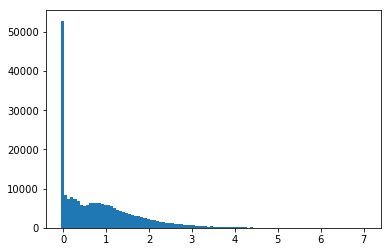

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

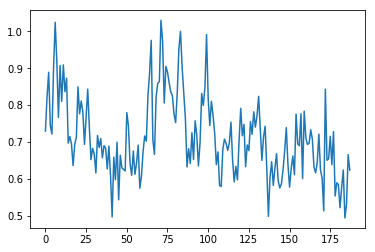

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.219056760012

 1.41945500025
1681

 0.219920706614

 1.40415356873
1682

 0.220045794439

 1.46149194722
1683

 0.218556785105

 1.51088243172
1684

 0.216798153167

 1.51356665016
1685

 0.216586244103

 1.49387927669
1686

 0.215950893305

 1.50066035195
1687

 0.214705033624

 1.45720206643
1688

 0.214417218709

 1.42621503352
1689

 0.214955711131

 1.43139868554
1690

 0.214666265181

 1.46672486601
1691

 0.213404471545

 1.50089385791
1692

 0.213931295794

 1.46848199151


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.843164


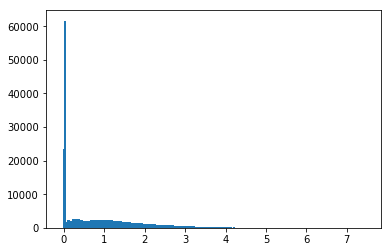

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.858255


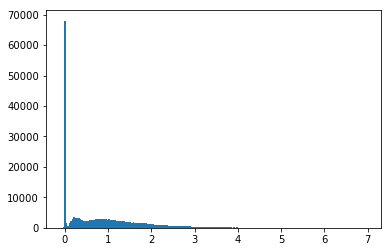

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.850557


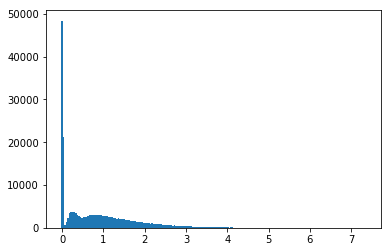

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.821282


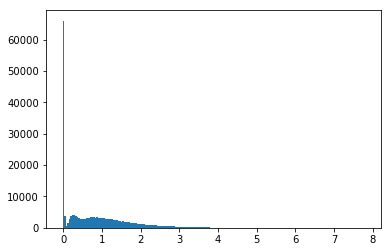

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21441721870922412

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21470503362441032

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21495571113118539

(54, 4100) 0.850557


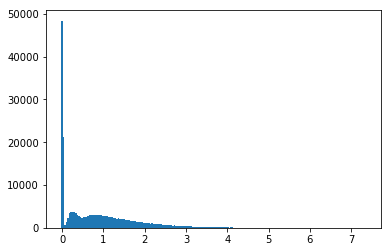

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True